# Import Data and split into train set and test set 

In [1345]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [1346]:
churn = pd.read_csv(r"C:\KU Leuven\Advanced Analytics\Assignment\data\train.csv")
pd.set_option("display.max_columns", None)

In [1347]:
churn.shape

(5044, 39)

In [1348]:
churn.head()


,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Usage_Band,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,target,id
0,F,50.0,20/05/98,29.200000,2.0,Play 100,BS210,62.0,153.000000,185.0,438.600001,4.0,29.0,126.002615,2.045727,2.467742,2.370811,7.25,251.0,620.600001,2.472510,746.602616,0.003984,Med,20.600001,9.930712,2.045727,52.446773,112.386773,OK,0.150531,0.246536,0.706735,0.046729,0.203034,F,F,0,K262360
1,M,25.0,16/12/96,46.533333,1.0,CAT 100,ASAD90,146.0,718.800000,98.0,164.700000,4.0,37.2,251.580636,41.072379,4.923288,1.680612,9.30,248.0,920.700000,3.712500,1172.280636,0.002016,Med,320.700000,12.807103,41.072380,116.546571,221.546571,OK,0.188988,0.780710,0.178886,0.040404,0.273249,F,F,1,K170160
2,F,46.0,27/08/97,38.066667,1.0,CAT 50,WC95,160.0,322.800000,7.0,123.900000,0.0,0.0,91.584877,21.575073,2.017500,17.700000,0.00,167.0,446.700000,2.674850,538.284877,0.002994,MedLow,146.700000,12.226326,17.936021,45.411484,128.811484,OK,0.239300,0.722633,0.277367,0.000000,0.205025,F,F,0,K331610
3,F,59.0,13/07/98,27.400000,1.0,CAT 50,BS110,84.0,317.400001,57.0,161.699999,0.0,0.0,23.998036,20.950771,3.778571,2.836842,0.00,141.0,479.100000,3.397872,503.098036,0.003546,MedLow,179.100000,11.624922,20.820235,28.019646,111.419646,OK,0.221467,0.662492,0.337508,0.000000,0.050090,F,F,0,K332460
4,F,25.0,08/01/99,21.433333,1.0,Play 300,WC95,14.0,309.600000,326.0,637.800000,6.0,14.4,87.051515,0.000000,22.114286,1.956442,2.40,346.0,961.800000,2.779769,1048.851515,0.001445,Med,-838.200000,9.403618,0.000000,34.820606,112.760606,OK,0.107509,0.321896,0.663132,0.014972,0.090509,F,F,0,K394220


# Missing Values

#### Drop missing values

In [1349]:
# Treating missing values on the dataset before splitting into training and test set 


print(churn.isna().sum())

# Find the five percent threshold
threshold = len(churn) * 0.05

# Create a filter
cols_to_drop = churn.columns[churn.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
churn.dropna(subset=cols_to_drop, inplace=True)




Gender                    0
Age                       0
Connect_Date              0
L_O_S                     0
Dropped_Calls             0
tariff                    0
Handset                   0
Peak_calls_Sum            0
Peak_mins_Sum             0
OffPeak_calls_Sum         0
OffPeak_mins_Sum          0
Weekend_calls_Sum         0
Weekend_mins_Sum          0
International_mins_Sum    0
Nat_call_cost_Sum         0
AvePeak                   0
AveOffPeak                0
AveWeekend                0
National_calls            0
National mins             0
AveNational               0
All_calls_mins            0
Dropped_calls_ratio       4
Usage_Band                4
Mins_charge               0
call_cost_per_min         4
actual call cost          0
Total_call_cost           0
Total_Cost                0
Tariff_OK                 0
average cost min          0
Peak ratio                0
OffPeak ratio             0
Weekend ratio             0
Nat-InterNat Ratio        0
high Dropped calls  

In [1350]:
churn.shape

(5040, 39)

In [1351]:
# Split to training set and test set
X = churn.drop("target", axis=1)
y = churn["target"]




In [1352]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



In [1353]:
y_train.head()

1115    0
4207    0
202     0
2074    0
4857    0
Name: target, dtype: int64

In [1354]:
X_train.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Usage_Band,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,id
1115,F,20.0,22/12/97,34.166667,11.0,CAT 100,WC95,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,15.660000,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,Med,230.100001,13.724250,31.579500,32.306822,137.306822,OK,0.164928,0.872425,0.094326,0.033249,0.002921,F,F,K301840
4207,F,48.0,11/08/99,14.266667,0.0,CAT 200,S50,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,High,995.500000,9.617171,95.738942,266.281994,416.281994,OK,0.150610,0.923434,0.055614,0.020952,0.258928,F,F,K116920
202,F,28.0,31/01/96,57.200000,1.0,Play 300,BS210,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,Med,-1296.000000,19.277381,0.000000,50.465922,128.405922,OK,0.203766,0.751190,0.000000,0.248810,0.250327,F,F,K276340
2074,F,31.0,09/08/97,38.666667,4.0,CAT 200,ASAD170,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,41.500000,865.0,1648.300000,1.905549,2038.122673,0.002312,MedHigh,448.300000,9.284414,41.622029,158.568831,308.568831,OK,0.151399,0.856883,0.117940,0.025177,0.236500,F,F,K116850
4857,F,26.0,04/04/96,55.066667,0.0,CAT 200,S50,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,MedHigh,94.800001,9.742817,9.236191,123.457050,273.457050,OK,0.163206,0.948563,0.051437,0.000000,0.294050,F,F,K115360


In [1355]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [1356]:
train["target"].value_counts(normalize=True)

target
0    0.852608
1    0.147392
Name: proportion, dtype: float64

In [1357]:
test["target"].value_counts(normalize=True)

target
0    0.852513
1    0.147487
Name: proportion, dtype: float64

In [1358]:
train.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Usage_Band,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,id,target
1115,F,20.0,22/12/97,34.166667,11.0,CAT 100,WC95,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,15.660000,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,Med,230.100001,13.724250,31.579500,32.306822,137.306822,OK,0.164928,0.872425,0.094326,0.033249,0.002921,F,F,K301840,0
4207,F,48.0,11/08/99,14.266667,0.0,CAT 200,S50,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,High,995.500000,9.617171,95.738942,266.281994,416.281994,OK,0.150610,0.923434,0.055614,0.020952,0.258928,F,F,K116920,0
202,F,28.0,31/01/96,57.200000,1.0,Play 300,BS210,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,Med,-1296.000000,19.277381,0.000000,50.465922,128.405922,OK,0.203766,0.751190,0.000000,0.248810,0.250327,F,F,K276340,0
2074,F,31.0,09/08/97,38.666667,4.0,CAT 200,ASAD170,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,41.500000,865.0,1648.300000,1.905549,2038.122673,0.002312,MedHigh,448.300000,9.284414,41.622029,158.568831,308.568831,OK,0.151399,0.856883,0.117940,0.025177,0.236500,F,F,K116850,0
4857,F,26.0,04/04/96,55.066667,0.0,CAT 200,S50,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,MedHigh,94.800001,9.742817,9.236191,123.457050,273.457050,OK,0.163206,0.948563,0.051437,0.000000,0.294050,F,F,K115360,0


In [1359]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3528 entries, 1115 to 397
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  3528 non-null   object 
 1   Age                     3528 non-null   float64
 2   Connect_Date            3528 non-null   object 
 3   L_O_S                   3528 non-null   float64
 4   Dropped_Calls           3528 non-null   float64
 5   tariff                  3528 non-null   object 
 6   Handset                 3528 non-null   object 
 7   Peak_calls_Sum          3528 non-null   float64
 8   Peak_mins_Sum           3528 non-null   float64
 9   OffPeak_calls_Sum       3528 non-null   float64
 10  OffPeak_mins_Sum        3528 non-null   float64
 11  Weekend_calls_Sum       3528 non-null   float64
 12  Weekend_mins_Sum        3528 non-null   float64
 13  International_mins_Sum  3528 non-null   float64
 14  Nat_call_cost_Sum       3528 non-null   flo

## Transform Connect_Date into a date type column

In [1360]:
# Transform Connect_Date into a datetime variable 

train["Connect_Date"] = pd.to_datetime(churn["Connect_Date"])

C:\Users\Johnn\AppData\Local\Temp\ipykernel_22204\3154815094.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train["Connect_Date"] = pd.to_datetime(churn["Connect_Date"])


# Investigate the categorical columns of the training set 

In [1361]:
# Taking a look at the categorical variables 

train_categorical = train.select_dtypes(include=["object","int64"])
train_categorical.head()

,Gender,tariff,Handset,Usage_Band,Tariff_OK,high Dropped calls,No Usage,id,target
1115,F,CAT 100,WC95,Med,OK,F,F,K301840,0
4207,F,CAT 200,S50,High,OK,F,F,K116920,0
202,F,Play 300,BS210,Med,OK,F,F,K276340,0
2074,F,CAT 200,ASAD170,MedHigh,OK,F,F,K116850,0
4857,F,CAT 200,S50,MedHigh,OK,F,F,K115360,0


## Visualizations of categorical variables using target as hue

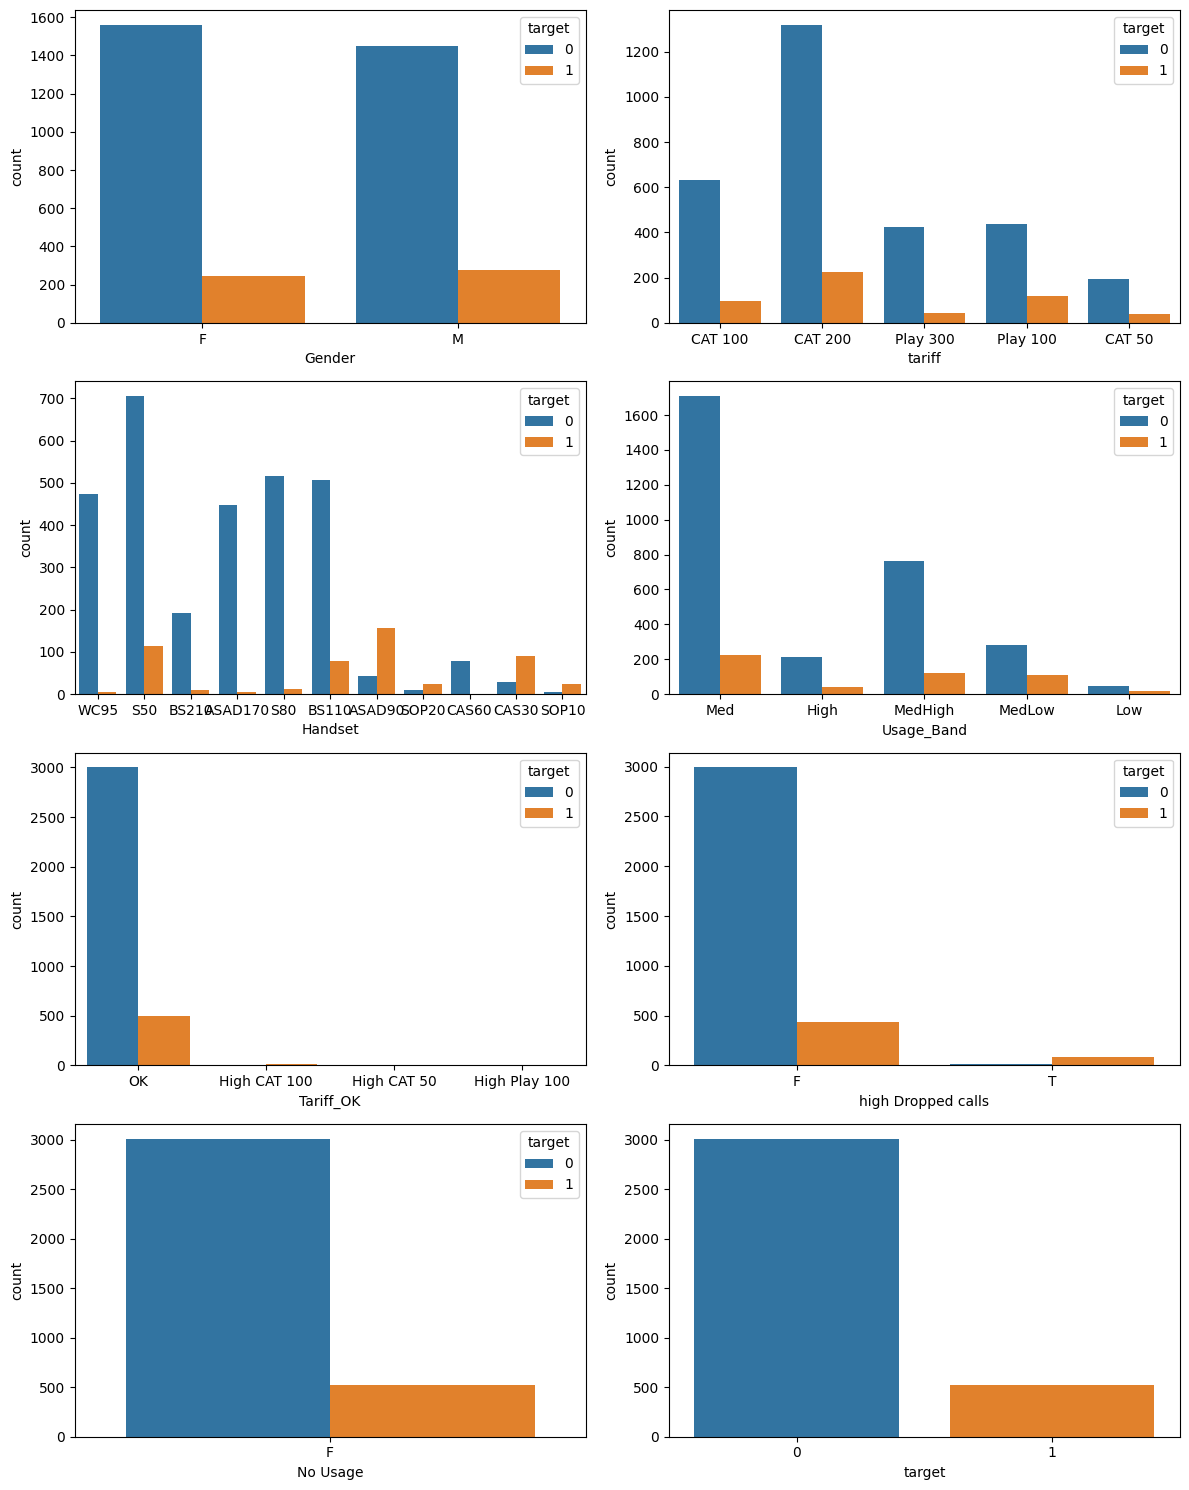

In [1362]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 15))

sns.countplot(data=train_categorical, x="Gender", hue="target", ax=axes[0, 0])
sns.countplot(data=train_categorical, x="tariff", hue="target", ax=axes[0, 1])
sns.countplot(data=train_categorical, x="Handset", hue="target", ax=axes[1, 0])
sns.countplot(data=train_categorical, x="Usage_Band", hue="target", ax=axes[1, 1])
sns.countplot(data=train_categorical, x="Tariff_OK", hue="target", ax=axes[2, 0])
sns.countplot(data=train_categorical, x="high Dropped calls", hue="target", ax=axes[2, 1])
sns.countplot(data=train_categorical, x="No Usage", hue="target", ax=axes[3, 0])
sns.countplot(data=train_categorical, x="target", ax=axes[3, 1])

# If you have an extra subplot, you can leave it empty or remove it
# axes[3, 1].axis('off')

plt.tight_layout()
plt.show()

# Preprocessing of Categorical Columns 

- Drop "No Usage" feature as it has no variability (constant) and thus offers no predictive power to help discriminate churners from non-churners
- Binarize "high Dropped calls" feature, to 1 for True and 0 for False
- Binarize "Gender" feature, to 1 for Male and 0 for Female
- Regroup "Tariff_OK" into OK and Other AND Binarize into 1 for OK and 0 for Other
- Regroup "Handset", "tariff" and "Usage_Band" into fewer categories. Decide on how to regroup based on WOE values and Odds Ratio 


## Binarize "high Dropped calls" 

In [1363]:
# Binarize the High Dropped calls feature 


from sklearn.preprocessing import LabelEncoder
# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
train["High_Dropped_calls"] = enc.fit_transform(train["high Dropped calls"])

# Compare the two columns
#print(train[["High_Dropped_calls", "high Dropped calls"]].head())

train.drop("high Dropped calls", axis=1, inplace=True)





In [1364]:
train.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Usage_Band,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,No Usage,id,target,High_Dropped_calls
1115,F,20.0,1997-12-22,34.166667,11.0,CAT 100,WC95,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,15.660000,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,Med,230.100001,13.724250,31.579500,32.306822,137.306822,OK,0.164928,0.872425,0.094326,0.033249,0.002921,F,K301840,0,0
4207,F,48.0,1999-11-08,14.266667,0.0,CAT 200,S50,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,High,995.500000,9.617171,95.738942,266.281994,416.281994,OK,0.150610,0.923434,0.055614,0.020952,0.258928,F,K116920,0,0
202,F,28.0,1996-01-31,57.200000,1.0,Play 300,BS210,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,Med,-1296.000000,19.277381,0.000000,50.465922,128.405922,OK,0.203766,0.751190,0.000000,0.248810,0.250327,F,K276340,0,0
2074,F,31.0,1997-09-08,38.666667,4.0,CAT 200,ASAD170,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,41.500000,865.0,1648.300000,1.905549,2038.122673,0.002312,MedHigh,448.300000,9.284414,41.622029,158.568831,308.568831,OK,0.151399,0.856883,0.117940,0.025177,0.236500,F,K116850,0,0
4857,F,26.0,1996-04-04,55.066667,0.0,CAT 200,S50,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,MedHigh,94.800001,9.742817,9.236191,123.457050,273.457050,OK,0.163206,0.948563,0.051437,0.000000,0.294050,F,K115360,0,0


## Drop "No Usage" variable

In [1365]:
# The variables connect_month, connect_year, No Usage, Tariff_OK, and Gender are DROPPED from the training set

train.drop("No Usage", axis=1, inplace=True)

## Binarize "Gender" feature 

In [1366]:
enc_2 = LabelEncoder()

# Apply the encoding to the "Accessible" column
train["Gender"] = enc_2.fit_transform(train["Gender"])

In [1367]:
train.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Usage_Band,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,id,target,High_Dropped_calls
1115,0,20.0,1997-12-22,34.166667,11.0,CAT 100,WC95,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,15.660000,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,Med,230.100001,13.724250,31.579500,32.306822,137.306822,OK,0.164928,0.872425,0.094326,0.033249,0.002921,K301840,0,0
4207,0,48.0,1999-11-08,14.266667,0.0,CAT 200,S50,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,High,995.500000,9.617171,95.738942,266.281994,416.281994,OK,0.150610,0.923434,0.055614,0.020952,0.258928,K116920,0,0
202,0,28.0,1996-01-31,57.200000,1.0,Play 300,BS210,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,Med,-1296.000000,19.277381,0.000000,50.465922,128.405922,OK,0.203766,0.751190,0.000000,0.248810,0.250327,K276340,0,0
2074,0,31.0,1997-09-08,38.666667,4.0,CAT 200,ASAD170,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,41.500000,865.0,1648.300000,1.905549,2038.122673,0.002312,MedHigh,448.300000,9.284414,41.622029,158.568831,308.568831,OK,0.151399,0.856883,0.117940,0.025177,0.236500,K116850,0,0
4857,0,26.0,1996-04-04,55.066667,0.0,CAT 200,S50,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,MedHigh,94.800001,9.742817,9.236191,123.457050,273.457050,OK,0.163206,0.948563,0.051437,0.000000,0.294050,K115360,0,0


## Regroup "tariff_OK" AND Assign 1 for OK and 0 for Other

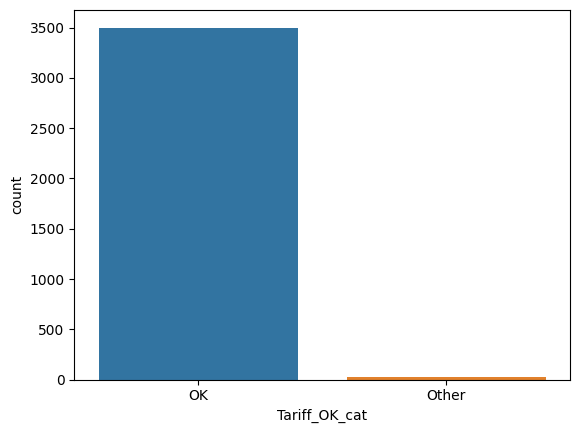

In [1368]:
   # Create a list of categories
tariff_OK_categories = ["OK", "Other"]

# Create short_flights
okay = "OK"

other = "CAT|Play"
# Create long_flights
#handset_risky = "SOP10|ASAD90|CAS30|SOP20"

# Create conditions for values in flight_categories to be created
conditions = [
    (train["Tariff_OK"].str.contains(okay)),
    (train["Tariff_OK"].str.contains(other))
]

# Apply the conditions list to the flight_categories
train["Tariff_OK_cat"] = np.select(conditions, 
                                        tariff_OK_categories)

# Plot the counts of each category
sns.countplot(data=train, x="Tariff_OK_cat")
plt.show()

In [1369]:
train.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Usage_Band,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,id,target,High_Dropped_calls,Tariff_OK_cat
1115,0,20.0,1997-12-22,34.166667,11.0,CAT 100,WC95,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,15.660000,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,Med,230.100001,13.724250,31.579500,32.306822,137.306822,OK,0.164928,0.872425,0.094326,0.033249,0.002921,K301840,0,0,OK
4207,0,48.0,1999-11-08,14.266667,0.0,CAT 200,S50,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,High,995.500000,9.617171,95.738942,266.281994,416.281994,OK,0.150610,0.923434,0.055614,0.020952,0.258928,K116920,0,0,OK
202,0,28.0,1996-01-31,57.200000,1.0,Play 300,BS210,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,Med,-1296.000000,19.277381,0.000000,50.465922,128.405922,OK,0.203766,0.751190,0.000000,0.248810,0.250327,K276340,0,0,OK
2074,0,31.0,1997-09-08,38.666667,4.0,CAT 200,ASAD170,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,41.500000,865.0,1648.300000,1.905549,2038.122673,0.002312,MedHigh,448.300000,9.284414,41.622029,158.568831,308.568831,OK,0.151399,0.856883,0.117940,0.025177,0.236500,K116850,0,0,OK
4857,0,26.0,1996-04-04,55.066667,0.0,CAT 200,S50,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,MedHigh,94.800001,9.742817,9.236191,123.457050,273.457050,OK,0.163206,0.948563,0.051437,0.000000,0.294050,K115360,0,0,OK


In [1370]:
train.drop("Tariff_OK", axis=1, inplace=True)

In [1371]:
train["Tariff_OK_cat"] = np.where(train["Tariff_OK_cat"]=="OK", 1,0)

In [1372]:
train.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Usage_Band,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,id,target,High_Dropped_calls,Tariff_OK_cat
1115,0,20.0,1997-12-22,34.166667,11.0,CAT 100,WC95,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,15.660000,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,Med,230.100001,13.724250,31.579500,32.306822,137.306822,0.164928,0.872425,0.094326,0.033249,0.002921,K301840,0,0,1
4207,0,48.0,1999-11-08,14.266667,0.0,CAT 200,S50,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,High,995.500000,9.617171,95.738942,266.281994,416.281994,0.150610,0.923434,0.055614,0.020952,0.258928,K116920,0,0,1
202,0,28.0,1996-01-31,57.200000,1.0,Play 300,BS210,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,Med,-1296.000000,19.277381,0.000000,50.465922,128.405922,0.203766,0.751190,0.000000,0.248810,0.250327,K276340,0,0,1
2074,0,31.0,1997-09-08,38.666667,4.0,CAT 200,ASAD170,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,41.500000,865.0,1648.300000,1.905549,2038.122673,0.002312,MedHigh,448.300000,9.284414,41.622029,158.568831,308.568831,0.151399,0.856883,0.117940,0.025177,0.236500,K116850,0,0,1
4857,0,26.0,1996-04-04,55.066667,0.0,CAT 200,S50,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,MedHigh,94.800001,9.742817,9.236191,123.457050,273.457050,0.163206,0.948563,0.051437,0.000000,0.294050,K115360,0,0,1


## Regroup "Handset", "tariff" and "Usage_Band"

### Define Weights of Evidence Function

In [1373]:
# WOE to group the tariff, Handset and Usage Band and replace the feature categorical values with the WOE values, thus turn the categorical variables into numerical

def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Bin Values': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & 
                    (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & 
                    (dataset[target] == 1)].count()[feature]
        }) 
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return dset, iv





### Calculate WOE value AND Odd Ratio for each category in the Handset feature

In [1374]:
tuple_woe_handset = calculate_woe_iv(train, "Handset", "target")
handset_woe = tuple_woe_handset[0]
handset_iv = tuple_woe_handset[1]
print(handset_woe, handset_iv)

   Bin Values  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
10      SOP10   28     5   23    0.001662   0.044231 -3.281258  0.139678
6      ASAD90  201    44  157    0.014628   0.301923 -3.027258  0.869717
9       CAS30  118    28   90    0.009309   0.173077 -2.922807  0.478663
7       SOP20   35    10   25    0.003324   0.048077 -2.671493  0.119556
8       CAS60   79    79    0    0.026263   0.000000  0.000000  0.000000
1         S50  818   705  113    0.234375   0.217308  0.075608  0.001290
5       BS110  586   507   79    0.168551   0.151923  0.103861  0.001727
2       BS210  204   193   11    0.064162   0.021154  1.109593  0.047722
4         S80  527   515   12    0.171210   0.023077  2.004058  0.296868
3     ASAD170  454   448    6    0.148936   0.011538  2.557832  0.351440
0        WC95  478   474    4    0.157580   0.007692  3.019711  0.452617 2.7592788931146925


In [1375]:
train_by_handset = pd.pivot_table(train, index="target", columns="Handset", aggfunc="size", fill_value=0)
odds = train_by_handset.iloc[0] / train_by_handset.iloc[1]
train_by_handset.loc["Odds"]= train_by_handset.iloc[0] / train_by_handset.iloc[1]
train_by_handset


Handset,ASAD170,ASAD90,BS110,BS210,CAS30,CAS60,S50,S80,SOP10,SOP20,WC95
target,,,,,,,,,,,
0,448.000000,44.000000,507.000000,193.000000,28.000000,79.0,705.000000,515.000000,5.000000,10.0,474.0
1,6.000000,157.000000,79.000000,11.000000,90.000000,0.0,113.000000,12.000000,23.000000,25.0,4.0
Odds,74.666667,0.280255,6.417722,17.545455,0.311111,inf,6.238938,42.916667,0.217391,0.4,118.5


##### Regrouping: 
- SOP10, ASAD90, CAS30 and SOP20 can be summarized by a single category corresponding to "risky" categories
- S50, BS110 summarized to a new "neutral" category
- BS210, S80, ASAD170, WC95, CAS60 to a new "safe" category as the percentage of non-churners is higher than churners in these categories

#### Create the new categories, calculate their WOE values and create a new column for Handset, which contains WOE values 

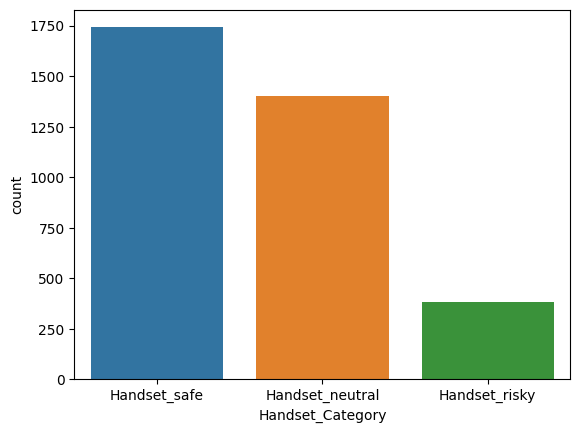

In [1376]:
   # Create a list of categories
handset_categories = ["Handset_safe", "Handset_neutral", "Handset_risky"]

# Create short_flights
handset_safe = "BS210|S80|ASAD170|WC95|CAS60"

# Create medium_flights
handset_neutral = "S50|BS110"

# Create long_flights
handset_risky = "SOP10|ASAD90|CAS30|SOP20"

# Create conditions for values in flight_categories to be created
conditions = [
    (train["Handset"].str.contains(handset_safe)),
    (train["Handset"].str.contains(handset_neutral)),
    (train["Handset"].str.contains(handset_risky))
]

# Apply the conditions list to the flight_categories
train["Handset_Category"] = np.select(conditions, 
                                        handset_categories)

# Plot the counts of each category
sns.countplot(data=train, x="Handset_Category")
plt.show()

In [1377]:
train.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Usage_Band,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,id,target,High_Dropped_calls,Tariff_OK_cat,Handset_Category
1115,0,20.0,1997-12-22,34.166667,11.0,CAT 100,WC95,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,15.660000,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,Med,230.100001,13.724250,31.579500,32.306822,137.306822,0.164928,0.872425,0.094326,0.033249,0.002921,K301840,0,0,1,Handset_safe
4207,0,48.0,1999-11-08,14.266667,0.0,CAT 200,S50,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,High,995.500000,9.617171,95.738942,266.281994,416.281994,0.150610,0.923434,0.055614,0.020952,0.258928,K116920,0,0,1,Handset_neutral
202,0,28.0,1996-01-31,57.200000,1.0,Play 300,BS210,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,Med,-1296.000000,19.277381,0.000000,50.465922,128.405922,0.203766,0.751190,0.000000,0.248810,0.250327,K276340,0,0,1,Handset_safe
2074,0,31.0,1997-09-08,38.666667,4.0,CAT 200,ASAD170,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,41.500000,865.0,1648.300000,1.905549,2038.122673,0.002312,MedHigh,448.300000,9.284414,41.622029,158.568831,308.568831,0.151399,0.856883,0.117940,0.025177,0.236500,K116850,0,0,1,Handset_safe
4857,0,26.0,1996-04-04,55.066667,0.0,CAT 200,S50,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,MedHigh,94.800001,9.742817,9.236191,123.457050,273.457050,0.163206,0.948563,0.051437,0.000000,0.294050,K115360,0,0,1,Handset_neutral


In [1378]:
tuple_woe_handset_cat = calculate_woe_iv(train, "Handset_Category", "target")
handset_cat_woe = tuple_woe_handset_cat[0]
handset_cat_iv = tuple_woe_handset_cat[1]
print(handset_cat_woe, handset_cat_iv)

        Bin Values   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
2    Handset_risky   382    87  295    0.028923   0.567308 -2.976269  1.602378
1  Handset_neutral  1404  1212  192    0.402926   0.369231  0.087330  0.002943
0     Handset_safe  1742  1709   33    0.568152   0.063462  2.191954  1.106258 2.71157818562674


In [1379]:
handset_to_woe_dict = dict(zip(handset_cat_woe['Bin Values'], handset_cat_woe['WoE']))
train['woe_handset_cat'] = train['Handset_Category'].map(handset_to_woe_dict)

In [1380]:
train.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Usage_Band,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,id,target,High_Dropped_calls,Tariff_OK_cat,Handset_Category,woe_handset_cat
1115,0,20.0,1997-12-22,34.166667,11.0,CAT 100,WC95,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,15.660000,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,Med,230.100001,13.724250,31.579500,32.306822,137.306822,0.164928,0.872425,0.094326,0.033249,0.002921,K301840,0,0,1,Handset_safe,2.191954
4207,0,48.0,1999-11-08,14.266667,0.0,CAT 200,S50,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,High,995.500000,9.617171,95.738942,266.281994,416.281994,0.150610,0.923434,0.055614,0.020952,0.258928,K116920,0,0,1,Handset_neutral,0.087330
202,0,28.0,1996-01-31,57.200000,1.0,Play 300,BS210,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,Med,-1296.000000,19.277381,0.000000,50.465922,128.405922,0.203766,0.751190,0.000000,0.248810,0.250327,K276340,0,0,1,Handset_safe,2.191954
2074,0,31.0,1997-09-08,38.666667,4.0,CAT 200,ASAD170,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,41.500000,865.0,1648.300000,1.905549,2038.122673,0.002312,MedHigh,448.300000,9.284414,41.622029,158.568831,308.568831,0.151399,0.856883,0.117940,0.025177,0.236500,K116850,0,0,1,Handset_safe,2.191954
4857,0,26.0,1996-04-04,55.066667,0.0,CAT 200,S50,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,MedHigh,94.800001,9.742817,9.236191,123.457050,273.457050,0.163206,0.948563,0.051437,0.000000,0.294050,K115360,0,0,1,Handset_neutral,0.087330


### Calculate WOE value AND Odd Ratio for each category in the tariff feature

In [1381]:
tuple_woe_tariff = calculate_woe_iv(train, "tariff", "target")
tariff_woe = tuple_woe_tariff[0]
tariff_iv = tuple_woe_tariff[1]
print(tariff_woe, tariff_iv)

  Bin Values   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
3   Play 100   558   439  119    0.145944   0.228846 -0.449826  0.037291
4     CAT 50   234   195   39    0.064827   0.075000 -0.145764  0.001483
1    CAT 200  1541  1318  223    0.438165   0.428846  0.021497  0.000200
0    CAT 100   726   630   96    0.209441   0.184615  0.126170  0.003132
2   Play 300   469   426   43    0.141622   0.082692  0.538037  0.031707 0.07381349978175396


In [1382]:
train_by_tariff = pd.pivot_table(train, index="target", columns="tariff", aggfunc="size", fill_value=0)
odds = train_by_tariff.iloc[0] / train_by_tariff.iloc[1]
train_by_tariff.loc["Odds"]= train_by_tariff.iloc[0] / train_by_tariff.iloc[1]
train_by_tariff

tariff,CAT 100,CAT 200,CAT 50,Play 100,Play 300
target,,,,,
0,630.0000,1318.000000,195.0,439.000000,426.000000
1,96.0000,223.000000,39.0,119.000000,43.000000
Odds,6.5625,5.910314,5.0,3.689076,9.906977


##### Regrouping: 
- Play 100 contains the most risk so it will remain a category on it's own
- CAT50, CAT200 and CAT100 do not have much IV on their own and WOE do not offer much information, so they will be summarized to a CAT category
- Play 300 has significant IV value, and churners dominate this category, it will remain a category on its own 

#### Create the new categories, calculate their WOE values and create a new column for tariff, which contains WOE values 

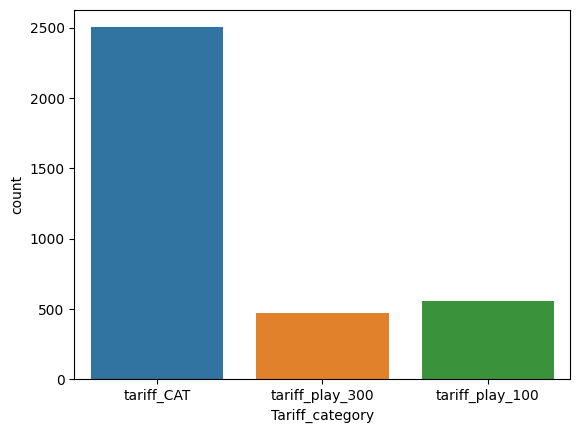

In [1383]:
   # Create a list of categories
tariff_categories = ["tariff_play_300", "tariff_CAT", "tariff_play_100"]

# Create short_flights
tariff_less_risky = "Play 300"

tariff_neutral = "CAT 200|CAT 50|CAT 100"

# Create medium_flights
tariff_risky = "Play 100"

# Create long_flights
#handset_risky = "SOP10|ASAD90|CAS30|SOP20"

# Create conditions for values in flight_categories to be created
conditions = [
    (train["tariff"].str.contains(tariff_less_risky)),
    (train["tariff"].str.contains(tariff_neutral)),
    (train["tariff"].str.contains(tariff_risky))
]

# Apply the conditions list to the flight_categories
train["Tariff_category"] = np.select(conditions, 
                                        tariff_categories)

# Plot the counts of each category
sns.countplot(data=train, x="Tariff_category")
plt.show()

In [1384]:
tuple_woe_tariff_cat = calculate_woe_iv(train, "Tariff_category", "target")
tariff_cat_woe = tuple_woe_tariff_cat[0]
tariff_cat_iv = tuple_woe_tariff_cat[1]
print(tariff_cat_woe, tariff_cat_iv)

        Bin Values   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
2  tariff_play_100   558   439  119    0.145944   0.228846 -0.449826  0.037291
0       tariff_CAT  2501  2143  358    0.712434   0.688462  0.034227  0.000820
1  tariff_play_300   469   426   43    0.141622   0.082692  0.538037  0.031707 0.06981852441452721


In [1385]:
tariff_to_woe_dict = dict(zip(tariff_cat_woe['Bin Values'], tariff_cat_woe['WoE']))
train['woe_tariff_cat'] = train['Tariff_category'].map(tariff_to_woe_dict)

In [1386]:
train.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Usage_Band,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,id,target,High_Dropped_calls,Tariff_OK_cat,Handset_Category,woe_handset_cat,Tariff_category,woe_tariff_cat
1115,0,20.0,1997-12-22,34.166667,11.0,CAT 100,WC95,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,15.660000,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,Med,230.100001,13.724250,31.579500,32.306822,137.306822,0.164928,0.872425,0.094326,0.033249,0.002921,K301840,0,0,1,Handset_safe,2.191954,tariff_CAT,0.034227
4207,0,48.0,1999-11-08,14.266667,0.0,CAT 200,S50,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,High,995.500000,9.617171,95.738942,266.281994,416.281994,0.150610,0.923434,0.055614,0.020952,0.258928,K116920,0,0,1,Handset_neutral,0.087330,tariff_CAT,0.034227
202,0,28.0,1996-01-31,57.200000,1.0,Play 300,BS210,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,Med,-1296.000000,19.277381,0.000000,50.465922,128.405922,0.203766,0.751190,0.000000,0.248810,0.250327,K276340,0,0,1,Handset_safe,2.191954,tariff_play_300,0.538037
2074,0,31.0,1997-09-08,38.666667,4.0,CAT 200,ASAD170,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,41.500000,865.0,1648.300000,1.905549,2038.122673,0.002312,MedHigh,448.300000,9.284414,41.622029,158.568831,308.568831,0.151399,0.856883,0.117940,0.025177,0.236500,K116850,0,0,1,Handset_safe,2.191954,tariff_CAT,0.034227
4857,0,26.0,1996-04-04,55.066667,0.0,CAT 200,S50,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,MedHigh,94.800001,9.742817,9.236191,123.457050,273.457050,0.163206,0.948563,0.051437,0.000000,0.294050,K115360,0,0,1,Handset_neutral,0.087330,tariff_CAT,0.034227


### Calculate WOE value AND Odd Ratio for each category in the usage_band feature

In [1387]:
tuple_woe_usage_band = calculate_woe_iv(train, "Usage_Band", "target")
usage_band_woe = tuple_woe_usage_band[0]
usage_band_iv = tuple_woe_usage_band[1]
print(usage_band_woe, usage_band_iv)

  Bin Values   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
4        Low    62    44   18    0.014628   0.034615 -0.861384  0.017217
3     MedLow   391   281  110    0.093418   0.211538 -0.817328  0.096543
1       High   255   213   42    0.070811   0.080769 -0.131579  0.001310
2    MedHigh   885   762  123    0.253324   0.236538  0.068560  0.001151
0        Med  1935  1708  227    0.567819   0.436538  0.262926  0.034517 0.15073887994003912


In [1388]:
train_by_usage = pd.pivot_table(train, index="target", columns="Usage_Band", aggfunc="size", fill_value=0)
odds = train_by_usage.iloc[0] / train_by_usage.iloc[1]
train_by_usage.loc["Odds"]= train_by_usage.iloc[0] / train_by_usage.iloc[1]
train_by_usage

Usage_Band,High,Low,Med,MedHigh,MedLow
target,,,,,
0,213.000000,44.000000,1708.000000,762.000000,281.000000
1,42.000000,18.000000,227.000000,123.000000,110.000000
Odds,5.071429,2.444444,7.524229,6.195122,2.554545


##### Regrouping: 
- Low and MedLow have very negative WOE values and especially MedLow offers high IV. Grouped together into a Low category (453 total observations)
- Med has has a positive WOE value and good IV value, it will remain a category on its own. (1935 obs)
- High and MedHigh do not offer much IV, as it is difficult to differentiate between churners and non-churners. Form a new High category together (1140)

#### Create the new categories, calculate their WOE values and create a new column for usage_band, which contains WOE values 

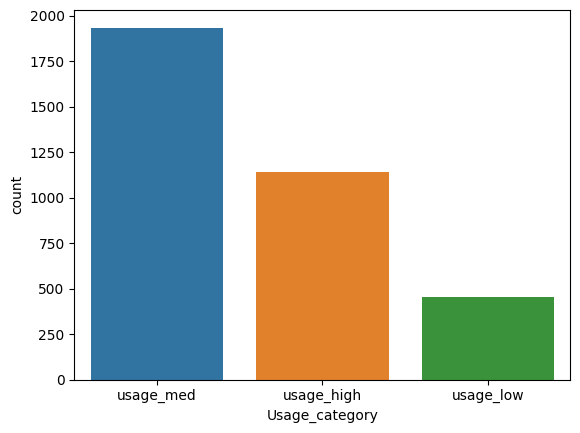

In [1389]:
   # Create a list of categories
usage_categories = ["usage_low", "usage_med", "usage_high"]

# Create short_flights
usage_low = "Low"

usage_med = r"\bMed\b"

usage_high = "High"




# Create long_flights
#handset_risky = "SOP10|ASAD90|CAS30|SOP20"

# Create conditions for values in flight_categories to be created
conditions = [
    (train["Usage_Band"].str.contains(usage_low)),
    (train["Usage_Band"].str.contains(usage_med)),
    (train["Usage_Band"].str.contains(usage_high))
]

# Apply the conditions list to the flight_categories
train["Usage_category"] = np.select(conditions, 
                                        usage_categories)

# Plot the counts of each category
sns.countplot(data=train, x="Usage_category")
plt.show()

In [1390]:
tuple_woe_usage_cat = calculate_woe_iv(train, "Usage_category", "target")
usage_cat_woe = tuple_woe_usage_cat[0]
usage_cat_iv = tuple_woe_usage_cat[1]
print(usage_cat_woe, usage_cat_iv)

   Bin Values   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
2   usage_low   453   325  128    0.108045   0.246154 -0.823407  0.113720
1  usage_high  1140   975  165    0.324136   0.317308  0.021290  0.000145
0   usage_med  1935  1708  227    0.567819   0.436538  0.262926  0.034517 0.14838214657508908


In [1391]:
usage_to_woe_dict = dict(zip(usage_cat_woe['Bin Values'], usage_cat_woe['WoE']))
train['woe_usage_cat'] = train['Usage_category'].map(usage_to_woe_dict)

In [1392]:
train.head()


,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Usage_Band,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,id,target,High_Dropped_calls,Tariff_OK_cat,Handset_Category,woe_handset_cat,Tariff_category,woe_tariff_cat,Usage_category,woe_usage_cat
1115,0,20.0,1997-12-22,34.166667,11.0,CAT 100,WC95,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,15.660000,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,Med,230.100001,13.724250,31.579500,32.306822,137.306822,0.164928,0.872425,0.094326,0.033249,0.002921,K301840,0,0,1,Handset_safe,2.191954,tariff_CAT,0.034227,usage_med,0.262926
4207,0,48.0,1999-11-08,14.266667,0.0,CAT 200,S50,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,High,995.500000,9.617171,95.738942,266.281994,416.281994,0.150610,0.923434,0.055614,0.020952,0.258928,K116920,0,0,1,Handset_neutral,0.087330,tariff_CAT,0.034227,usage_high,0.021290
202,0,28.0,1996-01-31,57.200000,1.0,Play 300,BS210,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,Med,-1296.000000,19.277381,0.000000,50.465922,128.405922,0.203766,0.751190,0.000000,0.248810,0.250327,K276340,0,0,1,Handset_safe,2.191954,tariff_play_300,0.538037,usage_med,0.262926
2074,0,31.0,1997-09-08,38.666667,4.0,CAT 200,ASAD170,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,41.500000,865.0,1648.300000,1.905549,2038.122673,0.002312,MedHigh,448.300000,9.284414,41.622029,158.568831,308.568831,0.151399,0.856883,0.117940,0.025177,0.236500,K116850,0,0,1,Handset_safe,2.191954,tariff_CAT,0.034227,usage_high,0.021290
4857,0,26.0,1996-04-04,55.066667,0.0,CAT 200,S50,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,MedHigh,94.800001,9.742817,9.236191,123.457050,273.457050,0.163206,0.948563,0.051437,0.000000,0.294050,K115360,0,0,1,Handset_neutral,0.087330,tariff_CAT,0.034227,usage_high,0.021290


### Drop the old variables for Handset, tariff and Usage_Band and use the new columns for those variables that contain the WOE values

In [1393]:
train.drop(["tariff","Handset","Usage_Band","Handset_Category","Tariff_category","Usage_category"],axis=1,inplace=True)

In [1394]:
train.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,id,target,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat
1115,0,20.0,1997-12-22,34.166667,11.0,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,15.660000,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,230.100001,13.724250,31.579500,32.306822,137.306822,0.164928,0.872425,0.094326,0.033249,0.002921,K301840,0,0,1,2.191954,0.034227,0.262926
4207,0,48.0,1999-11-08,14.266667,0.0,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,995.500000,9.617171,95.738942,266.281994,416.281994,0.150610,0.923434,0.055614,0.020952,0.258928,K116920,0,0,1,0.087330,0.034227,0.021290
202,0,28.0,1996-01-31,57.200000,1.0,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,-1296.000000,19.277381,0.000000,50.465922,128.405922,0.203766,0.751190,0.000000,0.248810,0.250327,K276340,0,0,1,2.191954,0.538037,0.262926
2074,0,31.0,1997-09-08,38.666667,4.0,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,41.500000,865.0,1648.300000,1.905549,2038.122673,0.002312,448.300000,9.284414,41.622029,158.568831,308.568831,0.151399,0.856883,0.117940,0.025177,0.236500,K116850,0,0,1,2.191954,0.034227,0.021290
4857,0,26.0,1996-04-04,55.066667,0.0,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,94.800001,9.742817,9.236191,123.457050,273.457050,0.163206,0.948563,0.051437,0.000000,0.294050,K115360,0,0,1,0.087330,0.034227,0.021290


In [1395]:
#from ydata_profiling import ProfileReport
#profile = ProfileReport(train)
#profile.to_notebook_iframe()
#profile.to_file("profiling_report.html")

# Outliers
- Checking for Outliers in the numeric columns except from the woe columns, the dummy variables and target

In [1396]:
train.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,id,target,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat
1115,0,20.0,1997-12-22,34.166667,11.0,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,15.660000,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,230.100001,13.724250,31.579500,32.306822,137.306822,0.164928,0.872425,0.094326,0.033249,0.002921,K301840,0,0,1,2.191954,0.034227,0.262926
4207,0,48.0,1999-11-08,14.266667,0.0,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,995.500000,9.617171,95.738942,266.281994,416.281994,0.150610,0.923434,0.055614,0.020952,0.258928,K116920,0,0,1,0.087330,0.034227,0.021290
202,0,28.0,1996-01-31,57.200000,1.0,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,-1296.000000,19.277381,0.000000,50.465922,128.405922,0.203766,0.751190,0.000000,0.248810,0.250327,K276340,0,0,1,2.191954,0.538037,0.262926
2074,0,31.0,1997-09-08,38.666667,4.0,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,41.500000,865.0,1648.300000,1.905549,2038.122673,0.002312,448.300000,9.284414,41.622029,158.568831,308.568831,0.151399,0.856883,0.117940,0.025177,0.236500,K116850,0,0,1,2.191954,0.034227,0.021290
4857,0,26.0,1996-04-04,55.066667,0.0,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,94.800001,9.742817,9.236191,123.457050,273.457050,0.163206,0.948563,0.051437,0.000000,0.294050,K115360,0,0,1,0.087330,0.034227,0.021290


In [1397]:
# Function to detect outliers 
filtered_columns = train.select_dtypes(include=["int","float"]).columns[~train.select_dtypes(include=["int","float"]).columns.str.contains("^woe")]

filtered_columns = filtered_columns.drop(['target','High_Dropped_calls','Tariff_OK_cat','Gender'])
filtered_columns



Index(['Age', 'L_O_S', 'Dropped_Calls', 'Peak_calls_Sum', 'Peak_mins_Sum',
       'OffPeak_calls_Sum', 'OffPeak_mins_Sum', 'Weekend_calls_Sum',
       'Weekend_mins_Sum', 'International_mins_Sum', 'Nat_call_cost_Sum',
       'AvePeak', 'AveOffPeak', 'AveWeekend', 'National_calls',
       'National mins', 'AveNational', 'All_calls_mins', 'Dropped_calls_ratio',
       'Mins_charge', 'call_cost_per_min', 'actual call cost',
       'Total_call_cost', 'Total_Cost', 'average cost min', 'Peak ratio',
       'OffPeak ratio', 'Weekend ratio', 'Nat-InterNat Ratio'],
      dtype='object')

## Define outlier detection function 

In [1398]:
# For each column calculate median and iqr and use them to calculate robust score for z value. 
# Return  number of outliers per feature, which are only values that have z > 3 

def robust_outlier_detection(dataset, columns):
    outliers = {}
    for feature_name in columns:
       median = np.median(dataset[feature_name])
       q75, q25 = np.percentile(dataset[feature_name], [75 ,25])
       iqr = q75-q25
       robust_z = (dataset[feature_name] - median) / iqr
       mask = abs(robust_z) > 3 
       outliers[feature_name] = sum(mask)
    return outliers
       

In [1399]:
outlier_dict = robust_outlier_detection(train, filtered_columns)
outlier_dict

{'Age': 0,
 'L_O_S': 0,
 'Dropped_Calls': 470,
 'Peak_calls_Sum': 44,
 'Peak_mins_Sum': 1,
 'OffPeak_calls_Sum': 14,
 'OffPeak_mins_Sum': 0,
 'Weekend_calls_Sum': 33,
 'Weekend_mins_Sum': 4,
 'International_mins_Sum': 29,
 'Nat_call_cost_Sum': 120,
 'AvePeak': 323,
 'AveOffPeak': 354,
 'AveWeekend': 323,
 'National_calls': 34,
 'National mins': 2,
 'AveNational': 188,
 'All_calls_mins': 5,
 'Dropped_calls_ratio': 234,
 'Mins_charge': 77,
 'call_cost_per_min': 2,
 'actual call cost': 125,
 'Total_call_cost': 61,
 'Total_Cost': 15,
 'average cost min': 129,
 'Peak ratio': 0,
 'OffPeak ratio': 0,
 'Weekend ratio': 93,
 'Nat-InterNat Ratio': 3}

## Plot number of outliers per feature 

c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


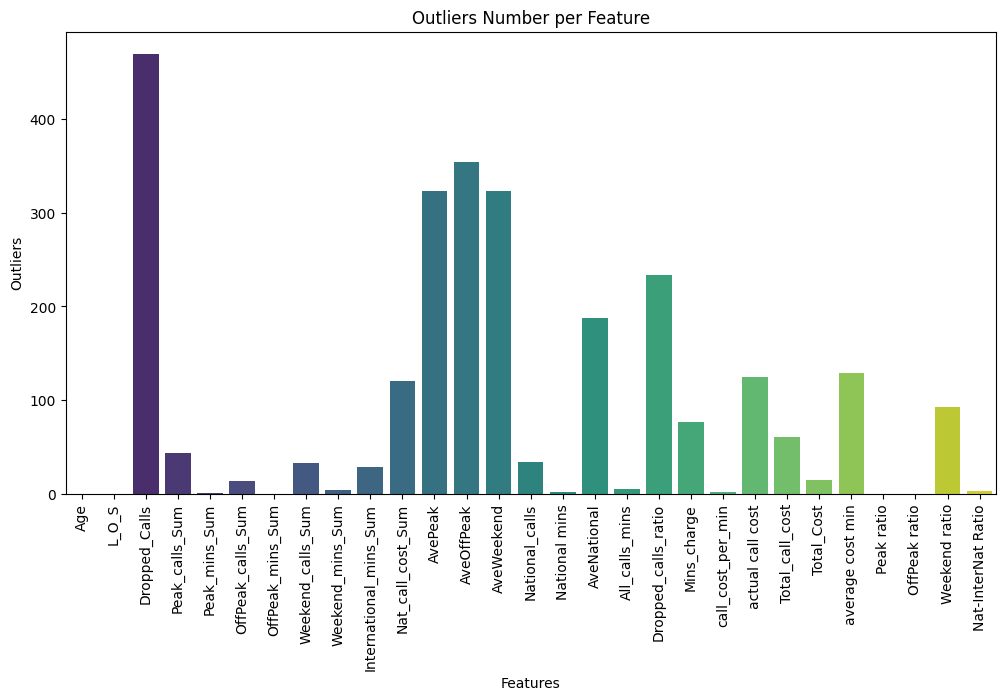

In [1400]:
keys = list(outlier_dict.keys())
values = list(outlier_dict.values())

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=keys, y=values, palette='viridis')
plt.xlabel('Features')
plt.ylabel('Outliers')
plt.title('Outliers Number per Feature')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

## Define outlier truncuation function : Replace each outlier with values for which z=3

### Remove outliers from the following features: ['AvePeak', 'AveOffPeak', 'AveWeekend', 'AveNational', 'average cost min']

In [1401]:
#filtered_columns = train.select_dtypes(include=["int","float"]).columns[~train.select_dtypes(include=["int","float"]).columns.str.contains("^woe")]


def truncate_outliers(dataset,columns):
    for feature_name in columns:
       median = np.median(dataset[feature_name])
       q75, q25 = np.percentile(dataset[feature_name], [75 ,25])
       iqr = q75-q25
       k = 3*iqr + median
       dataset[feature_name] = np.where((abs((dataset[feature_name]  - median) / iqr)) > 3, k, dataset[feature_name] )

In [1402]:
filtered_columns_trunct = list(filtered_columns)
filtered_columns_trunct = filtered_columns_trunct[11:14]  + [filtered_columns_trunct[16]] + [filtered_columns_trunct[24]] 

In [1403]:
filtered_columns

Index(['Age', 'L_O_S', 'Dropped_Calls', 'Peak_calls_Sum', 'Peak_mins_Sum',
       'OffPeak_calls_Sum', 'OffPeak_mins_Sum', 'Weekend_calls_Sum',
       'Weekend_mins_Sum', 'International_mins_Sum', 'Nat_call_cost_Sum',
       'AvePeak', 'AveOffPeak', 'AveWeekend', 'National_calls',
       'National mins', 'AveNational', 'All_calls_mins', 'Dropped_calls_ratio',
       'Mins_charge', 'call_cost_per_min', 'actual call cost',
       'Total_call_cost', 'Total_Cost', 'average cost min', 'Peak ratio',
       'OffPeak ratio', 'Weekend ratio', 'Nat-InterNat Ratio'],
      dtype='object')

In [1404]:
filtered_columns_trunct

['AvePeak', 'AveOffPeak', 'AveWeekend', 'AveNational', 'average cost min']

In [1405]:
truncate_outliers(train, filtered_columns_trunct)

In [1406]:
outlier_dict = robust_outlier_detection(train,filtered_columns)
outlier_dict

{'Age': 0,
 'L_O_S': 0,
 'Dropped_Calls': 470,
 'Peak_calls_Sum': 44,
 'Peak_mins_Sum': 1,
 'OffPeak_calls_Sum': 14,
 'OffPeak_mins_Sum': 0,
 'Weekend_calls_Sum': 33,
 'Weekend_mins_Sum': 4,
 'International_mins_Sum': 29,
 'Nat_call_cost_Sum': 120,
 'AvePeak': 0,
 'AveOffPeak': 0,
 'AveWeekend': 0,
 'National_calls': 34,
 'National mins': 2,
 'AveNational': 0,
 'All_calls_mins': 5,
 'Dropped_calls_ratio': 234,
 'Mins_charge': 77,
 'call_cost_per_min': 2,
 'actual call cost': 125,
 'Total_call_cost': 61,
 'Total_Cost': 15,
 'average cost min': 0,
 'Peak ratio': 0,
 'OffPeak ratio': 0,
 'Weekend ratio': 93,
 'Nat-InterNat Ratio': 3}

### Plot the features without the Outliers 

c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


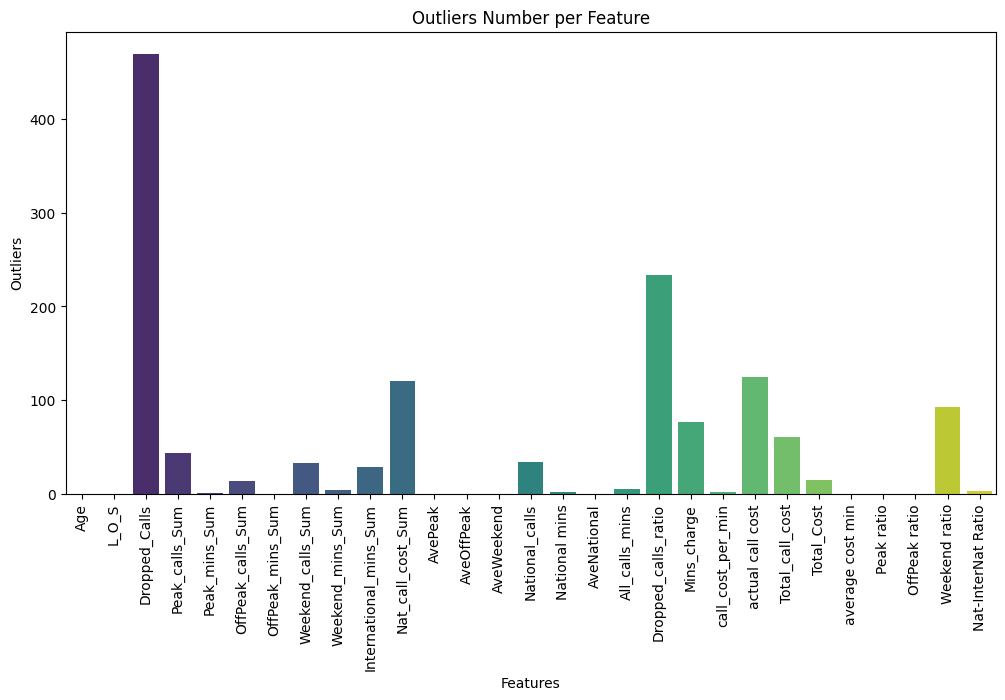

In [1407]:
keys = list(outlier_dict.keys())
values = list(outlier_dict.values())

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=keys, y=values, palette='viridis')
plt.xlabel('Features')
plt.ylabel('Outliers')
plt.title('Outliers Number per Feature')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [1408]:
train.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,id,target,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat
1115,0,20.0,1997-12-22,34.166667,11.0,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,14.382699,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,230.100001,13.724250,31.579500,32.306822,137.306822,0.164928,0.872425,0.094326,0.033249,0.002921,K301840,0,0,1,2.191954,0.034227,0.262926
4207,0,48.0,1999-11-08,14.266667,0.0,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,995.500000,9.617171,95.738942,266.281994,416.281994,0.150610,0.923434,0.055614,0.020952,0.258928,K116920,0,0,1,0.087330,0.034227,0.021290
202,0,28.0,1996-01-31,57.200000,1.0,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,-1296.000000,19.277381,0.000000,50.465922,128.405922,0.203766,0.751190,0.000000,0.248810,0.250327,K276340,0,0,1,2.191954,0.538037,0.262926
2074,0,31.0,1997-09-08,38.666667,4.0,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,12.741109,865.0,1648.300000,1.905549,2038.122673,0.002312,448.300000,9.284414,41.622029,158.568831,308.568831,0.151399,0.856883,0.117940,0.025177,0.236500,K116850,0,0,1,2.191954,0.034227,0.021290
4857,0,26.0,1996-04-04,55.066667,0.0,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,94.800001,9.742817,9.236191,123.457050,273.457050,0.163206,0.948563,0.051437,0.000000,0.294050,K115360,0,0,1,0.087330,0.034227,0.021290


In [1409]:
#profile_2 = ProfileReport(train)
#profile_2.to_notebook_iframe()
#profile_2.to_file("profiling_report_2.html")

# Multi-Class Decision Tree for "Dropped_Calls" feature to look for Binning opportunities

In [1410]:
# Binning of Dropped_Calls using Multiway Decision Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


X_Dropped_Calls = train["Dropped_Calls"].values.reshape(-1,1)
y_target = train["target"]

dt_dropped_calls = DecisionTreeClassifier(max_depth=10, random_state=34, min_samples_split=0.5, splitter="best")
dt_dropped_calls.fit(X_Dropped_Calls,y_target)


DecisionTreeClassifier(max_depth=10, min_samples_split=0.5, random_state=34)

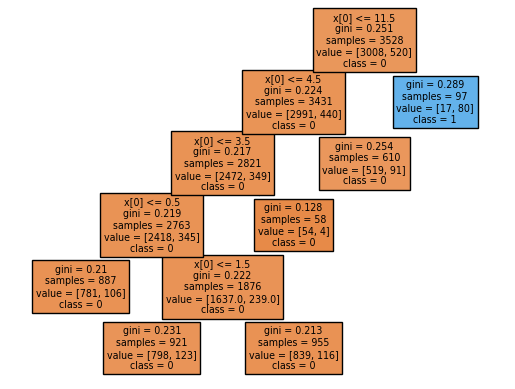

In [1411]:
tree.plot_tree(dt_dropped_calls, filled=True, class_names=["0","1"])
plt.show()
# 0-2, 3-11, 11-

## Create a bar plot for Dropped Calls compared to the Target variable. 


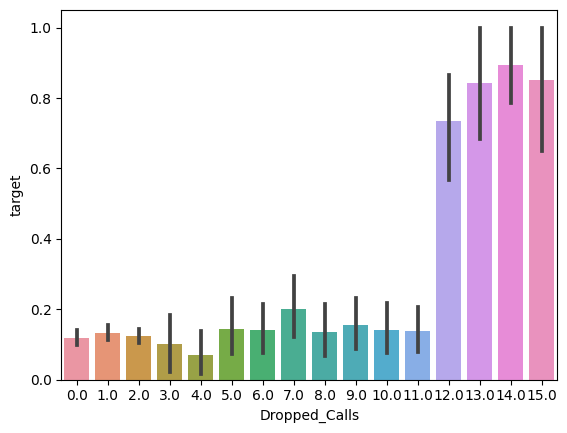

In [1412]:
sns.barplot(data=train, x="Dropped_Calls", y="target")
plt.show()

#### From the tree we observe that above 11.5, thus above 11, the class is dominated by churners. Also from the bar plot we observe that churners are the dominant class for Dropped_Calls above 11

In [1413]:
train.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,id,target,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat
1115,0,20.0,1997-12-22,34.166667,11.0,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,14.382699,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,230.100001,13.724250,31.579500,32.306822,137.306822,0.164928,0.872425,0.094326,0.033249,0.002921,K301840,0,0,1,2.191954,0.034227,0.262926
4207,0,48.0,1999-11-08,14.266667,0.0,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,995.500000,9.617171,95.738942,266.281994,416.281994,0.150610,0.923434,0.055614,0.020952,0.258928,K116920,0,0,1,0.087330,0.034227,0.021290
202,0,28.0,1996-01-31,57.200000,1.0,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,-1296.000000,19.277381,0.000000,50.465922,128.405922,0.203766,0.751190,0.000000,0.248810,0.250327,K276340,0,0,1,2.191954,0.538037,0.262926
2074,0,31.0,1997-09-08,38.666667,4.0,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,12.741109,865.0,1648.300000,1.905549,2038.122673,0.002312,448.300000,9.284414,41.622029,158.568831,308.568831,0.151399,0.856883,0.117940,0.025177,0.236500,K116850,0,0,1,2.191954,0.034227,0.021290
4857,0,26.0,1996-04-04,55.066667,0.0,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,94.800001,9.742817,9.236191,123.457050,273.457050,0.163206,0.948563,0.051437,0.000000,0.294050,K115360,0,0,1,0.087330,0.034227,0.021290


## Bin the Dropped_Calls feature into two Bins for below 11 and above 11 and binarize the new feature into 1 for dropped calls above 11 and 0 for below 11

In [1414]:
# Create salary labels
drop_calls_labels = ["0-11", "12-15"]

# Create the salary ranges list
drop_calls_ranges = [-0.1, 12, train["Dropped_Calls"].max()]

# Create salary_level
train["binned_drop_calls"] = pd.cut(train["Dropped_Calls"],
                                  bins=drop_calls_ranges,
                                  labels=drop_calls_labels)

In [1415]:
train["binned_drop_calls"].value_counts()

binned_drop_calls
0-11     3461
12-15      67
Name: count, dtype: int64

In [1416]:
calculate_woe_iv(train, "binned_drop_calls", "target")

(  Bin Values   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
 1      12-15    67     9   58    0.002992   0.111538 -3.618420  0.392767
 0       0-11  3461  2999  462    0.997008   0.888462  0.115267  0.012512,
 0.40527851115068825)

In [1417]:
train.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,id,target,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat,binned_drop_calls
1115,0,20.0,1997-12-22,34.166667,11.0,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,14.382699,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,230.100001,13.724250,31.579500,32.306822,137.306822,0.164928,0.872425,0.094326,0.033249,0.002921,K301840,0,0,1,2.191954,0.034227,0.262926,0-11
4207,0,48.0,1999-11-08,14.266667,0.0,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,995.500000,9.617171,95.738942,266.281994,416.281994,0.150610,0.923434,0.055614,0.020952,0.258928,K116920,0,0,1,0.087330,0.034227,0.021290,0-11
202,0,28.0,1996-01-31,57.200000,1.0,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,-1296.000000,19.277381,0.000000,50.465922,128.405922,0.203766,0.751190,0.000000,0.248810,0.250327,K276340,0,0,1,2.191954,0.538037,0.262926,0-11
2074,0,31.0,1997-09-08,38.666667,4.0,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,12.741109,865.0,1648.300000,1.905549,2038.122673,0.002312,448.300000,9.284414,41.622029,158.568831,308.568831,0.151399,0.856883,0.117940,0.025177,0.236500,K116850,0,0,1,2.191954,0.034227,0.021290,0-11
4857,0,26.0,1996-04-04,55.066667,0.0,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,94.800001,9.742817,9.236191,123.457050,273.457050,0.163206,0.948563,0.051437,0.000000,0.294050,K115360,0,0,1,0.087330,0.034227,0.021290,0-11


In [1418]:
train["above_11_dropped_calls"] = np.where(train["binned_drop_calls"]=="12-15",1,0)
train["above_11_dropped_calls"].value_counts()

above_11_dropped_calls
0    3461
1      67
Name: count, dtype: int64

In [1419]:
train.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,id,target,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat,binned_drop_calls,above_11_dropped_calls
1115,0,20.0,1997-12-22,34.166667,11.0,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,14.382699,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,230.100001,13.724250,31.579500,32.306822,137.306822,0.164928,0.872425,0.094326,0.033249,0.002921,K301840,0,0,1,2.191954,0.034227,0.262926,0-11,0
4207,0,48.0,1999-11-08,14.266667,0.0,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,995.500000,9.617171,95.738942,266.281994,416.281994,0.150610,0.923434,0.055614,0.020952,0.258928,K116920,0,0,1,0.087330,0.034227,0.021290,0-11,0
202,0,28.0,1996-01-31,57.200000,1.0,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,-1296.000000,19.277381,0.000000,50.465922,128.405922,0.203766,0.751190,0.000000,0.248810,0.250327,K276340,0,0,1,2.191954,0.538037,0.262926,0-11,0
2074,0,31.0,1997-09-08,38.666667,4.0,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,12.741109,865.0,1648.300000,1.905549,2038.122673,0.002312,448.300000,9.284414,41.622029,158.568831,308.568831,0.151399,0.856883,0.117940,0.025177,0.236500,K116850,0,0,1,2.191954,0.034227,0.021290,0-11,0
4857,0,26.0,1996-04-04,55.066667,0.0,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,94.800001,9.742817,9.236191,123.457050,273.457050,0.163206,0.948563,0.051437,0.000000,0.294050,K115360,0,0,1,0.087330,0.034227,0.021290,0-11,0


In [1420]:
train.drop("binned_drop_calls",axis=1,inplace=True)

In [1421]:
train.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,id,target,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat,above_11_dropped_calls
1115,0,20.0,1997-12-22,34.166667,11.0,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,14.382699,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,230.100001,13.724250,31.579500,32.306822,137.306822,0.164928,0.872425,0.094326,0.033249,0.002921,K301840,0,0,1,2.191954,0.034227,0.262926,0
4207,0,48.0,1999-11-08,14.266667,0.0,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,995.500000,9.617171,95.738942,266.281994,416.281994,0.150610,0.923434,0.055614,0.020952,0.258928,K116920,0,0,1,0.087330,0.034227,0.021290,0
202,0,28.0,1996-01-31,57.200000,1.0,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,-1296.000000,19.277381,0.000000,50.465922,128.405922,0.203766,0.751190,0.000000,0.248810,0.250327,K276340,0,0,1,2.191954,0.538037,0.262926,0
2074,0,31.0,1997-09-08,38.666667,4.0,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,12.741109,865.0,1648.300000,1.905549,2038.122673,0.002312,448.300000,9.284414,41.622029,158.568831,308.568831,0.151399,0.856883,0.117940,0.025177,0.236500,K116850,0,0,1,2.191954,0.034227,0.021290,0
4857,0,26.0,1996-04-04,55.066667,0.0,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,94.800001,9.742817,9.236191,123.457050,273.457050,0.163206,0.948563,0.051437,0.000000,0.294050,K115360,0,0,1,0.087330,0.034227,0.021290,0


## Multi-Class Decision Tree for "Age" feature to look for Binning opportunities

In [1422]:
# Binning of Age using Multiway Decision Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


X_Age = train["Age"].values.reshape(-1,1)
y_target = train["target"]

dt_age = DecisionTreeClassifier(max_depth=10, random_state=34, min_samples_split=0.5, splitter="best")
dt_age.fit(X_Age,y_target)


DecisionTreeClassifier(max_depth=10, min_samples_split=0.5, random_state=34)

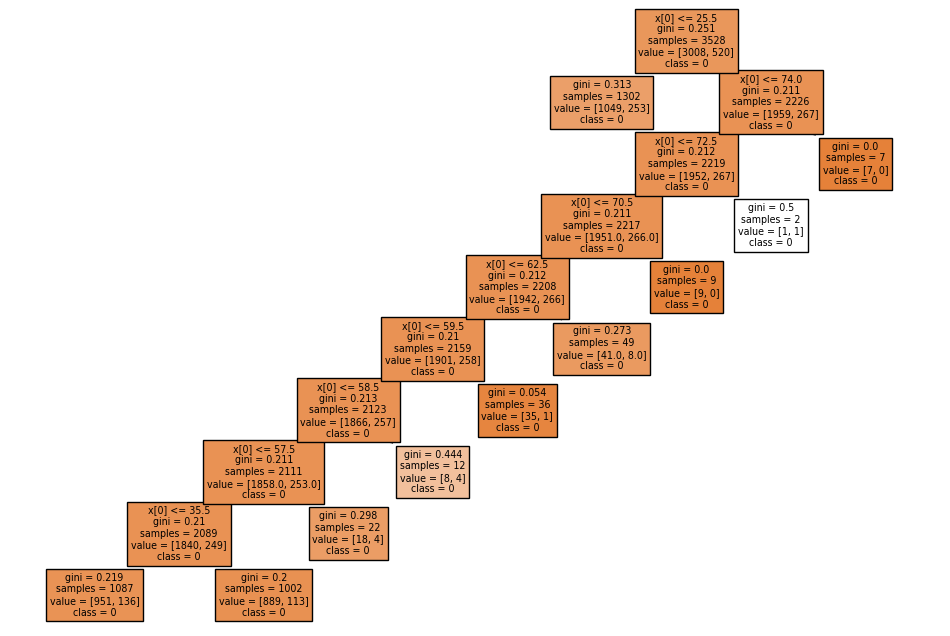

In [1423]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_age, filled=True, class_names=["0","1"])
plt.show()


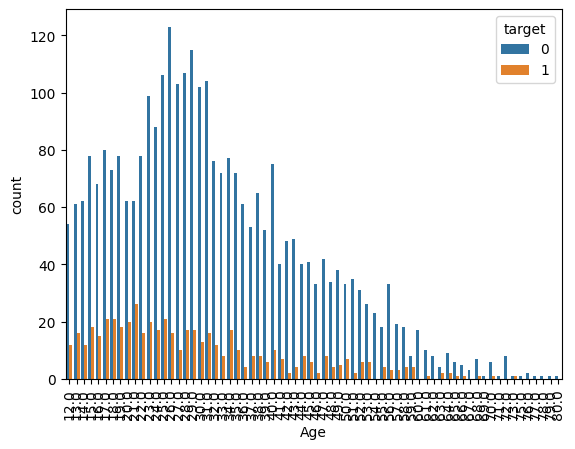

In [1424]:
sns.countplot(data=train, x="Age", hue="target",width=0.8)
plt.xticks(rotation=90)  
plt.show()

c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


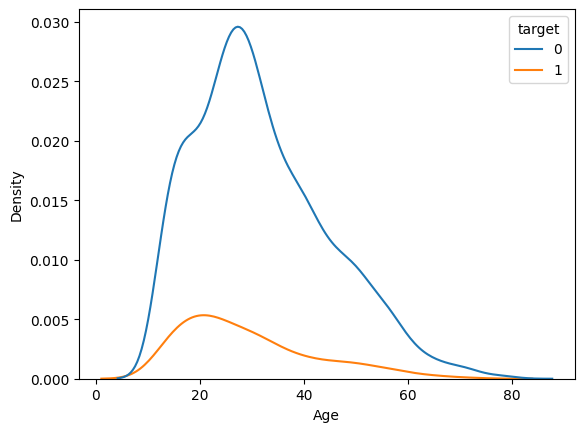

In [1425]:
sns.kdeplot(data=train, x="Age",hue="target")
plt.show()

In [1426]:
# # Create salary labels
# age_labels = ["12-25","26-80"]

# # Create the salary ranges list
# age_ranges = [0, 26, train["Age"].max()]

# # Create salary_level
# train["binned_age"] = pd.cut(train["Age"],
#                                   bins=age_ranges,
#                                   labels=age_labels)

In [1427]:
# train["binned_age"]

In [1428]:
# calculate_woe_iv(train,"binned_age","target")

In [1429]:
# tuple_woe_age = calculate_woe_iv(train,"binned_age","target")
# age_woe = tuple_woe_age[0]
# age_iv = tuple_woe_age[1]
 # print(age_woe, age_iv)

In [1430]:
# age_to_woe_dict = dict(zip(age_woe['Bin Values'], age_woe['WoE']))
# train['woe_age'] = train['binned_age'].map(age_to_woe_dict)

In [1431]:
train.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,id,target,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat,above_11_dropped_calls
1115,0,20.0,1997-12-22,34.166667,11.0,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,14.382699,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,230.100001,13.724250,31.579500,32.306822,137.306822,0.164928,0.872425,0.094326,0.033249,0.002921,K301840,0,0,1,2.191954,0.034227,0.262926,0
4207,0,48.0,1999-11-08,14.266667,0.0,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,995.500000,9.617171,95.738942,266.281994,416.281994,0.150610,0.923434,0.055614,0.020952,0.258928,K116920,0,0,1,0.087330,0.034227,0.021290,0
202,0,28.0,1996-01-31,57.200000,1.0,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,-1296.000000,19.277381,0.000000,50.465922,128.405922,0.203766,0.751190,0.000000,0.248810,0.250327,K276340,0,0,1,2.191954,0.538037,0.262926,0
2074,0,31.0,1997-09-08,38.666667,4.0,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,12.741109,865.0,1648.300000,1.905549,2038.122673,0.002312,448.300000,9.284414,41.622029,158.568831,308.568831,0.151399,0.856883,0.117940,0.025177,0.236500,K116850,0,0,1,2.191954,0.034227,0.021290,0
4857,0,26.0,1996-04-04,55.066667,0.0,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,94.800001,9.742817,9.236191,123.457050,273.457050,0.163206,0.948563,0.051437,0.000000,0.294050,K115360,0,0,1,0.087330,0.034227,0.021290,0


In [1432]:
# train.drop("binned_age",axis=1,inplace=True)

# Identifying Feature Importance. Methods used:
- Decision Trees: Information Gain Per Feature
- Regularization
- Stepwise Selection based on AUC and profit-metric
- t-SNE

## Decision Tree on the train set without id and without Connect_Date 
- Plot each feature based on IV importance 

c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


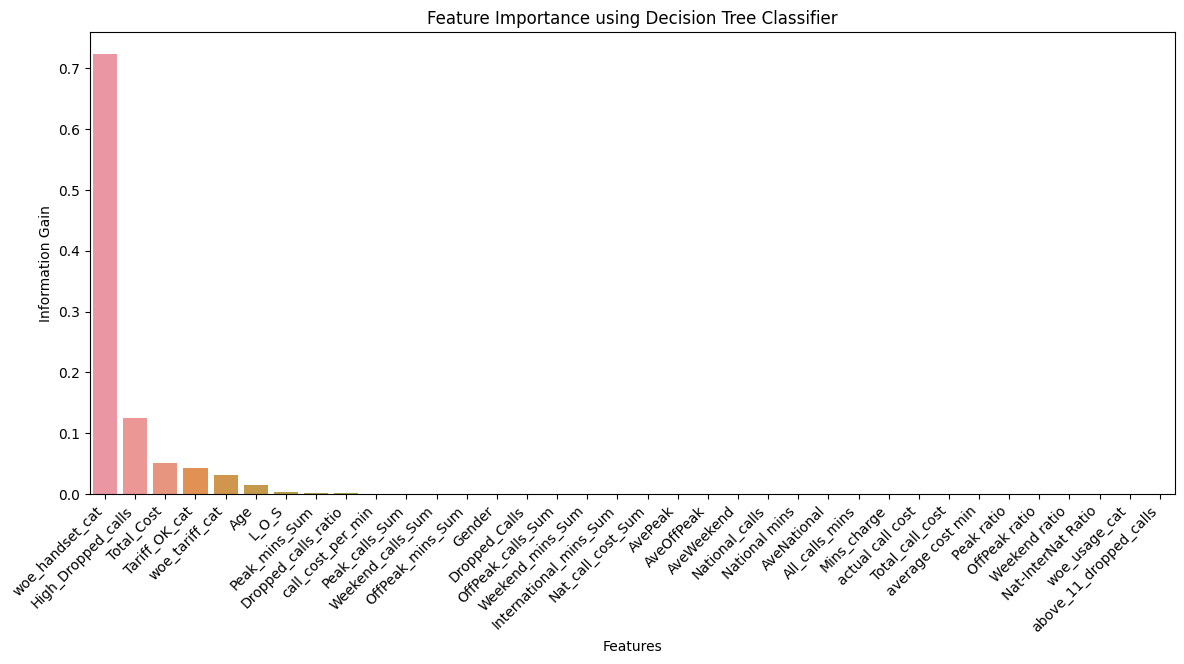

In [1433]:
decision_X_train = train.drop(["target","id","Connect_Date"],axis=1)
decision_y_train = train["target"]
#decision_X_train.drop("Connect_Date",axis=1,inplace=True)

# Fit decision tree on the training set for feature importance 

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt_feat_imp = DecisionTreeClassifier(max_depth=None, random_state=2424,min_samples_split=0.2)

# Fit dt to the training set
dt_feat_imp.fit(decision_X_train, decision_y_train)

feature_names = decision_X_train.columns

importance = list(dt_feat_imp.feature_importances_)
column_names = list(decision_X_train.columns)
feature_dict = dict(zip(column_names, importance))
sorted_dict = dict(sorted(feature_dict.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(14, 6))


sns.barplot(x=list(sorted_dict.keys()), y=list(sorted_dict.values()))

# Set plot labels
plt.xlabel('Features')
plt.ylabel('Information Gain')
plt.title('Feature Importance using Decision Tree Classifier')

# Increase the size of the graph


# Rotate feature names on the x-axis
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

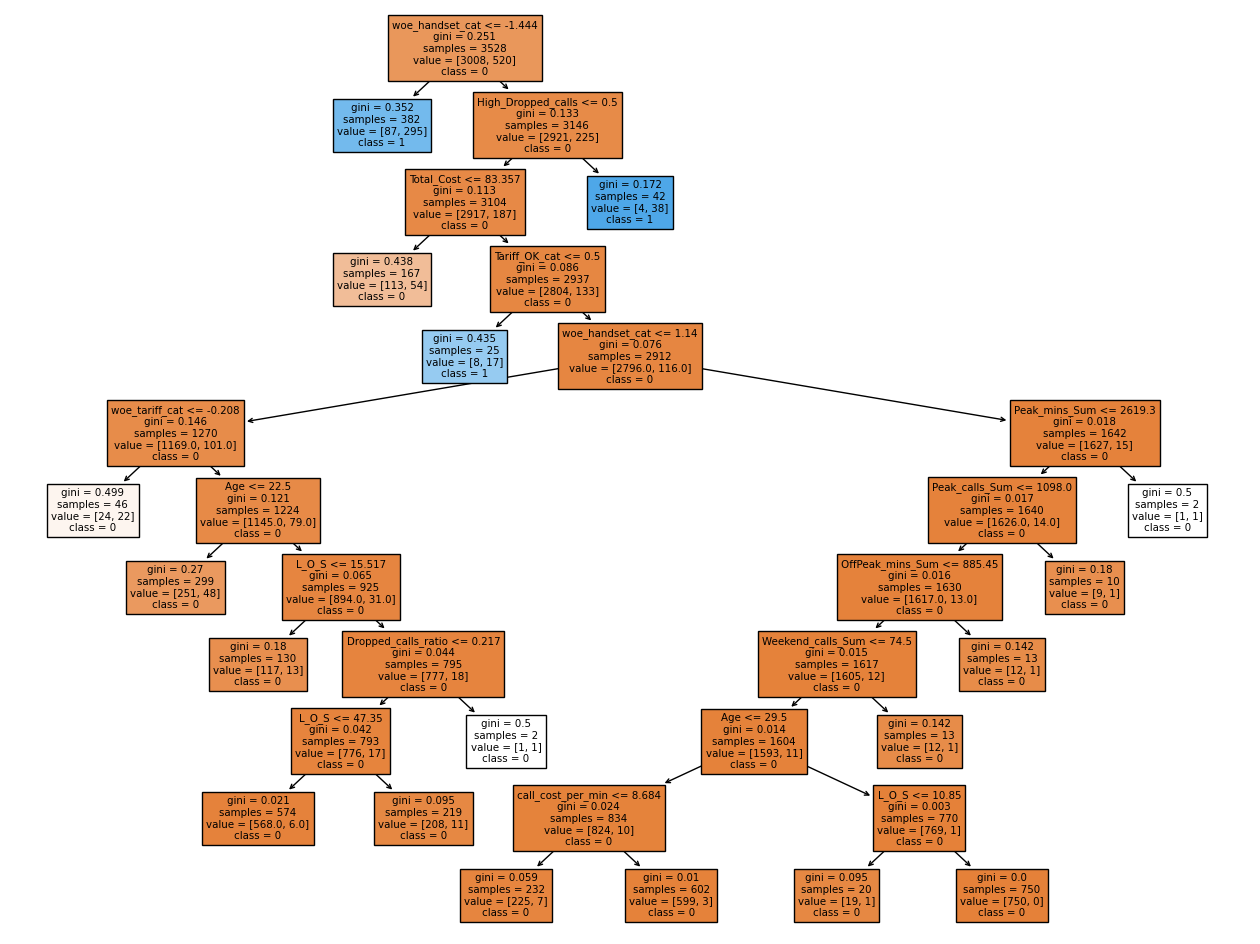

In [1434]:
from sklearn import tree

plt.figure(figsize=(16, 12))
tree.plot_tree(dt_feat_imp, feature_names=list(decision_X_train.columns), filled=True, class_names=["0","1"])
plt.show()


In [1435]:
decision_X_train.head()

,Gender,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat,above_11_dropped_calls
1115,0,20.0,34.166667,11.0,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,14.382699,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,230.100001,13.724250,31.579500,32.306822,137.306822,0.164928,0.872425,0.094326,0.033249,0.002921,0,1,2.191954,0.034227,0.262926,0
4207,0,48.0,14.266667,0.0,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,995.500000,9.617171,95.738942,266.281994,416.281994,0.150610,0.923434,0.055614,0.020952,0.258928,0,1,0.087330,0.034227,0.021290,0
202,0,28.0,57.200000,1.0,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,-1296.000000,19.277381,0.000000,50.465922,128.405922,0.203766,0.751190,0.000000,0.248810,0.250327,0,1,2.191954,0.538037,0.262926,0
2074,0,31.0,38.666667,4.0,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,12.741109,865.0,1648.300000,1.905549,2038.122673,0.002312,448.300000,9.284414,41.622029,158.568831,308.568831,0.151399,0.856883,0.117940,0.025177,0.236500,0,1,2.191954,0.034227,0.021290,0
4857,0,26.0,55.066667,0.0,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,94.800001,9.742817,9.236191,123.457050,273.457050,0.163206,0.948563,0.051437,0.000000,0.294050,0,1,0.087330,0.034227,0.021290,0


# Prepare test set based on the changes on the training set 
- Remove outliers based on the median and iqr used to delete outliers in the training set
- Add the training set calculated woe columns into the test set
- Drop the connect_date column 

## Drop outliers from the test set

In [1436]:
X_train.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Usage_Band,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,id
1115,F,20.0,22/12/97,34.166667,11.0,CAT 100,WC95,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,15.660000,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,Med,230.100001,13.724250,31.579500,32.306822,137.306822,OK,0.164928,0.872425,0.094326,0.033249,0.002921,F,F,K301840
4207,F,48.0,11/08/99,14.266667,0.0,CAT 200,S50,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,High,995.500000,9.617171,95.738942,266.281994,416.281994,OK,0.150610,0.923434,0.055614,0.020952,0.258928,F,F,K116920
202,F,28.0,31/01/96,57.200000,1.0,Play 300,BS210,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,Med,-1296.000000,19.277381,0.000000,50.465922,128.405922,OK,0.203766,0.751190,0.000000,0.248810,0.250327,F,F,K276340
2074,F,31.0,09/08/97,38.666667,4.0,CAT 200,ASAD170,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,41.500000,865.0,1648.300000,1.905549,2038.122673,0.002312,MedHigh,448.300000,9.284414,41.622029,158.568831,308.568831,OK,0.151399,0.856883,0.117940,0.025177,0.236500,F,F,K116850
4857,F,26.0,04/04/96,55.066667,0.0,CAT 200,S50,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,MedHigh,94.800001,9.742817,9.236191,123.457050,273.457050,OK,0.163206,0.948563,0.051437,0.000000,0.294050,F,F,K115360


In [1437]:
def robust_outlier_detection_test(dataset, columns):
    outliers = {}
    for feature_name in columns:
       median = np.median(X_train[feature_name])
       q75, q25 = np.percentile(X_train[feature_name], [75 ,25])
       iqr = q75-q25
       robust_z = (dataset[feature_name] - median) / iqr
       mask = abs(robust_z) > 3 
       outliers[feature_name] = sum(mask)
    return outliers

In [1438]:
test.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Usage_Band,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,id,target
4636,F,61.0,28/07/96,51.233333,3.0,CAT 200,BS110,279.0,1125.000000,158.0,334.200001,9.0,15.600000,170.971561,24.221083,4.032258,2.115190,1.733333,446.0,1474.800001,3.306726,1645.771562,0.003363,MedHigh,274.800001,8.814076,24.221082,75.512551,225.512551,OK,0.137025,0.762815,0.226607,0.010578,0.115929,F,F,K317980,0
1247,F,18.0,06/02/99,20.466667,2.0,CAT 200,ASAD170,20.0,1352.400000,40.0,245.400000,20.0,106.800001,202.761725,45.247043,67.620000,6.135000,5.340000,80.0,1704.600001,21.307500,1907.361726,0.012500,MedHigh,504.600001,8.966913,45.247043,106.075561,256.075561,OK,0.134256,0.793383,0.143963,0.062654,0.118950,F,F,K204000,0
8,M,23.0,07/08/96,50.900000,3.0,CAT 200,S50,658.0,1516.200001,17.0,92.400000,54.0,88.200001,400.284283,47.036139,2.304255,5.435294,1.633333,729.0,1696.800002,2.327572,2097.084285,0.002058,MedHigh,496.800002,9.467822,47.036139,167.121424,317.121424,OK,0.151220,0.893564,0.054455,0.051980,0.235905,F,F,K178510,1
3211,F,42.0,03/08/99,14.533333,10.0,CAT 100,WC95,106.0,374.400000,55.0,245.400000,61.0,93.600000,169.897106,11.621354,3.532075,4.461818,1.534426,222.0,713.400000,3.213514,883.297106,0.022523,Med,113.400000,10.248108,11.621354,62.590486,167.590486,OK,0.189733,0.524811,0.343987,0.131203,0.238151,F,F,K348290,0
2579,F,59.0,21/03/98,31.200000,2.0,Play 300,S80,47.0,397.200000,309.0,810.600000,20.0,64.000000,121.180485,0.000000,8.451064,2.623301,3.200000,376.0,1271.800000,3.382447,1392.980485,0.002660,MedHigh,-528.200000,9.183205,0.000000,48.472194,126.412194,OK,0.090749,0.312313,0.637364,0.050322,0.095283,F,F,K278820,0


In [1439]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1512 entries, 4636 to 4429
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  1512 non-null   object 
 1   Age                     1512 non-null   float64
 2   Connect_Date            1512 non-null   object 
 3   L_O_S                   1512 non-null   float64
 4   Dropped_Calls           1512 non-null   float64
 5   tariff                  1512 non-null   object 
 6   Handset                 1512 non-null   object 
 7   Peak_calls_Sum          1512 non-null   float64
 8   Peak_mins_Sum           1512 non-null   float64
 9   OffPeak_calls_Sum       1512 non-null   float64
 10  OffPeak_mins_Sum        1512 non-null   float64
 11  Weekend_calls_Sum       1512 non-null   float64
 12  Weekend_mins_Sum        1512 non-null   float64
 13  International_mins_Sum  1512 non-null   float64
 14  Nat_call_cost_Sum       1512 non-null   fl

In [1440]:
filtered_columns_test = test.select_dtypes(include=["int","float"]).columns

filtered_columns_test = filtered_columns_test.drop('target')
filtered_columns_test


Index(['Age', 'L_O_S', 'Dropped_Calls', 'Peak_calls_Sum', 'Peak_mins_Sum',
       'OffPeak_calls_Sum', 'OffPeak_mins_Sum', 'Weekend_calls_Sum',
       'Weekend_mins_Sum', 'International_mins_Sum', 'Nat_call_cost_Sum',
       'AvePeak', 'AveOffPeak', 'AveWeekend', 'National_calls',
       'National mins', 'AveNational', 'All_calls_mins', 'Dropped_calls_ratio',
       'Mins_charge', 'call_cost_per_min', 'actual call cost',
       'Total_call_cost', 'Total_Cost', 'average cost min', 'Peak ratio',
       'OffPeak ratio', 'Weekend ratio', 'Nat-InterNat Ratio'],
      dtype='object')

In [1441]:
outlier_dict_test = robust_outlier_detection_test(test,filtered_columns_test)
outlier_dict_test

{'Age': 0,
 'L_O_S': 0,
 'Dropped_Calls': 214,
 'Peak_calls_Sum': 19,
 'Peak_mins_Sum': 0,
 'OffPeak_calls_Sum': 7,
 'OffPeak_mins_Sum': 0,
 'Weekend_calls_Sum': 15,
 'Weekend_mins_Sum': 0,
 'International_mins_Sum': 11,
 'Nat_call_cost_Sum': 49,
 'AvePeak': 141,
 'AveOffPeak': 151,
 'AveWeekend': 141,
 'National_calls': 11,
 'National mins': 1,
 'AveNational': 75,
 'All_calls_mins': 4,
 'Dropped_calls_ratio': 106,
 'Mins_charge': 27,
 'call_cost_per_min': 1,
 'actual call cost': 53,
 'Total_call_cost': 27,
 'Total_Cost': 6,
 'average cost min': 42,
 'Peak ratio': 0,
 'OffPeak ratio': 0,
 'Weekend ratio': 38,
 'Nat-InterNat Ratio': 2}

c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


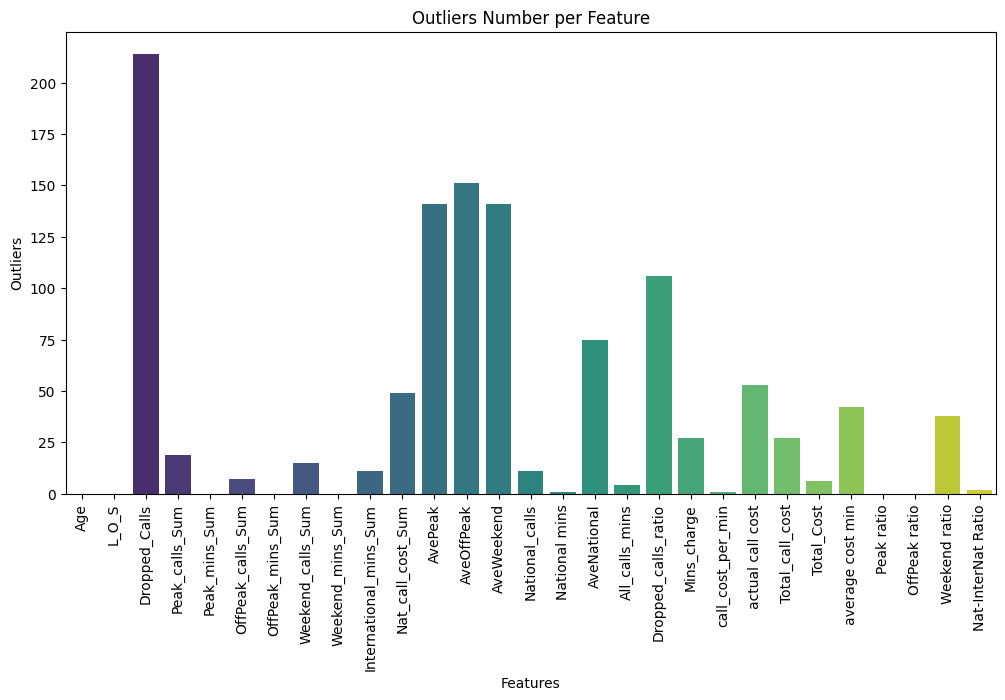

In [1442]:
keys = list(outlier_dict_test.keys())
values = list(outlier_dict_test.values())

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=keys, y=values, palette='viridis')
plt.xlabel('Features')
plt.ylabel('Outliers')
plt.title('Outliers Number per Feature')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [1443]:
def truncate_outliers_test(dataset,columns):
    for feature_name in columns:
       median = np.median(X_train[feature_name])
       q75, q25 = np.percentile(X_train[feature_name], [75 ,25])
       iqr = q75-q25
       k = 3*iqr + median
       dataset[feature_name] = np.where((abs((dataset[feature_name]  - median) / iqr)) > 3, k, dataset[feature_name] )

In [1444]:
filtered_columns_trunct_test = list(filtered_columns_test)
#filtered_columns_trunct_test
filtered_columns_trunct_test = filtered_columns_trunct_test[11:14]  + [filtered_columns_trunct_test[16]] + [filtered_columns_trunct_test[24]] 


In [1445]:
filtered_columns_trunct_test

['AvePeak', 'AveOffPeak', 'AveWeekend', 'AveNational', 'average cost min']

In [1446]:
truncate_outliers_test(test,filtered_columns_trunct_test)

In [1447]:
outlier_dict_test_2 = robust_outlier_detection_test(test, filtered_columns_test)
outlier_dict_test_2

{'Age': 0,
 'L_O_S': 0,
 'Dropped_Calls': 214,
 'Peak_calls_Sum': 19,
 'Peak_mins_Sum': 0,
 'OffPeak_calls_Sum': 7,
 'OffPeak_mins_Sum': 0,
 'Weekend_calls_Sum': 15,
 'Weekend_mins_Sum': 0,
 'International_mins_Sum': 11,
 'Nat_call_cost_Sum': 49,
 'AvePeak': 0,
 'AveOffPeak': 0,
 'AveWeekend': 0,
 'National_calls': 11,
 'National mins': 1,
 'AveNational': 0,
 'All_calls_mins': 4,
 'Dropped_calls_ratio': 106,
 'Mins_charge': 27,
 'call_cost_per_min': 1,
 'actual call cost': 53,
 'Total_call_cost': 27,
 'Total_Cost': 6,
 'average cost min': 0,
 'Peak ratio': 0,
 'OffPeak ratio': 0,
 'Weekend ratio': 38,
 'Nat-InterNat Ratio': 2}

c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


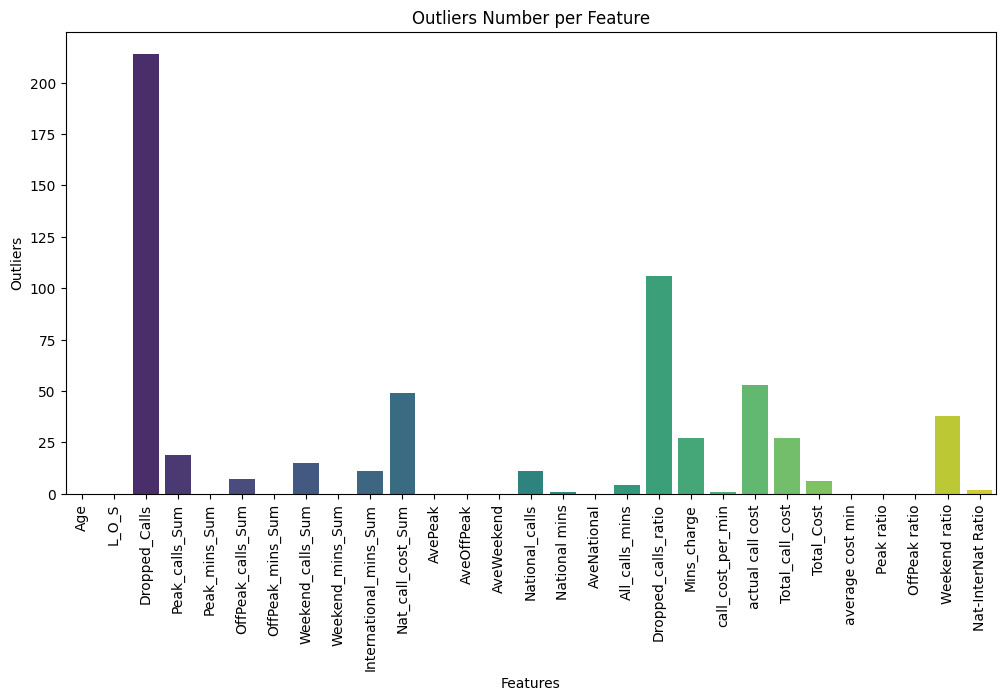

In [1448]:
keys = list(outlier_dict_test_2.keys())
values = list(outlier_dict_test_2.values())

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=keys, y=values, palette='viridis')
plt.xlabel('Features')
plt.ylabel('Outliers')
plt.title('Outliers Number per Feature')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

## Add woe values from the training set to the test set and create the dummy variables

In [1449]:
   # Create a list of categories
handset_categories = ["Handset_safe", "Handset_neutral", "Handset_risky"]

# Create short_flights
handset_safe = "BS210|S80|ASAD170|WC95|CAS60"

# Create medium_flights
handset_neutral = "S50|BS110"

# Create long_flights
handset_risky = "SOP10|ASAD90|CAS30|SOP20"

# Create conditions for values in flight_categories to be created
conditions = [
    (test["Handset"].str.contains(handset_safe)),
    (test["Handset"].str.contains(handset_neutral)),
    (test["Handset"].str.contains(handset_risky))
]

# Apply the conditions list to the flight_categories
test["Handset_Category"] = np.select(conditions, 
                                        handset_categories)


handset_to_woe_dict = dict(zip(handset_cat_woe['Bin Values'], handset_cat_woe['WoE']))
test['woe_handset_cat'] = test['Handset_Category'].map(handset_to_woe_dict)



In [1450]:
test.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Usage_Band,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,id,target,Handset_Category,woe_handset_cat
4636,F,61.0,28/07/96,51.233333,3.0,CAT 200,BS110,279.0,1125.000000,158.0,334.200001,9.0,15.600000,170.971561,24.221083,4.032258,2.115190,1.733333,446.0,1474.800001,3.306726,1645.771562,0.003363,MedHigh,274.800001,8.814076,24.221082,75.512551,225.512551,OK,0.137025,0.762815,0.226607,0.010578,0.115929,F,F,K317980,0,Handset_neutral,0.087330
1247,F,18.0,06/02/99,20.466667,2.0,CAT 200,ASAD170,20.0,1352.400000,40.0,245.400000,20.0,106.800001,202.761725,45.247043,15.075772,6.135000,5.340000,80.0,1704.600001,9.956815,1907.361726,0.012500,MedHigh,504.600001,8.966913,45.247043,106.075561,256.075561,OK,0.134256,0.793383,0.143963,0.062654,0.118950,F,F,K204000,0,Handset_safe,2.191954
8,M,23.0,07/08/96,50.900000,3.0,CAT 200,S50,658.0,1516.200001,17.0,92.400000,54.0,88.200001,400.284283,47.036139,2.304255,5.435294,1.633333,729.0,1696.800002,2.327572,2097.084285,0.002058,MedHigh,496.800002,9.467822,47.036139,167.121424,317.121424,OK,0.151220,0.893564,0.054455,0.051980,0.235905,F,F,K178510,1,Handset_neutral,0.087330
3211,F,42.0,03/08/99,14.533333,10.0,CAT 100,WC95,106.0,374.400000,55.0,245.400000,61.0,93.600000,169.897106,11.621354,3.532075,4.461818,1.534426,222.0,713.400000,3.213514,883.297106,0.022523,Med,113.400000,10.248108,11.621354,62.590486,167.590486,OK,0.189733,0.524811,0.343987,0.131203,0.238151,F,F,K348290,0,Handset_safe,2.191954
2579,F,59.0,21/03/98,31.200000,2.0,Play 300,S80,47.0,397.200000,309.0,810.600000,20.0,64.000000,121.180485,0.000000,8.451064,2.623301,3.200000,376.0,1271.800000,3.382447,1392.980485,0.002660,MedHigh,-528.200000,9.183205,0.000000,48.472194,126.412194,OK,0.090749,0.312313,0.637364,0.050322,0.095283,F,F,K278820,0,Handset_safe,2.191954


In [1451]:
   # Create a list of categories
tariff_categories = ["tariff_play_300", "tariff_CAT", "tariff_play_100"]

# Create short_flights
tariff_less_risky = "Play 300"

tariff_neutral = "CAT 200|CAT 50|CAT 100"

# Create medium_flights
tariff_risky = "Play 100"

# Create long_flights
#handset_risky = "SOP10|ASAD90|CAS30|SOP20"

# Create conditions for values in flight_categories to be created
conditions = [
    (test["tariff"].str.contains(tariff_less_risky)),
    (test["tariff"].str.contains(tariff_neutral)),
    (test["tariff"].str.contains(tariff_risky))
]

# Apply the conditions list to the flight_categories
test["Tariff_category"] = np.select(conditions, 
                                        tariff_categories)

tariff_to_woe_dict = dict(zip(tariff_cat_woe['Bin Values'], tariff_cat_woe['WoE']))
test['woe_tariff_cat'] = test['Tariff_category'].map(tariff_to_woe_dict)

In [1452]:
test.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Usage_Band,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,id,target,Handset_Category,woe_handset_cat,Tariff_category,woe_tariff_cat
4636,F,61.0,28/07/96,51.233333,3.0,CAT 200,BS110,279.0,1125.000000,158.0,334.200001,9.0,15.600000,170.971561,24.221083,4.032258,2.115190,1.733333,446.0,1474.800001,3.306726,1645.771562,0.003363,MedHigh,274.800001,8.814076,24.221082,75.512551,225.512551,OK,0.137025,0.762815,0.226607,0.010578,0.115929,F,F,K317980,0,Handset_neutral,0.087330,tariff_CAT,0.034227
1247,F,18.0,06/02/99,20.466667,2.0,CAT 200,ASAD170,20.0,1352.400000,40.0,245.400000,20.0,106.800001,202.761725,45.247043,15.075772,6.135000,5.340000,80.0,1704.600001,9.956815,1907.361726,0.012500,MedHigh,504.600001,8.966913,45.247043,106.075561,256.075561,OK,0.134256,0.793383,0.143963,0.062654,0.118950,F,F,K204000,0,Handset_safe,2.191954,tariff_CAT,0.034227
8,M,23.0,07/08/96,50.900000,3.0,CAT 200,S50,658.0,1516.200001,17.0,92.400000,54.0,88.200001,400.284283,47.036139,2.304255,5.435294,1.633333,729.0,1696.800002,2.327572,2097.084285,0.002058,MedHigh,496.800002,9.467822,47.036139,167.121424,317.121424,OK,0.151220,0.893564,0.054455,0.051980,0.235905,F,F,K178510,1,Handset_neutral,0.087330,tariff_CAT,0.034227
3211,F,42.0,03/08/99,14.533333,10.0,CAT 100,WC95,106.0,374.400000,55.0,245.400000,61.0,93.600000,169.897106,11.621354,3.532075,4.461818,1.534426,222.0,713.400000,3.213514,883.297106,0.022523,Med,113.400000,10.248108,11.621354,62.590486,167.590486,OK,0.189733,0.524811,0.343987,0.131203,0.238151,F,F,K348290,0,Handset_safe,2.191954,tariff_CAT,0.034227
2579,F,59.0,21/03/98,31.200000,2.0,Play 300,S80,47.0,397.200000,309.0,810.600000,20.0,64.000000,121.180485,0.000000,8.451064,2.623301,3.200000,376.0,1271.800000,3.382447,1392.980485,0.002660,MedHigh,-528.200000,9.183205,0.000000,48.472194,126.412194,OK,0.090749,0.312313,0.637364,0.050322,0.095283,F,F,K278820,0,Handset_safe,2.191954,tariff_play_300,0.538037


In [1453]:
   # Create a list of categories
usage_categories = ["usage_low", "usage_med", "usage_high"]

# Create short_flights
usage_low = "Low"

usage_med = r"\bMed\b"

usage_high = "High"




# Create long_flights
#handset_risky = "SOP10|ASAD90|CAS30|SOP20"

# Create conditions for values in flight_categories to be created
conditions = [
    (test["Usage_Band"].str.contains(usage_low)),
    (test["Usage_Band"].str.contains(usage_med)),
    (test["Usage_Band"].str.contains(usage_high))
]

# Apply the conditions list to the flight_categories
test["Usage_category"] = np.select(conditions, 
                                        usage_categories)

usage_to_woe_dict = dict(zip(usage_cat_woe['Bin Values'], usage_cat_woe['WoE']))
test['woe_usage_cat'] = test['Usage_category'].map(usage_to_woe_dict)

In [1454]:
# Binarize the High Dropped calls feature 


from sklearn.preprocessing import LabelEncoder
# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
test["High_Dropped_calls"] = enc.fit_transform(test["high Dropped calls"])

# Compare the two columns
#print(train[["High_Dropped_calls", "high Dropped calls"]].head())

test.drop("high Dropped calls", axis=1, inplace=True)


In [1455]:
# The variables connect_month, connect_year, No Usage, Tariff_OK, and Gender are DROPPED from the training set

test.drop("No Usage", axis=1, inplace=True)

In [1456]:
enc_2 = LabelEncoder()

# Apply the encoding to the "Accessible" column
test["Gender"] = enc_2.fit_transform(test["Gender"])

In [1457]:
   # Create a list of categories
tariff_OK_categories = ["OK", "Other"]

# Create short_flights
okay = "OK"

other = "CAT|Play"
# Create long_flights
#handset_risky = "SOP10|ASAD90|CAS30|SOP20"

# Create conditions for values in flight_categories to be created
conditions = [
    (test["Tariff_OK"].str.contains(okay)),
    (test["Tariff_OK"].str.contains(other))
]

# Apply the conditions list to the flight_categories
test["Tariff_OK_cat"] = np.select(conditions, 
                                        tariff_OK_categories)


test["Tariff_OK_cat"] = np.where(test["Tariff_OK_cat"]=="OK", 1,0)


In [1458]:
test.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Usage_Band,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,id,target,Handset_Category,woe_handset_cat,Tariff_category,woe_tariff_cat,Usage_category,woe_usage_cat,High_Dropped_calls,Tariff_OK_cat
4636,0,61.0,28/07/96,51.233333,3.0,CAT 200,BS110,279.0,1125.000000,158.0,334.200001,9.0,15.600000,170.971561,24.221083,4.032258,2.115190,1.733333,446.0,1474.800001,3.306726,1645.771562,0.003363,MedHigh,274.800001,8.814076,24.221082,75.512551,225.512551,OK,0.137025,0.762815,0.226607,0.010578,0.115929,K317980,0,Handset_neutral,0.087330,tariff_CAT,0.034227,usage_high,0.021290,0,1
1247,0,18.0,06/02/99,20.466667,2.0,CAT 200,ASAD170,20.0,1352.400000,40.0,245.400000,20.0,106.800001,202.761725,45.247043,15.075772,6.135000,5.340000,80.0,1704.600001,9.956815,1907.361726,0.012500,MedHigh,504.600001,8.966913,45.247043,106.075561,256.075561,OK,0.134256,0.793383,0.143963,0.062654,0.118950,K204000,0,Handset_safe,2.191954,tariff_CAT,0.034227,usage_high,0.021290,0,1
8,1,23.0,07/08/96,50.900000,3.0,CAT 200,S50,658.0,1516.200001,17.0,92.400000,54.0,88.200001,400.284283,47.036139,2.304255,5.435294,1.633333,729.0,1696.800002,2.327572,2097.084285,0.002058,MedHigh,496.800002,9.467822,47.036139,167.121424,317.121424,OK,0.151220,0.893564,0.054455,0.051980,0.235905,K178510,1,Handset_neutral,0.087330,tariff_CAT,0.034227,usage_high,0.021290,0,1
3211,0,42.0,03/08/99,14.533333,10.0,CAT 100,WC95,106.0,374.400000,55.0,245.400000,61.0,93.600000,169.897106,11.621354,3.532075,4.461818,1.534426,222.0,713.400000,3.213514,883.297106,0.022523,Med,113.400000,10.248108,11.621354,62.590486,167.590486,OK,0.189733,0.524811,0.343987,0.131203,0.238151,K348290,0,Handset_safe,2.191954,tariff_CAT,0.034227,usage_med,0.262926,0,1
2579,0,59.0,21/03/98,31.200000,2.0,Play 300,S80,47.0,397.200000,309.0,810.600000,20.0,64.000000,121.180485,0.000000,8.451064,2.623301,3.200000,376.0,1271.800000,3.382447,1392.980485,0.002660,MedHigh,-528.200000,9.183205,0.000000,48.472194,126.412194,OK,0.090749,0.312313,0.637364,0.050322,0.095283,K278820,0,Handset_safe,2.191954,tariff_play_300,0.538037,usage_high,0.021290,0,1


In [1459]:
train.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,id,target,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat,above_11_dropped_calls
1115,0,20.0,1997-12-22,34.166667,11.0,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,14.382699,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,230.100001,13.724250,31.579500,32.306822,137.306822,0.164928,0.872425,0.094326,0.033249,0.002921,K301840,0,0,1,2.191954,0.034227,0.262926,0
4207,0,48.0,1999-11-08,14.266667,0.0,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,995.500000,9.617171,95.738942,266.281994,416.281994,0.150610,0.923434,0.055614,0.020952,0.258928,K116920,0,0,1,0.087330,0.034227,0.021290,0
202,0,28.0,1996-01-31,57.200000,1.0,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,-1296.000000,19.277381,0.000000,50.465922,128.405922,0.203766,0.751190,0.000000,0.248810,0.250327,K276340,0,0,1,2.191954,0.538037,0.262926,0
2074,0,31.0,1997-09-08,38.666667,4.0,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,12.741109,865.0,1648.300000,1.905549,2038.122673,0.002312,448.300000,9.284414,41.622029,158.568831,308.568831,0.151399,0.856883,0.117940,0.025177,0.236500,K116850,0,0,1,2.191954,0.034227,0.021290,0
4857,0,26.0,1996-04-04,55.066667,0.0,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,94.800001,9.742817,9.236191,123.457050,273.457050,0.163206,0.948563,0.051437,0.000000,0.294050,K115360,0,0,1,0.087330,0.034227,0.021290,0


In [1460]:
test.drop(["tariff","Handset","Usage_Band","Tariff_OK","Handset_Category","Tariff_category","Usage_category"],axis=1,inplace=True)

In [1461]:
test["Connect_Date"] = pd.to_datetime(test["Connect_Date"])

C:\Users\Johnn\AppData\Local\Temp\ipykernel_22204\1460781155.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test["Connect_Date"] = pd.to_datetime(test["Connect_Date"])


In [1462]:
# Create salary labels
drop_calls_labels = ["0-11", "12-15"]

# Create the salary ranges list
drop_calls_ranges = [-0.1, 12, train["Dropped_Calls"].max()]

# Create salary_level
test["binned_drop_calls"] = pd.cut(test["Dropped_Calls"],
                                  bins=drop_calls_ranges,
                                  labels=drop_calls_labels)

test["above_11_dropped_calls"] = np.where(test["binned_drop_calls"]=="12-15",1,0)

In [1463]:
# # Create salary labels
# age_labels = ["12-25","26-80"]

# # Create the salary ranges list
# age_ranges = [0, 26, train["Age"].max()]

# # Create salary_level
# test["binned_age"] = pd.cut(test["Age"],
#                                   bins=age_ranges,
#                                   labels=age_labels)

# age_to_woe_dict = dict(zip(age_woe['Bin Values'], age_woe['WoE']))
# test['woe_age'] = test['binned_age'].map(age_to_woe_dict)

In [1464]:
test.drop("binned_drop_calls",axis=1,inplace=True)

In [1465]:
test.shape 

(1512, 39)

In [1466]:
test.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,id,target,woe_handset_cat,woe_tariff_cat,woe_usage_cat,High_Dropped_calls,Tariff_OK_cat,above_11_dropped_calls
4636,0,61.0,1996-07-28,51.233333,3.0,279.0,1125.000000,158.0,334.200001,9.0,15.600000,170.971561,24.221083,4.032258,2.115190,1.733333,446.0,1474.800001,3.306726,1645.771562,0.003363,274.800001,8.814076,24.221082,75.512551,225.512551,0.137025,0.762815,0.226607,0.010578,0.115929,K317980,0,0.087330,0.034227,0.021290,0,1,0
1247,0,18.0,1999-06-02,20.466667,2.0,20.0,1352.400000,40.0,245.400000,20.0,106.800001,202.761725,45.247043,15.075772,6.135000,5.340000,80.0,1704.600001,9.956815,1907.361726,0.012500,504.600001,8.966913,45.247043,106.075561,256.075561,0.134256,0.793383,0.143963,0.062654,0.118950,K204000,0,2.191954,0.034227,0.021290,0,1,0
8,1,23.0,1996-07-08,50.900000,3.0,658.0,1516.200001,17.0,92.400000,54.0,88.200001,400.284283,47.036139,2.304255,5.435294,1.633333,729.0,1696.800002,2.327572,2097.084285,0.002058,496.800002,9.467822,47.036139,167.121424,317.121424,0.151220,0.893564,0.054455,0.051980,0.235905,K178510,1,0.087330,0.034227,0.021290,0,1,0
3211,0,42.0,1999-03-08,14.533333,10.0,106.0,374.400000,55.0,245.400000,61.0,93.600000,169.897106,11.621354,3.532075,4.461818,1.534426,222.0,713.400000,3.213514,883.297106,0.022523,113.400000,10.248108,11.621354,62.590486,167.590486,0.189733,0.524811,0.343987,0.131203,0.238151,K348290,0,2.191954,0.034227,0.262926,0,1,0
2579,0,59.0,1998-03-21,31.200000,2.0,47.0,397.200000,309.0,810.600000,20.0,64.000000,121.180485,0.000000,8.451064,2.623301,3.200000,376.0,1271.800000,3.382447,1392.980485,0.002660,-528.200000,9.183205,0.000000,48.472194,126.412194,0.090749,0.312313,0.637364,0.050322,0.095283,K278820,0,2.191954,0.538037,0.021290,0,1,0


In [1467]:
train.shape

(3528, 39)

# Check Correlations

In [1468]:
train.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,id,target,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat,above_11_dropped_calls
1115,0,20.0,1997-12-22,34.166667,11.0,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,14.382699,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,230.100001,13.724250,31.579500,32.306822,137.306822,0.164928,0.872425,0.094326,0.033249,0.002921,K301840,0,0,1,2.191954,0.034227,0.262926,0
4207,0,48.0,1999-11-08,14.266667,0.0,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,995.500000,9.617171,95.738942,266.281994,416.281994,0.150610,0.923434,0.055614,0.020952,0.258928,K116920,0,0,1,0.087330,0.034227,0.021290,0
202,0,28.0,1996-01-31,57.200000,1.0,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,-1296.000000,19.277381,0.000000,50.465922,128.405922,0.203766,0.751190,0.000000,0.248810,0.250327,K276340,0,0,1,2.191954,0.538037,0.262926,0
2074,0,31.0,1997-09-08,38.666667,4.0,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,12.741109,865.0,1648.300000,1.905549,2038.122673,0.002312,448.300000,9.284414,41.622029,158.568831,308.568831,0.151399,0.856883,0.117940,0.025177,0.236500,K116850,0,0,1,2.191954,0.034227,0.021290,0
4857,0,26.0,1996-04-04,55.066667,0.0,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,94.800001,9.742817,9.236191,123.457050,273.457050,0.163206,0.948563,0.051437,0.000000,0.294050,K115360,0,0,1,0.087330,0.034227,0.021290,0


In [1469]:
corr = train.drop("id",axis=1).corr()
corr

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,target,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat,above_11_dropped_calls
Gender,1.000000,0.028929,-0.018450,0.024473,0.004778,0.033458,0.011237,0.004817,-0.010414,-0.004411,-0.003039,0.015986,0.013944,-0.024415,-0.004411,0.007840,0.032372,0.006379,-0.051215,0.009002,-0.022811,0.022051,-0.010075,0.014042,0.013200,0.019953,0.008187,0.020965,-0.015892,-0.021178,0.000862,0.036387,0.001984,-0.005195,-0.160755,-0.005316,0.010971,-0.007309
Age,0.028929,1.000000,0.012649,-0.011797,-0.003762,0.029097,0.031424,0.020790,0.026498,0.011158,0.016810,0.053183,0.020359,-0.000311,0.006937,0.009828,0.035243,0.039974,-0.012532,0.045968,0.012435,0.004912,-0.034323,0.021199,0.049140,0.050104,-0.014061,0.005522,-0.002771,-0.010193,0.037708,-0.075295,-0.007001,0.008743,0.037277,0.022645,0.013097,0.002386
Connect_Date,-0.018450,0.012649,1.000000,-0.977174,0.048647,-0.003826,-0.010696,-0.005179,0.016761,-0.012339,-0.025459,0.000332,-0.007698,-0.013627,0.017988,-0.005906,-0.006214,-0.005411,0.008243,-0.004549,0.023959,-0.015177,0.005746,-0.008309,-0.002152,-0.007729,0.000769,-0.015456,0.015862,0.002093,0.014462,0.023280,0.024950,0.016607,-0.010195,0.005260,0.004594,0.008974
L_O_S,0.024473,-0.011797,-0.977174,1.000000,-0.044941,0.006939,0.014992,0.005030,-0.015163,0.016103,0.029354,-0.002197,0.010298,0.014178,-0.018545,0.009852,0.009262,0.010235,-0.011543,0.008256,-0.024816,0.018117,-0.005566,0.010977,0.002112,0.008892,-0.007563,0.017699,-0.017032,-0.006088,-0.021218,-0.028674,-0.023892,-0.015638,0.013734,-0.004427,0.001563,-0.009814
Dropped_Calls,0.004778,-0.003762,0.048647,-0.044941,1.000000,-0.002923,-0.017941,-0.001984,-0.000209,-0.004752,0.001123,-0.007131,0.002838,-0.007969,-0.013165,-0.004866,-0.003726,-0.016627,-0.007813,-0.015790,0.533963,0.006237,0.012407,0.003243,-0.004272,-0.010936,0.029273,-0.017985,0.010584,0.028110,-0.003510,0.187526,0.524844,0.016062,-0.142622,-0.021799,-0.011894,0.459534
Peak_calls_Sum,0.033458,0.029097,-0.003826,0.006939,-0.002923,1.000000,0.729846,0.013427,-0.000329,-0.013210,0.002664,0.372966,0.590260,-0.480329,0.015162,0.030884,0.926394,0.676325,-0.449125,0.660687,-0.217065,0.537698,-0.192094,0.589970,0.504324,0.624845,-0.305666,0.513381,-0.452920,-0.310667,-0.059996,-0.015882,0.000062,0.018439,-0.050457,0.110370,0.130714,-0.013030
Peak_mins_Sum,0.011237,0.031424,-0.010696,0.014992,-0.017941,0.729846,1.000000,0.002495,0.000012,-0.015483,0.009782,0.531417,0.801887,-0.014242,0.020508,0.032575,0.673053,0.927240,0.025382,0.910262,-0.204771,0.738201,-0.272640,0.801378,0.701822,0.868486,-0.414238,0.704837,-0.620482,-0.430912,-0.071438,-0.009129,-0.017791,0.016076,-0.084494,0.153913,0.173709,-0.021949
OffPeak_calls_Sum,0.004817,0.020790,-0.005179,0.005030,-0.001984,0.013427,0.002495,1.000000,0.677814,0.002867,-0.008073,0.163679,0.080450,0.014238,-0.506040,-0.025975,0.383855,0.251286,-0.323720,0.251053,-0.169438,-0.056673,-0.320269,0.082906,0.188923,0.128459,-0.394954,-0.361011,0.440038,-0.177903,-0.006875,-0.063162,-0.008874,0.049565,0.118898,0.206542,0.188619,-0.000370
OffPeak_mins_Sum,-0.010414,0.026498,0.016761,-0.015163,-0.000209,-0.000329,0.000012,0.677814,1.000000,0.007128,0.008853,0.232733,0.091327,0.011975,0.052875,-0.014189,0.251806,0.368691,-0.014334,0.366702,-0.127409,-0.115678,-0.446358,0.095085,0.266211,0.174538,-0.602391,-0.531528,0.646608,-0.257780,-0.015198,-0.071407,-0.005881,0.072256,0.170764,0.331822,0.285357,-0.006309
Weekend_calls_Sum,-0.004411,0.011158,-0.012339,0.016103,-0.004752,-0.013210,-0.015483,0.002867,0.007128,1.000000,0.707865

c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


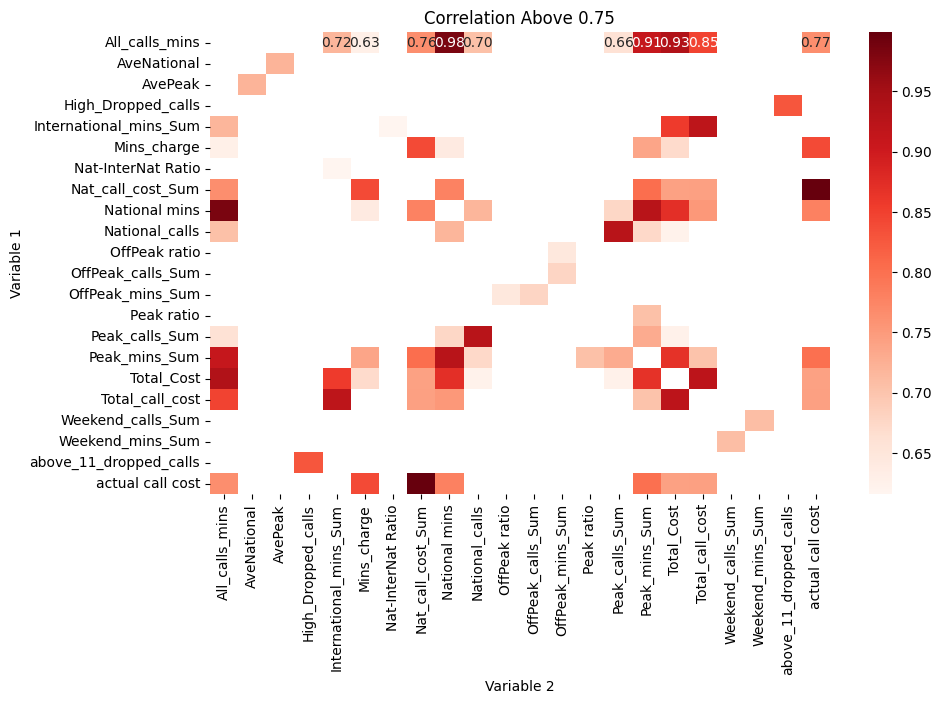

In [1470]:
high_corr = corr[(corr > 0.60) & (corr < 1.0)]

# Remove NaN values and duplicate entries
high_corr = high_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').stack().reset_index()

# Rename columns
high_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Plotting the high correlations using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(high_corr.pivot_table(index='Variable 1', columns='Variable 2', values='Correlation'), annot=True, cmap='Reds', fmt=".2f")
plt.title('Correlation Above 0.75')
plt.show()

In [1471]:
variable_list = list(set(high_corr['Variable 1']).union(set(high_corr['Variable 2'])))

# Print the list of variables
print("Variables used in the heatmap:")
print(variable_list)

Variables used in the heatmap:
['actual call cost', 'Peak_mins_Sum', 'Total_Cost', 'High_Dropped_calls', 'Total_call_cost', 'OffPeak ratio', 'AvePeak', 'All_calls_mins', 'Mins_charge', 'Nat_call_cost_Sum', 'OffPeak_calls_Sum', 'Weekend_mins_Sum', 'National mins', 'International_mins_Sum', 'above_11_dropped_calls', 'Peak ratio', 'National_calls', 'Nat-InterNat Ratio', 'AveNational', 'Peak_calls_Sum', 'OffPeak_mins_Sum', 'Weekend_calls_Sum']


# PCA forcorrelated features above 0.60 
- Standardize the data 
- apply PCA, such that the highest amount of variance is explaned
- choose number of components based on skree plot
- replace correlated features with their corresponding principal components 

In [1472]:
y_train_l1 = train["target"]
X_train_l1 = train.drop(["target","Connect_Date","id"],axis=1)

y_test_l1 = test["target"]
X_test_l1 = test.drop(["target","Connect_Date","id"],axis=1)

# Reorder the features in the test set to match the order of the training set
X_test_l1 = X_test_l1[X_train_l1.columns.tolist()]

In [1473]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_l1.iloc[:,1:30] = scaler.fit_transform(X_train_l1.iloc[:,1:30])
X_test_l1.iloc[:,1:30] = scaler.transform(X_test_l1.iloc[:,1:30])

In [1474]:
X_train_l1.head()

,Gender,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat,above_11_dropped_calls
1115,0,-0.884637,0.037053,2.425415,-0.194387,0.037910,-1.011485,-1.168729,-0.755676,-0.605009,-1.176352,0.430672,-0.264151,2.343323,0.732354,-0.601526,-0.434760,0.143954,-0.632794,1.026816,0.340553,1.720226,0.435462,-0.685446,-0.591900,0.068315,1.176452,-1.123229,-0.433652,-1.502880,0,1,2.191954,0.034227,0.262926,0
4207,0,1.281488,-1.382726,-0.775697,2.846226,2.607052,-0.314667,-0.951371,0.598886,-0.092519,2.799904,2.697246,-0.639170,-0.765060,-0.679289,2.545036,2.059412,-0.746408,2.381539,-0.387326,1.932879,-0.236254,2.703295,3.175522,2.775465,-0.267632,1.403616,-1.307317,-0.624349,0.900485,0,1,0.087330,0.034227,0.021290,0
202,0,-0.265744,1.680381,-0.484687,-0.380042,-0.643409,-1.062722,-1.557293,3.923719,2.118985,-0.307133,-0.684944,-0.546411,-1.174113,-0.734792,-0.502601,-1.030446,-0.708651,-0.948608,-0.273493,-2.834321,4.365559,-0.680774,-0.385792,-0.699338,0.979582,0.636542,-1.571779,2.909171,0.819740,0,1,2.191954,0.538037,0.262926,0
2074,0,-0.033659,0.358108,0.388343,2.297513,1.394635,-0.365904,-0.592582,-0.940389,-0.217856,1.544941,0.785446,-0.735424,-0.474958,2.339436,1.924855,1.059844,-0.849167,1.248730,-0.267834,0.794493,-0.394768,0.790434,1.398081,1.475315,-0.249119,1.107237,-1.010936,-0.558829,0.689933,0,1,2.191954,0.034227,0.021290,0
4857,0,-0.420468,1.528177,-0.775697,1.266098,1.031501,-0.632334,-1.226790,-1.001960,-1.373743,1.481113,-0.345301,-0.623338,-0.786310,-1.166063,0.870928,0.414106,-0.716787,0.682857,-0.387326,0.059077,-0.176400,-0.354303,0.818680,1.051499,0.027912,1.515526,-1.327180,-0.949263,1.230206,0,1,0.087330,0.034227,0.021290,0


In [1475]:
X_train_l1.iloc[:,1:30].head()

,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio
1115,-0.884637,0.037053,2.425415,-0.194387,0.037910,-1.011485,-1.168729,-0.755676,-0.605009,-1.176352,0.430672,-0.264151,2.343323,0.732354,-0.601526,-0.434760,0.143954,-0.632794,1.026816,0.340553,1.720226,0.435462,-0.685446,-0.591900,0.068315,1.176452,-1.123229,-0.433652,-1.502880
4207,1.281488,-1.382726,-0.775697,2.846226,2.607052,-0.314667,-0.951371,0.598886,-0.092519,2.799904,2.697246,-0.639170,-0.765060,-0.679289,2.545036,2.059412,-0.746408,2.381539,-0.387326,1.932879,-0.236254,2.703295,3.175522,2.775465,-0.267632,1.403616,-1.307317,-0.624349,0.900485
202,-0.265744,1.680381,-0.484687,-0.380042,-0.643409,-1.062722,-1.557293,3.923719,2.118985,-0.307133,-0.684944,-0.546411,-1.174113,-0.734792,-0.502601,-1.030446,-0.708651,-0.948608,-0.273493,-2.834321,4.365559,-0.680774,-0.385792,-0.699338,0.979582,0.636542,-1.571779,2.909171,0.819740
2074,-0.033659,0.358108,0.388343,2.297513,1.394635,-0.365904,-0.592582,-0.940389,-0.217856,1.544941,0.785446,-0.735424,-0.474958,2.339436,1.924855,1.059844,-0.849167,1.248730,-0.267834,0.794493,-0.394768,0.790434,1.398081,1.475315,-0.249119,1.107237,-1.010936,-0.558829,0.689933
4857,-0.420468,1.528177,-0.775697,1.266098,1.031501,-0.632334,-1.226790,-1.001960,-1.373743,1.481113,-0.345301,-0.623338,-0.786310,-1.166063,0.870928,0.414106,-0.716787,0.682857,-0.387326,0.059077,-0.176400,-0.354303,0.818680,1.051499,0.027912,1.515526,-1.327180,-0.949263,1.230206


In [1476]:
from sklearn.decomposition import PCA

In [1477]:
print(variable_list) 

['actual call cost', 'Peak_mins_Sum', 'Total_Cost', 'High_Dropped_calls', 'Total_call_cost', 'OffPeak ratio', 'AvePeak', 'All_calls_mins', 'Mins_charge', 'Nat_call_cost_Sum', 'OffPeak_calls_Sum', 'Weekend_mins_Sum', 'National mins', 'International_mins_Sum', 'above_11_dropped_calls', 'Peak ratio', 'National_calls', 'Nat-InterNat Ratio', 'AveNational', 'Peak_calls_Sum', 'OffPeak_mins_Sum', 'Weekend_calls_Sum']


In [1478]:
X_train_pca = X_train_l1[['National mins', 'OffPeak_calls_Sum', 'OffPeak ratio', 'National_calls', 'Total_Cost', 'Peak_mins_Sum', 'All_calls_mins', 'Mins_charge', 'OffPeak_mins_Sum', 'Nat_call_cost_Sum', 'Peak ratio', 'Weekend_calls_Sum', 'Total_call_cost', 'actual call cost', 'AveNational', 'International_mins_Sum', 'AvePeak', 'Peak_calls_Sum', 'Nat-InterNat Ratio', 'Weekend_mins_Sum']]


In [1479]:
X_test_pca = X_test_l1[['National mins', 'OffPeak_calls_Sum', 'OffPeak ratio', 'National_calls', 'Total_Cost', 'Peak_mins_Sum', 'All_calls_mins', 'Mins_charge', 'OffPeak_mins_Sum', 'Nat_call_cost_Sum', 'Peak ratio', 'Weekend_calls_Sum', 'Total_call_cost', 'actual call cost', 'AveNational', 'International_mins_Sum', 'AvePeak', 'Peak_calls_Sum', 'Nat-InterNat Ratio', 'Weekend_mins_Sum']]

In [1480]:
X_train_pca.head()

,National mins,OffPeak_calls_Sum,OffPeak ratio,National_calls,Total_Cost,Peak_mins_Sum,All_calls_mins,Mins_charge,OffPeak_mins_Sum,Nat_call_cost_Sum,Peak ratio,Weekend_calls_Sum,Total_call_cost,actual call cost,AveNational,International_mins_Sum,AvePeak,Peak_calls_Sum,Nat-InterNat Ratio,Weekend_mins_Sum
1115,-0.434760,-1.011485,-1.123229,-0.601526,-0.591900,0.037910,-0.632794,0.340553,-1.168729,0.430672,1.176452,-0.755676,-0.685446,0.435462,0.143954,-1.176352,-0.264151,-0.194387,-1.502880,-0.605009
4207,2.059412,-0.314667,-1.307317,2.545036,2.775465,2.607052,2.381539,1.932879,-0.951371,2.697246,1.403616,0.598886,3.175522,2.703295,-0.746408,2.799904,-0.639170,2.846226,0.900485,-0.092519
202,-1.030446,-1.062722,-1.571779,-0.502601,-0.699338,-0.643409,-0.948608,-2.834321,-1.557293,-0.684944,0.636542,3.923719,-0.385792,-0.680774,-0.708651,-0.307133,-0.546411,-0.380042,0.819740,2.118985
2074,1.059844,-0.365904,-1.010936,1.924855,1.475315,1.394635,1.248730,0.794493,-0.592582,0.785446,1.107237,-0.940389,1.398081,0.790434,-0.849167,1.544941,-0.735424,2.297513,0.689933,-0.217856
4857,0.414106,-0.632334,-1.327180,0.870928,1.051499,1.031501,0.682857,0.059077,-1.226790,-0.345301,1.515526,-1.001960,0.818680,-0.354303,-0.716787,1.481113,-0.623338,1.266098,1.230206,-1.373743


In [1481]:
X_test_pca.head()

,National mins,OffPeak_calls_Sum,OffPeak ratio,National_calls,Total_Cost,Peak_mins_Sum,All_calls_mins,Mins_charge,OffPeak_mins_Sum,Nat_call_cost_Sum,Peak ratio,Weekend_calls_Sum,Total_call_cost,actual call cost,AveNational,International_mins_Sum,AvePeak,Peak_calls_Sum,Nat-InterNat Ratio,Weekend_mins_Sum
4636,0.742912,0.556356,-0.494190,0.330648,0.472786,0.828052,0.636405,0.433546,0.101177,0.170719,0.688313,-0.447821,0.027518,0.175365,-0.223560,0.007614,-0.202719,0.164546,-0.441974,-0.939241
1247,1.162687,-0.652829,-0.887189,-1.061905,0.841696,1.276350,1.044657,0.911619,-0.339494,0.913508,0.824445,0.229460,0.531857,0.918566,2.745614,0.230925,2.402786,-0.904001,-0.413613,1.600925
8,1.148438,-0.888517,-1.312828,1.407404,1.578549,1.599267,1.340749,0.895392,-1.098757,0.976712,1.270592,2.322874,1.539212,0.981805,-0.660739,1.618429,-0.610408,1.728172,0.684348,1.082865
3211,-0.647936,-0.499119,0.063990,-0.521625,-0.226362,-0.651689,-0.553555,0.097772,-0.339494,-0.274394,-0.371617,2.753870,-0.185717,-0.269995,-0.265178,0.000066,-0.320728,-0.549194,0.705433,1.233269
2579,0.372092,2.103704,1.459092,0.064313,-0.723403,-0.606741,0.241885,-1.237002,2.465315,-0.684944,-1.317959,0.229460,-0.418691,-0.680774,-0.189752,-0.342146,0.839814,-0.792608,-0.635796,0.408829


In [1482]:
pca = PCA(random_state=78)
pc = pca.fit_transform(X_train_pca)
pc_test = pca.transform(X_test_pca)

In [1483]:
pca.n_components_

20

In [1484]:
pc.shape

(3528, 20)

In [1485]:
pc_df = pd.DataFrame(pc)

In [1486]:
pc_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.559125,-2.879815,-0.744405,-0.921374,-1.044158,0.508655,-0.023822,0.336706,-0.516287,-0.410034,-0.067463,-0.149733,-0.256282,0.026330,-0.061633,0.051940,-0.004883,4.486676e-14,4.765303e-15,-1.405379e-15
1,8.744682,-0.324365,-0.385214,0.580891,1.525453,0.725880,0.055543,-0.765276,0.471497,-0.781357,-0.636342,-0.300350,0.475476,0.056558,0.007134,-0.003714,-0.007758,4.867688e-15,-8.111292e-16,2.413391e-15
2,-2.201793,-1.555740,-0.917305,4.776533,1.370149,-1.094684,-0.179002,-1.059467,-0.657058,-1.906972,0.855099,-0.163708,-0.491738,-0.086822,0.168396,0.019998,-0.008105,-3.239817e-16,-2.801585e-15,-1.699829e-15
3,4.616647,-0.476042,-1.203975,-0.578814,1.635647,-0.444932,0.349380,0.103910,0.930902,-0.096687,-0.427167,-0.051150,0.102737,0.042837,0.017175,-0.019675,-0.006983,-1.805189e-14,1.393886e-14,-2.030353e-15
4,2.481571,-1.427856,-0.705105,-1.191232,2.762207,-1.221081,-0.001936,-0.335684,0.103865,-0.022901,-0.220608,0.094307,0.338941,0.125802,0.060657,-0.032941,-0.003861,-8.144573e-16,-7.195043e-16,3.231365e-15


In [1487]:
pc_test_df = pd.DataFrame(pc_test)

In [1488]:
pc_test_df.shape

(1512, 20)

c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

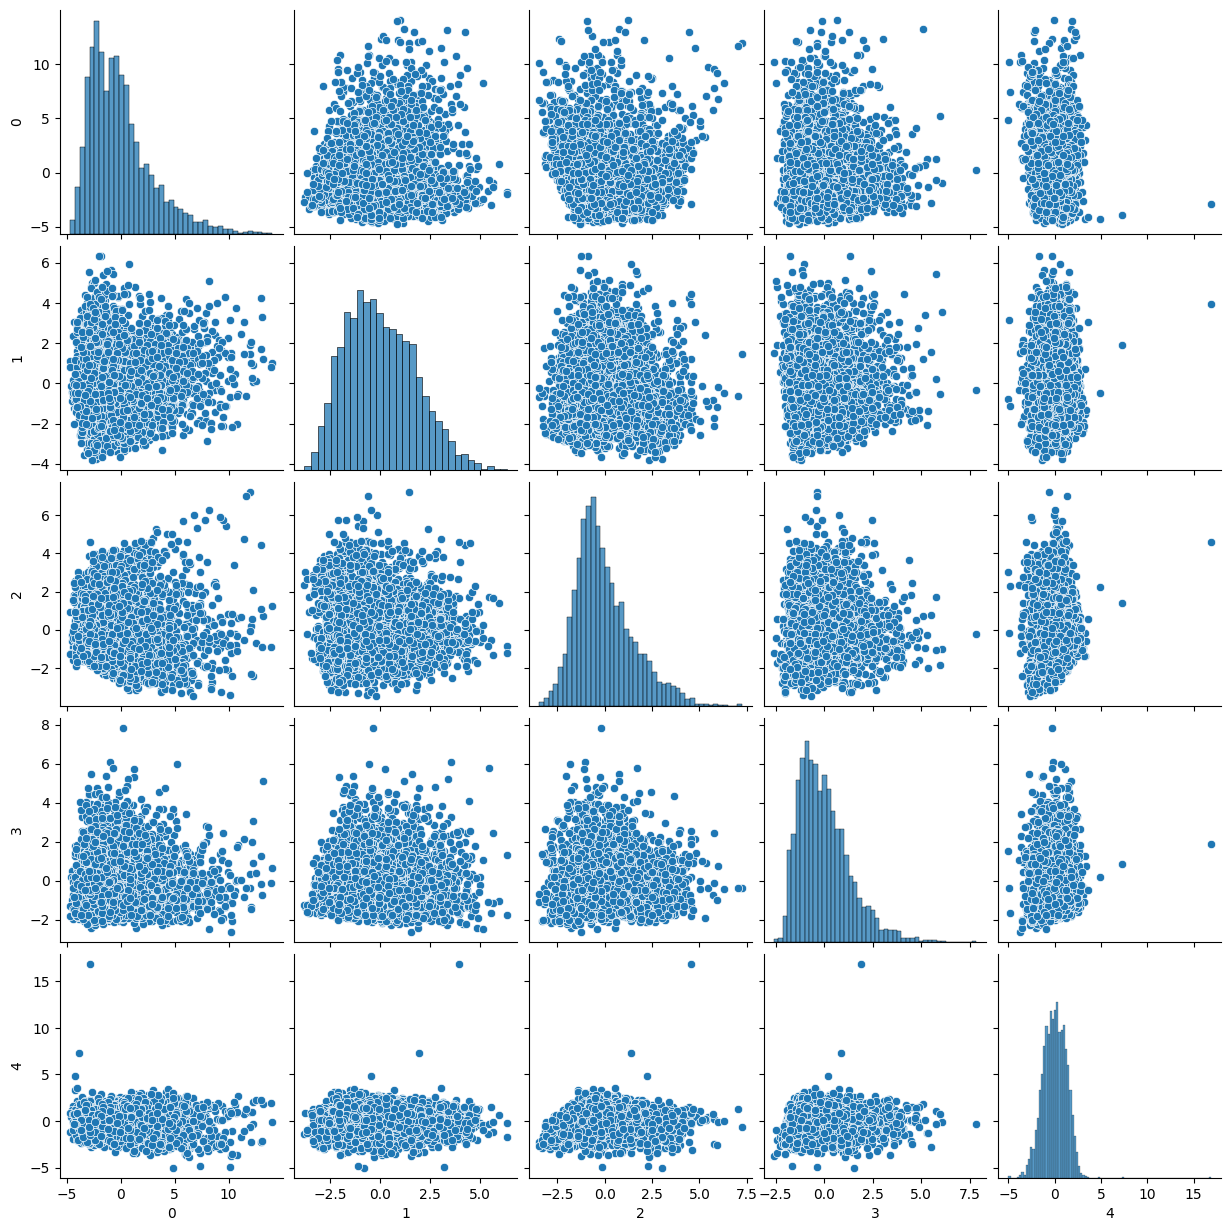

In [1489]:
sns.pairplot(pc_df.iloc[:,0:5])
plt.show()

In [1490]:
pca.explained_variance_ratio_.round(2)

array([0.44, 0.15, 0.12, 0.09, 0.08, 0.04, 0.03, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [1491]:
pca.explained_variance_ratio_.cumsum()

array([0.4361001 , 0.58690082, 0.70378118, 0.7900782 , 0.8720906 ,
       0.91284989, 0.94215593, 0.9570927 , 0.97054806, 0.97972331,
       0.98760819, 0.99330967, 0.99824853, 0.99909121, 0.99981879,
       0.99996408, 1.        , 1.        , 1.        , 1.        ])

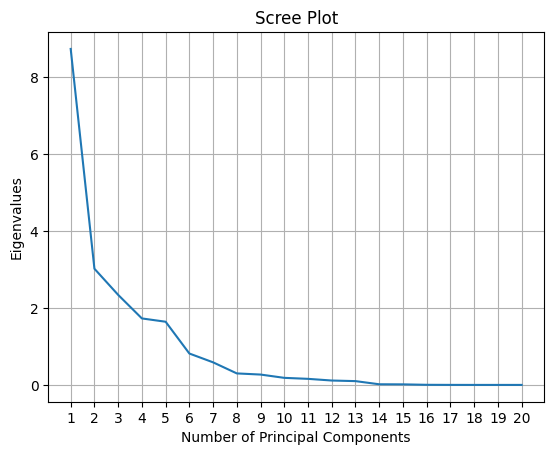

In [1492]:
plt.plot(np.arange(1, len(pca.explained_variance_) + 1), pca.explained_variance_)

plt.xlabel('Number of Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')

plt.xticks(np.arange(1, len(pca.explained_variance_) + 1))
plt.grid(True)

plt.show()

In [1493]:
pca.explained_variance_

array([8.72447500e+00, 3.01686937e+00, 2.33827014e+00, 1.72642972e+00,
       1.64071309e+00, 8.15416793e-01, 5.86286966e-01, 2.98820249e-01,
       2.69183396e-01, 1.83557004e-01, 1.57742314e-01, 1.14061943e-01,
       9.88051911e-02, 1.68584283e-02, 1.45556737e-02, 2.90673150e-03,
       7.18528832e-04, 6.88494887e-31, 8.77943012e-32, 3.18496041e-32])

In [1494]:
component_values = pca.components_.round(2)
component_values[0:6]

array([[ 0.31,  0.04, -0.17,  0.26,  0.32,  0.32,  0.32,  0.27,  0.04,
         0.3 ,  0.2 ,  0.01,  0.29,  0.3 , -0.03,  0.23, -0.04,  0.26,
         0.03,  0.02],
       [ 0.09,  0.45,  0.45,  0.15,  0.05, -0.11,  0.12, -0.14,  0.51,
        -0.02, -0.41,  0.06,  0.15, -0.02, -0.15,  0.16, -0.07, -0.03,
         0.13,  0.05],
       [ 0.04, -0.07,  0.06, -0.34,  0.13,  0.01,  0.09,  0.03,  0.08,
         0.04, -0.05, -0.01,  0.19,  0.05,  0.56,  0.22,  0.53, -0.34,
         0.22,  0.01],
       [-0.02, -0.1 , -0.09, -0.01,  0.01, -0.03, -0.  , -0.03, -0.1 ,
        -0.02, -0.05,  0.69,  0.04, -0.02, -0.05,  0.06, -0.02, -0.01,
         0.08,  0.69],
       [-0.18, -0.16, -0.07, -0.02,  0.14, -0.11, -0.07, -0.13, -0.21,
        -0.18,  0.06, -0.11,  0.22, -0.18, -0.19,  0.41, -0.25,  0.05,
         0.66, -0.12],
       [-0.2 , -0.2 ,  0.25, -0.15, -0.12, -0.16, -0.19,  0.42, -0.12,
         0.43, -0.31, -0.01,  0.12,  0.44, -0.07, -0.11, -0.2 , -0.08,
         0.13, -0.02]])

In [1495]:
for i in range(0,6): 
    print(f'PC {i+1} effects = ' + str(dict(zip(X_train_pca.columns, component_values[0:6][i]))))


PC 1 effects = {'National mins': 0.31, 'OffPeak_calls_Sum': 0.04, 'OffPeak ratio': -0.17, 'National_calls': 0.26, 'Total_Cost': 0.32, 'Peak_mins_Sum': 0.32, 'All_calls_mins': 0.32, 'Mins_charge': 0.27, 'OffPeak_mins_Sum': 0.04, 'Nat_call_cost_Sum': 0.3, 'Peak ratio': 0.2, 'Weekend_calls_Sum': 0.01, 'Total_call_cost': 0.29, 'actual call cost': 0.3, 'AveNational': -0.03, 'International_mins_Sum': 0.23, 'AvePeak': -0.04, 'Peak_calls_Sum': 0.26, 'Nat-InterNat Ratio': 0.03, 'Weekend_mins_Sum': 0.02}
PC 2 effects = {'National mins': 0.09, 'OffPeak_calls_Sum': 0.45, 'OffPeak ratio': 0.45, 'National_calls': 0.15, 'Total_Cost': 0.05, 'Peak_mins_Sum': -0.11, 'All_calls_mins': 0.12, 'Mins_charge': -0.14, 'OffPeak_mins_Sum': 0.51, 'Nat_call_cost_Sum': -0.02, 'Peak ratio': -0.41, 'Weekend_calls_Sum': 0.06, 'Total_call_cost': 0.15, 'actual call cost': -0.02, 'AveNational': -0.15, 'International_mins_Sum': 0.16, 'AvePeak': -0.07, 'Peak_calls_Sum': -0.03, 'Nat-InterNat Ratio': 0.13, 'Weekend_mins_Sum'

In [1496]:
PC_1 = {'National mins': 0.31, 'OffPeak_calls_Sum': 0.04, 'OffPeak ratio': -0.17, 'National_calls': 0.26, 'Total_Cost': 0.32, 'Peak_mins_Sum': 0.32, 'All_calls_mins': 0.32, 'Mins_charge': 0.27, 'OffPeak_mins_Sum': 0.04, 'Nat_call_cost_Sum': 0.3, 'Peak ratio': 0.2, 'Weekend_calls_Sum': 0.01, 'Total_call_cost': 0.29, 'actual call cost': 0.3, 'AveNational': -0.03, 'International_mins_Sum': 0.23, 'AvePeak': -0.04, 'Peak_calls_Sum': 0.26, 'Nat-InterNat Ratio': 0.03, 'Weekend_mins_Sum': 0.02}
PC_2 = {'National mins': 0.09, 'OffPeak_calls_Sum': 0.45, 'OffPeak ratio': 0.45, 'National_calls': 0.15, 'Total_Cost': 0.05, 'Peak_mins_Sum': -0.11, 'All_calls_mins': 0.12, 'Mins_charge': -0.14, 'OffPeak_mins_Sum': 0.51, 'Nat_call_cost_Sum': -0.02, 'Peak ratio': -0.41, 'Weekend_calls_Sum': 0.06, 'Total_call_cost': 0.15, 'actual call cost': -0.02, 'AveNational': -0.15, 'International_mins_Sum': 0.16, 'AvePeak': -0.07, 'Peak_calls_Sum': -0.03, 'Nat-InterNat Ratio': 0.13, 'Weekend_mins_Sum': 0.05}
PC_3 = {'National mins': 0.04, 'OffPeak_calls_Sum': -0.07, 'OffPeak ratio': 0.06, 'National_calls': -0.34, 'Total_Cost': 0.13, 'Peak_mins_Sum': 0.01, 'All_calls_mins': 0.09, 'Mins_charge': 0.03, 'OffPeak_mins_Sum': 0.08, 'Nat_call_cost_Sum': 0.04, 'Peak ratio': -0.05, 'Weekend_calls_Sum': -0.01, 'Total_call_cost': 0.19, 'actual call cost': 0.05, 'AveNational': 0.56, 'International_mins_Sum': 0.22, 'AvePeak': 0.53, 'Peak_calls_Sum': -0.34, 'Nat-InterNat Ratio': 0.22, 'Weekend_mins_Sum': 0.01}
PC_4 = {'National mins': -0.02, 'OffPeak_calls_Sum': -0.1, 'OffPeak ratio': -0.09, 'National_calls': -0.01, 'Total_Cost': 0.01, 'Peak_mins_Sum': -0.03, 'All_calls_mins': -0.0, 'Mins_charge': -0.03, 'OffPeak_mins_Sum': -0.1, 'Nat_call_cost_Sum': -0.02, 'Peak ratio': -0.05, 'Weekend_calls_Sum': 0.69, 'Total_call_cost': 0.04, 'actual call cost': -0.02, 'AveNational': -0.05, 'International_mins_Sum': 0.06, 'AvePeak': -0.02, 'Peak_calls_Sum': -0.01, 'Nat-InterNat Ratio': 0.08, 'Weekend_mins_Sum': 0.69}
PC_5 = {'National mins': -0.18, 'OffPeak_calls_Sum': -0.16, 'OffPeak ratio': -0.07, 'National_calls': -0.02, 'Total_Cost': 0.14, 'Peak_mins_Sum': -0.11, 'All_calls_mins': -0.07, 'Mins_charge': -0.13, 'OffPeak_mins_Sum': -0.21, 'Nat_call_cost_Sum': -0.18, 'Peak ratio': 0.06, 'Weekend_calls_Sum': -0.11, 'Total_call_cost': 0.22, 'actual call cost': -0.18, 'AveNational': -0.19, 'International_mins_Sum': 0.41, 'AvePeak': -0.25, 'Peak_calls_Sum': 0.05, 'Nat-InterNat Ratio': 0.66, 'Weekend_mins_Sum': -0.12}
PC_6 = {'National mins': -0.2, 'OffPeak_calls_Sum': -0.2, 'OffPeak ratio': 0.25, 'National_calls': -0.15, 'Total_Cost': -0.12, 'Peak_mins_Sum': -0.16, 'All_calls_mins': -0.19, 'Mins_charge': 0.42, 'OffPeak_mins_Sum': -0.12, 'Nat_call_cost_Sum': 0.43, 'Peak ratio': -0.31, 'Weekend_calls_Sum': -0.01, 'Total_call_cost': 0.12, 'actual call cost': 0.44, 'AveNational': -0.07, 'International_mins_Sum': -0.11, 'AvePeak': -0.2, 'Peak_calls_Sum': -0.08, 'Nat-InterNat Ratio': 0.13, 'Weekend_mins_Sum': -0.02}

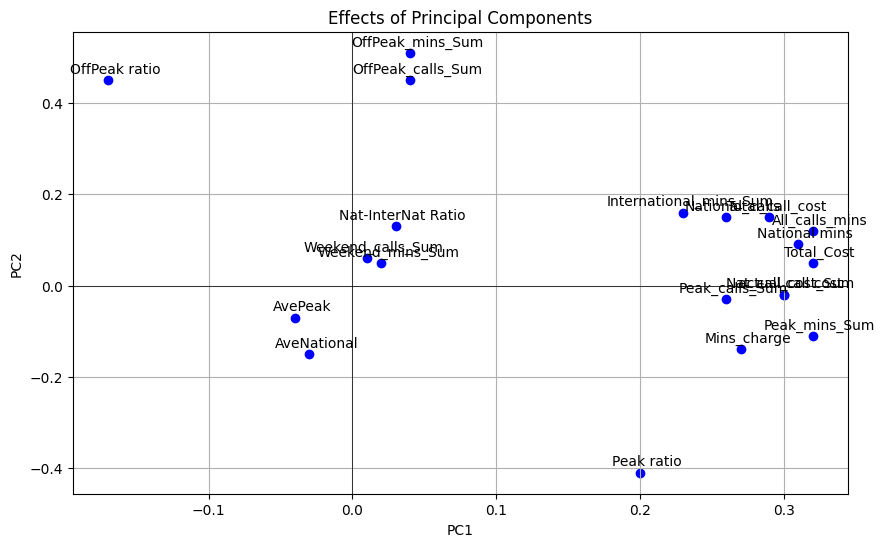

In [1497]:



# Extract keys and values from the dictionaries
PC1_keys = list(PC_1.keys())
PC1_values = list(PC_1.values())

PC2_keys = list(PC_2.keys())
PC2_values = list(PC_2.values())

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(PC1_values, PC2_values, color='blue')

# Add labels to each point
for i, txt in enumerate(PC1_keys):
    plt.annotate(txt, (PC1_values[i], PC2_values[i]), textcoords="offset points", xytext=(5,5), ha='center')

# Set plot title and labels
plt.title('Effects of Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

In [1498]:
dict_list = [PC_1, PC_2, PC_3, PC_4, PC_5, PC_6]

# Create a DataFrame
df = pd.DataFrame(dict_list)

# Transpose the DataFrame
df = df.transpose()

# Set column names
df.columns = ['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6']

print(df)

                        PC_1  PC_2  PC_3  PC_4  PC_5  PC_6
National mins           0.31  0.09  0.04 -0.02 -0.18 -0.20
OffPeak_calls_Sum       0.04  0.45 -0.07 -0.10 -0.16 -0.20
OffPeak ratio          -0.17  0.45  0.06 -0.09 -0.07  0.25
National_calls          0.26  0.15 -0.34 -0.01 -0.02 -0.15
Total_Cost              0.32  0.05  0.13  0.01  0.14 -0.12
Peak_mins_Sum           0.32 -0.11  0.01 -0.03 -0.11 -0.16
All_calls_mins          0.32  0.12  0.09 -0.00 -0.07 -0.19
Mins_charge             0.27 -0.14  0.03 -0.03 -0.13  0.42
OffPeak_mins_Sum        0.04  0.51  0.08 -0.10 -0.21 -0.12
Nat_call_cost_Sum       0.30 -0.02  0.04 -0.02 -0.18  0.43
Peak ratio              0.20 -0.41 -0.05 -0.05  0.06 -0.31
Weekend_calls_Sum       0.01  0.06 -0.01  0.69 -0.11 -0.01
Total_call_cost         0.29  0.15  0.19  0.04  0.22  0.12
actual call cost        0.30 -0.02  0.05 -0.02 -0.18  0.44
AveNational            -0.03 -0.15  0.56 -0.05 -0.19 -0.07
International_mins_Sum  0.23  0.16  0.22  0.06  0.41 -0.

In [1499]:
X_train_l1.head()
#print(X_train_l1.shape)

,Gender,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat,above_11_dropped_calls
1115,0,-0.884637,0.037053,2.425415,-0.194387,0.037910,-1.011485,-1.168729,-0.755676,-0.605009,-1.176352,0.430672,-0.264151,2.343323,0.732354,-0.601526,-0.434760,0.143954,-0.632794,1.026816,0.340553,1.720226,0.435462,-0.685446,-0.591900,0.068315,1.176452,-1.123229,-0.433652,-1.502880,0,1,2.191954,0.034227,0.262926,0
4207,0,1.281488,-1.382726,-0.775697,2.846226,2.607052,-0.314667,-0.951371,0.598886,-0.092519,2.799904,2.697246,-0.639170,-0.765060,-0.679289,2.545036,2.059412,-0.746408,2.381539,-0.387326,1.932879,-0.236254,2.703295,3.175522,2.775465,-0.267632,1.403616,-1.307317,-0.624349,0.900485,0,1,0.087330,0.034227,0.021290,0
202,0,-0.265744,1.680381,-0.484687,-0.380042,-0.643409,-1.062722,-1.557293,3.923719,2.118985,-0.307133,-0.684944,-0.546411,-1.174113,-0.734792,-0.502601,-1.030446,-0.708651,-0.948608,-0.273493,-2.834321,4.365559,-0.680774,-0.385792,-0.699338,0.979582,0.636542,-1.571779,2.909171,0.819740,0,1,2.191954,0.538037,0.262926,0
2074,0,-0.033659,0.358108,0.388343,2.297513,1.394635,-0.365904,-0.592582,-0.940389,-0.217856,1.544941,0.785446,-0.735424,-0.474958,2.339436,1.924855,1.059844,-0.849167,1.248730,-0.267834,0.794493,-0.394768,0.790434,1.398081,1.475315,-0.249119,1.107237,-1.010936,-0.558829,0.689933,0,1,2.191954,0.034227,0.021290,0
4857,0,-0.420468,1.528177,-0.775697,1.266098,1.031501,-0.632334,-1.226790,-1.001960,-1.373743,1.481113,-0.345301,-0.623338,-0.786310,-1.166063,0.870928,0.414106,-0.716787,0.682857,-0.387326,0.059077,-0.176400,-0.354303,0.818680,1.051499,0.027912,1.515526,-1.327180,-0.949263,1.230206,0,1,0.087330,0.034227,0.021290,0


In [1500]:
pca_X_train_6 = pc_df.iloc[:,0:6]
pca_X_test_6 = pc_test_df.iloc[:,0:6]


In [1501]:
pca_X_train_6.index
pca_X_train_6.columns = ["PC_1","PC_2","PC_3","PC_4","PC_5","PC_6"]
pca_X_test_6.columns = ["PC_1","PC_2","PC_3","PC_4","PC_5","PC_6"]

In [1502]:
X_train_after_pca = X_train_l1.drop(['National mins', 'OffPeak_calls_Sum', 'OffPeak ratio', 'National_calls', 'Total_Cost', 'Peak_mins_Sum', 'All_calls_mins', 'Mins_charge', 'OffPeak_mins_Sum', 'Nat_call_cost_Sum', 'Peak ratio', 'Weekend_calls_Sum', 'Total_call_cost', 'actual call cost', 'AveNational', 'International_mins_Sum', 'AvePeak', 'Peak_calls_Sum', 'Nat-InterNat Ratio', 'Weekend_mins_Sum'],axis=1)
X_test_after_pca = X_test_l1.drop(['National mins', 'OffPeak_calls_Sum', 'OffPeak ratio', 'National_calls', 'Total_Cost', 'Peak_mins_Sum', 'All_calls_mins', 'Mins_charge', 'OffPeak_mins_Sum', 'Nat_call_cost_Sum', 'Peak ratio', 'Weekend_calls_Sum', 'Total_call_cost', 'actual call cost', 'AveNational', 'International_mins_Sum', 'AvePeak', 'Peak_calls_Sum', 'Nat-InterNat Ratio', 'Weekend_mins_Sum'],axis=1)

In [1503]:
X_train_after_pca.shape

(3528, 16)

In [1504]:
X_test_after_pca.shape

(1512, 16)

In [1505]:
X_train_after_pca.reset_index(drop=True,inplace=True)
X_test_after_pca.reset_index(drop=True,inplace=True)

In [1506]:
X_train_after_pca.index

RangeIndex(start=0, stop=3528, step=1)

In [1507]:
X_test_after_pca.index

RangeIndex(start=0, stop=1512, step=1)

In [1508]:
X_train_after_pca = pd.merge(X_train_after_pca, pca_X_train_6, left_index=True, right_index=True, how='outer')
X_train_after_pca.head()



,Gender,Age,L_O_S,Dropped_Calls,AveOffPeak,AveWeekend,Dropped_calls_ratio,call_cost_per_min,average cost min,Weekend ratio,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat,above_11_dropped_calls,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
0,0,-0.884637,0.037053,2.425415,2.343323,0.732354,1.026816,1.720226,0.068315,-0.433652,0,1,2.191954,0.034227,0.262926,0,-0.559125,-2.879815,-0.744405,-0.921374,-1.044158,0.508655
1,0,1.281488,-1.382726,-0.775697,-0.765060,-0.679289,-0.387326,-0.236254,-0.267632,-0.624349,0,1,0.087330,0.034227,0.021290,0,8.744682,-0.324365,-0.385214,0.580891,1.525453,0.725880
2,0,-0.265744,1.680381,-0.484687,-1.174113,-0.734792,-0.273493,4.365559,0.979582,2.909171,0,1,2.191954,0.538037,0.262926,0,-2.201793,-1.555740,-0.917305,4.776533,1.370149,-1.094684
3,0,-0.033659,0.358108,0.388343,-0.474958,2.339436,-0.267834,-0.394768,-0.249119,-0.558829,0,1,2.191954,0.034227,0.021290,0,4.616647,-0.476042,-1.203975,-0.578814,1.635647,-0.444932
4,0,-0.420468,1.528177,-0.775697,-0.786310,-1.166063,-0.387326,-0.176400,0.027912,-0.949263,0,1,0.087330,0.034227,0.021290,0,2.481571,-1.427856,-0.705105,-1.191232,2.762207,-1.221081


In [1509]:
X_test_after_pca = pd.merge(X_test_after_pca, pca_X_test_6, left_index=True, right_index=True, how='outer')
X_test_after_pca.head()


,Gender,Age,L_O_S,Dropped_Calls,AveOffPeak,AveWeekend,Dropped_calls_ratio,call_cost_per_min,average cost min,Weekend ratio,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat,above_11_dropped_calls,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
0,0,2.287190,1.254685,0.097333,-0.656821,-0.689166,-0.213513,-0.618822,-0.586380,-0.785224,0,1,0.087330,0.034227,0.021290,0,1.441683,-0.227404,-0.391345,-1.097182,-0.377668,-0.622084
1,0,-1.039361,-0.940383,-0.193677,0.326264,0.303147,0.258680,-0.546016,-0.651350,0.022347,0,1,2.191954,0.034227,0.021290,0,1.963605,-1.768720,3.844386,1.122972,-1.890739,-0.361330
2,1,-0.652552,1.230904,0.097333,0.155144,-0.716679,-0.280988,-0.307399,-0.253319,-0.143180,0,1,0.087330,0.034227,0.021290,0,4.758012,-0.998674,-0.636441,2.682432,1.200038,-0.230860
3,0,0.817319,-1.363701,2.134404,-0.082929,-0.743892,0.776649,0.064304,0.650322,1.085375,0,1,2.191954,0.034227,0.262926,0,-1.168481,-0.003268,0.029724,2.971341,0.490780,0.675109
4,0,2.132466,-0.174606,-0.193677,-0.532558,-0.285637,-0.249878,-0.442981,-1.672167,-0.168892,0,1,2.191954,0.538037,0.021290,0,-1.727775,3.517696,0.328461,-0.092019,-1.661921,-1.211763


In [1510]:
train.shape

(3528, 39)

In [1511]:
test.shape

(1512, 39)

In [1512]:
X_train_after_pca.isna().sum()

Gender                    0
Age                       0
L_O_S                     0
Dropped_Calls             0
AveOffPeak                0
AveWeekend                0
Dropped_calls_ratio       0
call_cost_per_min         0
average cost min          0
Weekend ratio             0
High_Dropped_calls        0
Tariff_OK_cat             0
woe_handset_cat           0
woe_tariff_cat            0
woe_usage_cat             0
above_11_dropped_calls    0
PC_1                      0
PC_2                      0
PC_3                      0
PC_4                      0
PC_5                      0
PC_6                      0
dtype: int64

In [1513]:
X_test_after_pca.isna().sum()

Gender                    0
Age                       0
L_O_S                     0
Dropped_Calls             0
AveOffPeak                0
AveWeekend                0
Dropped_calls_ratio       0
call_cost_per_min         0
average cost min          0
Weekend ratio             0
High_Dropped_calls        0
Tariff_OK_cat             0
woe_handset_cat           0
woe_tariff_cat            0
woe_usage_cat             0
above_11_dropped_calls    0
PC_1                      0
PC_2                      0
PC_3                      0
PC_4                      0
PC_5                      0
PC_6                      0
dtype: int64

In [1514]:
X_train_after_pca.head()

,Gender,Age,L_O_S,Dropped_Calls,AveOffPeak,AveWeekend,Dropped_calls_ratio,call_cost_per_min,average cost min,Weekend ratio,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat,above_11_dropped_calls,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
0,0,-0.884637,0.037053,2.425415,2.343323,0.732354,1.026816,1.720226,0.068315,-0.433652,0,1,2.191954,0.034227,0.262926,0,-0.559125,-2.879815,-0.744405,-0.921374,-1.044158,0.508655
1,0,1.281488,-1.382726,-0.775697,-0.765060,-0.679289,-0.387326,-0.236254,-0.267632,-0.624349,0,1,0.087330,0.034227,0.021290,0,8.744682,-0.324365,-0.385214,0.580891,1.525453,0.725880
2,0,-0.265744,1.680381,-0.484687,-1.174113,-0.734792,-0.273493,4.365559,0.979582,2.909171,0,1,2.191954,0.538037,0.262926,0,-2.201793,-1.555740,-0.917305,4.776533,1.370149,-1.094684
3,0,-0.033659,0.358108,0.388343,-0.474958,2.339436,-0.267834,-0.394768,-0.249119,-0.558829,0,1,2.191954,0.034227,0.021290,0,4.616647,-0.476042,-1.203975,-0.578814,1.635647,-0.444932
4,0,-0.420468,1.528177,-0.775697,-0.786310,-1.166063,-0.387326,-0.176400,0.027912,-0.949263,0,1,0.087330,0.034227,0.021290,0,2.481571,-1.427856,-0.705105,-1.191232,2.762207,-1.221081


In [1515]:
y_train_l1.shape

(3528,)

In [1516]:
y_test_l1.shape

(1512,)

# Logistic Regression with Lasso Regularization 
- Fix Class Imbalance using SMOTE
- Feature Importance 

In [1517]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


In [1518]:
train.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,id,target,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat,above_11_dropped_calls
1115,0,20.0,1997-12-22,34.166667,11.0,192.0,724.200001,5.0,78.300000,4.0,27.6,2.424408,31.579499,3.771875,14.382699,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,230.100001,13.724250,31.579500,32.306822,137.306822,0.164928,0.872425,0.094326,0.033249,0.002921,K301840,0,0,1,2.191954,0.034227,0.262926,0
4207,0,48.0,1999-11-08,14.266667,0.0,929.0,2027.400000,73.0,122.100000,26.0,46.0,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,995.500000,9.617171,95.738942,266.281994,416.281994,0.150610,0.923434,0.055614,0.020952,0.258928,K116920,0,0,1,0.087330,0.034227,0.021290,0
202,0,28.0,1996-01-31,57.200000,1.0,147.0,378.600000,0.0,0.000000,80.0,125.4,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,-1296.000000,19.277381,0.000000,50.465922,128.405922,0.203766,0.751190,0.000000,0.248810,0.250327,K276340,0,0,1,2.191954,0.538037,0.262926,0
2074,0,31.0,1997-09-08,38.666667,4.0,796.0,1412.400000,68.0,194.400000,1.0,41.5,389.822673,41.622028,1.774372,2.858824,12.741109,865.0,1648.300000,1.905549,2038.122673,0.002312,448.300000,9.284414,41.622029,158.568831,308.568831,0.151399,0.856883,0.117940,0.025177,0.236500,K116850,0,0,1,2.191954,0.034227,0.021290,0
4857,0,26.0,1996-04-04,55.066667,0.0,546.0,1228.200000,42.0,66.600001,0.0,0.0,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,94.800001,9.742817,9.236191,123.457050,273.457050,0.163206,0.948563,0.051437,0.000000,0.294050,K115360,0,0,1,0.087330,0.034227,0.021290,0


## Split train and test set into x_train, y_train, x_test, y_test
- Drop Connect Date, id, woe_age

## Standardize variables except dummies and woe columns 

## Deal with Imbalance by using SMOTE method to increase churners (target=1) rows 

In [1519]:
from collections import Counter
smt = SMOTE(random_state=34)
X_train_after_pca_smote, y_train_l1_smote = smt.fit_resample(X_train_after_pca,y_train_l1)


In [1520]:
Counter(y_train_l1)

Counter({0: 3008, 1: 520})

In [1521]:
Counter(y_train_l1_smote)

Counter({0: 3008, 1: 3008})

In [1522]:
X_train_after_pca_smote.shape

(6016, 22)

In [1523]:
X_train_after_pca.shape

(3528, 22)

## Fit a Logistic Regression with l1 penalty (Lasso Regularization)

In [1524]:
# Specify L1 regularization
#liblinear is the optimization method used to estimate the coefficients. liblinear is need for l1
lr = LogisticRegression(solver='liblinear', penalty="l1",random_state=345) 

# Instantiate the GridSearchCV object and run the search
# The GridSeachCV object, when fitted on the data, creates 5-fold splits for every C value and calculates a default scoring metric
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]})
searcher.fit(X_train_after_pca_smote.drop(['AveWeekend', 'Weekend ratio', 'PC_1','above_11_dropped_calls', 'PC_4'],axis=1), y_train_l1_smote)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
# best_estimator_ gives the model with the optimized C value according to the grid search
best_lr = searcher.best_estimator_
best_lr.fit(X_train_after_pca_smote.drop(['AveWeekend', 'Weekend ratio', 'PC_1','above_11_dropped_calls', 'PC_4'],axis=1),y_train_l1_smote)
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 10}
Total number of features: 17
Number of selected features: 17


In [1525]:
best_lr.coef_

array([[-0.74508351, -0.44962248, -0.22742261,  0.27645171,  0.12806791,
        -0.08190681,  0.27181982, -0.37856335,  2.192904  , -6.07545289,
        -1.34843454, -2.73073814, -1.61139246,  0.16658864,  0.13615474,
         0.21044629, -0.22328706]])

### Identify the variables with coef=0, thus with no importance in explaining the target

In [1526]:
# Get the coefficients from the best estimator
coefs = best_lr.coef_

# Get the feature names from your DataFrame (assuming you have access to it)
feature_names = X_train_after_pca_smote.drop(['AveWeekend', 'Weekend ratio', 'PC_1','above_11_dropped_calls', 'PC_4'],axis=1).columns

# Find the indices of coefficients that are exactly zero
zero_coef_indices = np.where(abs(coefs) < 0.04)[1]

# Get the names of features where the coefficient became 0
features_with_zero_coef = [feature_names[i] for i in zero_coef_indices]

print("Features with coefficients equal to 0:", features_with_zero_coef)

Features with coefficients equal to 0: []


In [1527]:
features_with_zero_coef

[]

In [1528]:
# Predict probabilities
y_pred_probs = best_lr.predict_proba(X_test_after_pca.drop(['AveWeekend', 'Weekend ratio', 'PC_1','above_11_dropped_calls', 'PC_4'],axis=1))[:,1]

print(y_pred_probs)

[0.15229662 0.07140652 0.27215619 ... 0.03884837 0.01622074 0.03613996]


In [1529]:
y_pred = best_lr.predict(X_test_after_pca.drop(['AveWeekend', 'Weekend ratio', 'PC_1','above_11_dropped_calls', 'PC_4'],axis=1))

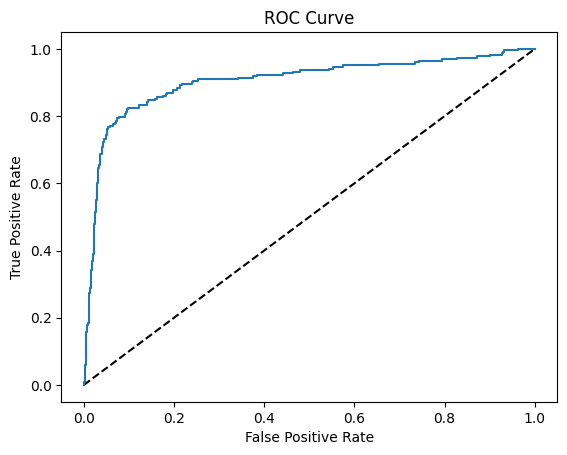

0.9035613521797062
[[1193   96]
 [  46  177]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1289
           1       0.65      0.79      0.71       223

    accuracy                           0.91      1512
   macro avg       0.81      0.86      0.83      1512
weighted avg       0.92      0.91      0.91      1512



In [1530]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_l1, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_test_l1, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test_l1, y_pred))

# Calculate the classification report
print(classification_report(y_test_l1, y_pred))

In [1531]:
#Train your model using your training data.
#Predict probabilities of churn for your test data
#Rank the customers in the test set based on their predicted probabilities of churn.
#Select the top 20 customers according to this ranking.
#Calculate the sum of the "average cost min" for these top 20 customers.
#This sum would be your "profit @ top-20" metric.


def profit_metric(prob_array, dataset):
    X_test_profit = pd.DataFrame(dataset["average cost min"])
    X_test_profit.loc[:,"churn_prob"] = prob_array
    X_test_profit = X_test_profit.sort_values(by='churn_prob', ascending=False)
    return X_test_profit["average cost min"][:20].sum()
    #print(X_test_profit.head())


In [1532]:
profit_metric(y_pred_probs,X_test)

4.292744

## SHAP Values for Logistic with Lasso Regularization with C=10

# Forward Feature Selection using AUC and Profit Metric 
- Model used: Logistic Regression with C=10 Regularization Parameter (C was optimized in the previous Gridsearch)

In [1533]:
def auc(variables, X_dataset, y_dataset):
        logreg = LogisticRegression(random_state=345, max_iter=1000, C=100)
        logreg.fit(X_dataset[variables], y_dataset)
        predictions = logreg.predict_proba(X_dataset[variables])[:, 1]
        auc_score = roc_auc_score(y_dataset, predictions)
        return (auc_score)

In [1534]:
# Add profit netric as a condition in this function 
def next_best(current_variables,candidate_variables,X_dataset,y_dataset):
    best_auc = -1
    #metric = auc(candidate_variables[0],X_dataset,y_dataset)[1]
    best_variable = None
    for v in candidate_variables:
        auc_v = auc(current_variables + [v], X_dataset, y_dataset)
        #if auc_v >= best_auc and metric_prof >= metric:
        if auc_v >= best_auc:
            best_auc = auc_v 
            #metric = metric_prof
            best_variable = v
    return best_variable

In [1535]:
candidate_variables = list(X_train_after_pca_smote.columns.values)
#candidate_variables.remove("target")
print(len(candidate_variables))


22


In [1536]:
current_variables = []

number_iterations = len(candidate_variables)
for i in range(0, number_iterations):
    next_variable = next_best(current_variables,candidate_variables,X_train_after_pca_smote, y_train_l1_smote)
    current_variables = current_variables + [next_variable]
    #print(candidate_variables)
    candidate_variables.remove(next_variable)
    print("Variable added in step " + str(i+1)  + " is " + next_variable + ".")
print(current_variables)

Variable added in step 1 is woe_handset_cat.
Variable added in step 2 is woe_tariff_cat.
Variable added in step 3 is Tariff_OK_cat.
Variable added in step 4 is Gender.
Variable added in step 5 is High_Dropped_calls.
Variable added in step 6 is Age.
Variable added in step 7 is L_O_S.
Variable added in step 8 is PC_3.
Variable added in step 9 is Dropped_Calls.
Variable added in step 10 is PC_2.
Variable added in step 11 is PC_5.
Variable added in step 12 is woe_usage_cat.
Variable added in step 13 is average cost min.
Variable added in step 14 is call_cost_per_min.
Variable added in step 15 is AveOffPeak.
Variable added in step 16 is PC_6.
Variable added in step 17 is Dropped_calls_ratio.
Variable added in step 18 is PC_4.
Variable added in step 19 is AveWeekend.
Variable added in step 20 is Weekend ratio.
Variable added in step 21 is above_11_dropped_calls.
Variable added in step 22 is PC_1.
['woe_handset_cat', 'woe_tariff_cat', 'Tariff_OK_cat', 'Gender', 'High_Dropped_calls', 'Age', 'L

In [1537]:
def auc_train_test(variables, X_dataset_train, y_dataset_train, X_dataset_test, y_dataset_test):
        logreg = LogisticRegression(random_state=345, max_iter=1000, C=100)
        logreg.fit(X_dataset_train[variables], y_dataset_train)
        predictions = logreg.predict_proba(X_dataset_train[variables])[:, 1]
        #accuracy_train = accuracy_score(y_dataset_train, logreg.predict(X_dataset_train[variables]))
        #accuracy_test = accuracy_score(y_dataset_test, logreg.predict(X_dataset_test[variables]))
        auc_score = roc_auc_score(y_dataset_train, predictions)
        auc_score_test = roc_auc_score(y_dataset_test, logreg.predict_proba(X_dataset_test[variables])[:, 1] )
        metric = profit_metric(logreg.predict_proba(X_dataset_test[variables])[:, 1], X_test)
        return (auc_score, auc_score_test, metric)
        #return (accuracy_train, accuracy_test)

In [1538]:
X_test.shape

(1512, 38)

In [1539]:
def auc_train_test_acc(variables, X_dataset_train, y_dataset_train, X_dataset_test, y_dataset_test):
        logreg = LogisticRegression(random_state=345, max_iter=1000, C=100)
        logreg.fit(X_dataset_train[variables], y_dataset_train)
       # predictions = logreg.predict_proba(X_dataset_train[variables])[:, 1]
        accuracy_train = accuracy_score(y_dataset_train, logreg.predict(X_dataset_train[variables]))
        accuracy_test = accuracy_score(y_dataset_test, logreg.predict(X_dataset_test[variables]))
        #auc_score = roc_auc_score(y_dataset_train, predictions)
        #auc_score_test = roc_auc_score(y_dataset_test, logreg.predict_proba(X_dataset_test[variables])[:, 1] )
       # metric = profit_metric(logreg.predict_proba(X_dataset_test[variables])[:, 1], X_dataset_test)
        #return (auc_score, auc_score_test, metric)
        return (accuracy_train, accuracy_test)

In [1540]:
def auc_train_test_prec(variables, X_dataset_train, y_dataset_train, X_dataset_test, y_dataset_test):
        logreg = LogisticRegression(random_state=345, max_iter=1000, C=100)
        logreg.fit(X_dataset_train[variables], y_dataset_train)
       # predictions = logreg.predict_proba(X_dataset_train[variables])[:, 1]
        precision_train = precision_score(y_dataset_train, logreg.predict(X_dataset_train[variables]))
        precision_test = precision_score(y_dataset_test, logreg.predict(X_dataset_test[variables]))
        #auc_score = roc_auc_score(y_dataset_train, predictions)
        #auc_score_test = roc_auc_score(y_dataset_test, logreg.predict_proba(X_dataset_test[variables])[:, 1] )
       # metric = profit_metric(logreg.predict_proba(X_dataset_test[variables])[:, 1], X_dataset_test)
        #return (auc_score, auc_score_test, metric)
        return (precision_train, precision_test)

In [1541]:
def profit_metric(prob_array, dataset):
    X_test_profit = pd.DataFrame(dataset["average cost min"])
    X_test_profit.loc[:,"churn_prob"] = prob_array
    X_test_profit = X_test_profit.sort_values(by='churn_prob', ascending=False)
    return X_test_profit["average cost min"][:20].sum()

In [1542]:
# Keep track of train and test AUC values
auc_values_train = []
auc_values_test = []
metric_prof = []
#accuracy_values_train = []
#accuracy_values_test = []
variables_evaluate = []

# Iterate over the variables in variables
for v in current_variables:
  
    # Add the variable
    variables_evaluate.append(v)
    
    # Calculate the train and test AUC of this set of variables
    auc_score, auc_score_test, prof = auc_train_test(variables_evaluate, X_train_after_pca_smote, y_train_l1_smote, X_test_after_pca, y_test_l1)
    #accuracy_train, accuracy_test = auc_train_test(variables_evaluate, X_train_l1_smote, y_train_l1_smote, X_test_l1, y_test_l1)
    
    # Append the values to the lists
    auc_values_train.append(auc_score)
    auc_values_test.append(auc_score_test)
    metric_prof.append(prof)
    #accuracy_values_train.append(accuracy_train)
    #accuracy_values_test.append(accuracy_test)


In [1543]:
# Keep track of train and test AUC values
#auc_values_train = []
#auc_values_test = []
#metric_prof = []
accuracy_values_train = []
accuracy_values_test = []
variables_evaluate_acc = []

# Iterate over the variables in variables
for v in current_variables:
  
    # Add the variable
    variables_evaluate_acc.append(v)
    
    # Calculate the train and test AUC of this set of variables
    #auc_score, auc_score_test, prof = auc_train_test(variables_evaluate, X_train_l1_smote, y_train_l1_smote, X_test_l1, y_test_l1)
    accuracy_train, accuracy_test = auc_train_test_acc(variables_evaluate_acc, X_train_after_pca_smote, y_train_l1_smote, X_test_after_pca, y_test_l1)
    
    # Append the values to the lists
    #auc_values_train.append(auc_score)
    #auc_values_test.append(auc_score_test)
    #metric_prof.append(prof)
    accuracy_values_train.append(accuracy_train)
    accuracy_values_test.append(accuracy_test)


In [1544]:
# Keep track of train and test AUC values
#auc_values_train = []
#auc_values_test = []
#metric_prof = []
precision_values_train = []
precision_values_test = []
variables_evaluate_prec = []

# Iterate over the variables in variables
for v in current_variables:
  
    # Add the variable
    variables_evaluate_prec.append(v)
    
    # Calculate the train and test AUC of this set of variables
    #auc_score, auc_score_test, prof = auc_train_test(variables_evaluate, X_train_l1_smote, y_train_l1_smote, X_test_l1, y_test_l1)
    precision_train, precision_test = auc_train_test_prec(variables_evaluate_prec, X_train_after_pca_smote, y_train_l1_smote, X_test_after_pca, y_test_l1)
    
    # Append the values to the lists
    #auc_values_train.append(auc_score)
    #auc_values_test.append(auc_score_test)
    #metric_prof.append(prof)
    precision_values_train.append(precision_train)
    precision_values_test.append(precision_test)

In [1545]:
accuracy_values_train

[0.7845744680851063,
 0.8565492021276596,
 0.8723404255319149,
 0.8730053191489362,
 0.8902925531914894,
 0.8949468085106383,
 0.8881316489361702,
 0.890126329787234,
 0.8919547872340425,
 0.8926196808510638,
 0.8991023936170213,
 0.8944481382978723,
 0.894780585106383,
 0.8982712765957447,
 0.8976063829787234,
 0.8961103723404256,
 0.8967752659574468,
 0.8971077127659575,
 0.8964428191489362,
 0.8959441489361702,
 0.8962765957446809,
 0.8964428191489362]

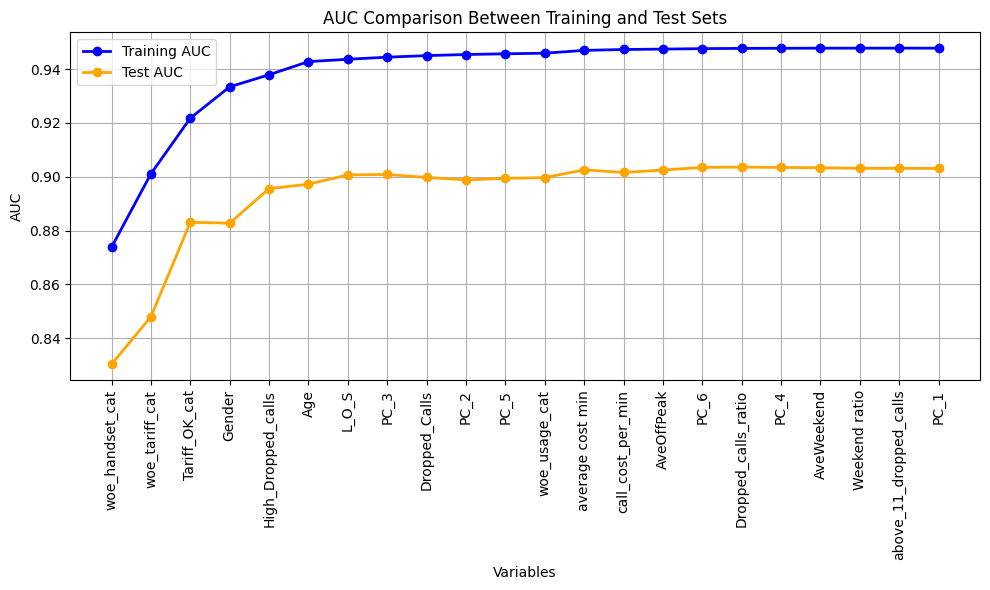

In [1546]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have lists auc_values_train and auc_values_test containing AUC values
# Assuming you also have a list current_variables containing the names of the variables

x = np.arange(len(current_variables))  # Creating x-axis ticks for each variable
y_train = np.array(auc_values_train)    # AUC values for the training set
y_test = np.array(auc_values_test)
#profits = np.array(metric_prof)      # AUC values for the test set
#y_train = np.array(accuracy_values_train)    # AUC values for the training set
#y_test = np.array(accuracy_values_test)   

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plotting AUC values for training and test sets with adjusted line styles and widths
plt.plot(x, y_train, marker='o', linestyle='-', linewidth=2, label='Training AUC', color='blue')
plt.plot(x, y_test, marker='o', linestyle='-', linewidth=2, label='Test AUC', color='orange')
#plt.plot(x, metric_prof, marker='o', linestyle='-', linewidth=2, label='Metric', color='green')

# Setting x-axis ticks and labels
plt.xticks(x, current_variables, rotation=90)

# Setting y-axis limits
#plt.ylim((0, 1))

# Adding labels and legend
plt.xlabel('Variables')
plt.ylabel('AUC')
plt.title('AUC Comparison Between Training and Test Sets')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

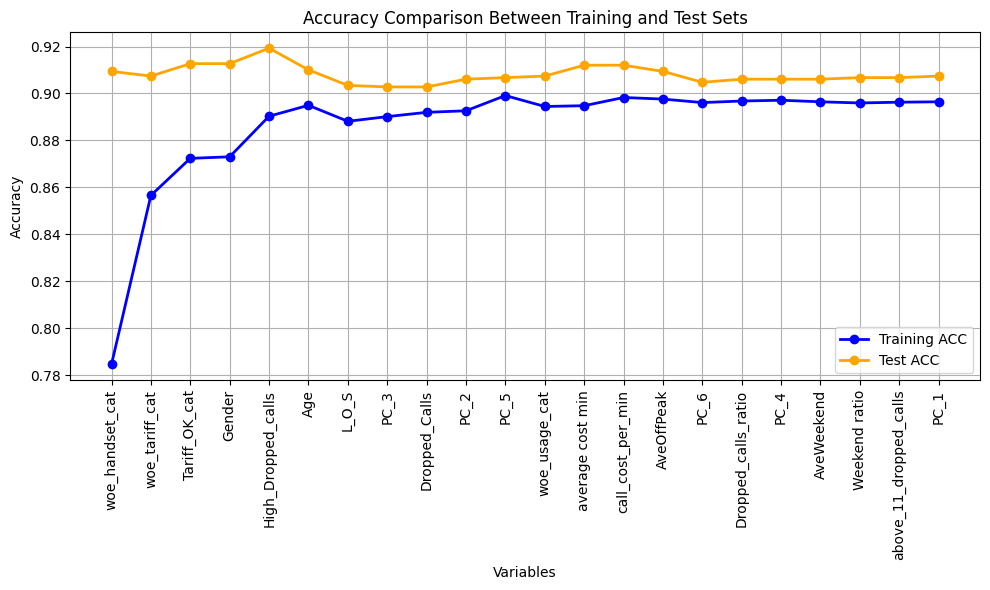

In [1547]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have lists auc_values_train and auc_values_test containing AUC values
# Assuming you also have a list current_variables containing the names of the variables

x = np.arange(len(current_variables))  # Creating x-axis ticks for each variable
#y_train = np.array(auc_values_train)    # AUC values for the training set
#y_test = np.array(auc_values_test)
#profits = np.array(metric_prof)      # AUC values for the test set
y_train = np.array(accuracy_values_train)    # AUC values for the training set
y_test = np.array(accuracy_values_test)   

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plotting AUC values for training and test sets with adjusted line styles and widths
plt.plot(x, y_train, marker='o', linestyle='-', linewidth=2, label='Training ACC', color='blue')
plt.plot(x, y_test, marker='o', linestyle='-', linewidth=2, label='Test ACC', color='orange')
#plt.plot(x, metric_prof, marker='o', linestyle='-', linewidth=2, label='Metric', color='green')

# Setting x-axis ticks and labels
plt.xticks(x, current_variables, rotation=90)

# Setting y-axis limits
#plt.ylim((0, 1))

# Adding labels and legend
plt.xlabel('Variables')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Between Training and Test Sets')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

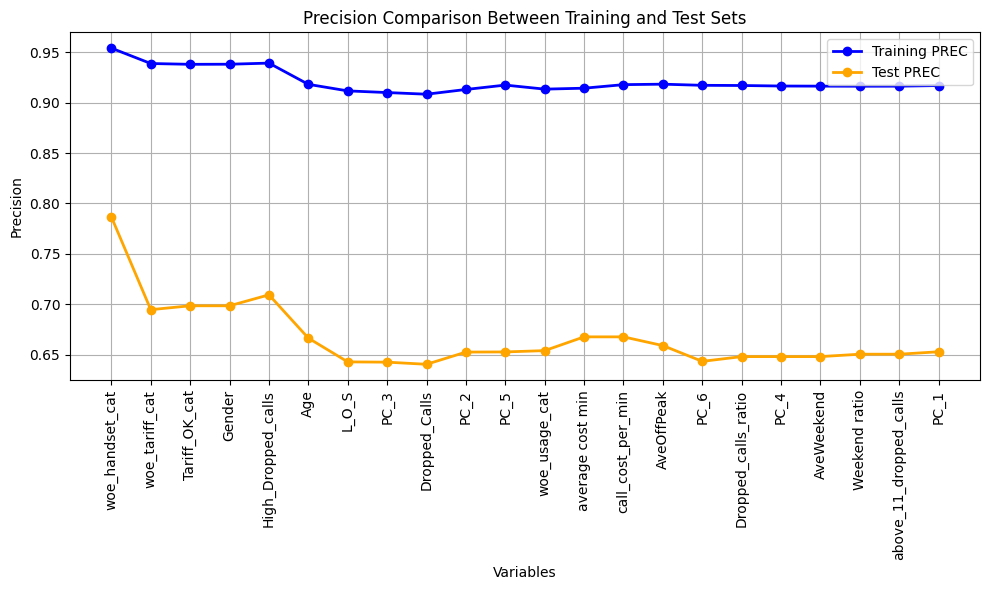

In [1548]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have lists auc_values_train and auc_values_test containing AUC values
# Assuming you also have a list current_variables containing the names of the variables

x = np.arange(len(current_variables))  # Creating x-axis ticks for each variable
#y_train = np.array(auc_values_train)    # AUC values for the training set
#y_test = np.array(auc_values_test)
#profits = np.array(metric_prof)      # AUC values for the test set
y_train = np.array(precision_values_train)    # AUC values for the training set
y_test = np.array(precision_values_test)   

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plotting AUC values for training and test sets with adjusted line styles and widths
plt.plot(x, y_train, marker='o', linestyle='-', linewidth=2, label='Training PREC', color='blue')
plt.plot(x, y_test, marker='o', linestyle='-', linewidth=2, label='Test PREC', color='orange')
#plt.plot(x, metric_prof, marker='o', linestyle='-', linewidth=2, label='Metric', color='green')

# Setting x-axis ticks and labels
plt.xticks(x, current_variables, rotation=90)

# Setting y-axis limits
#plt.ylim((0, 1))

# Adding labels and legend
plt.xlabel('Variables')
plt.ylabel('Precision')
plt.title('Precision Comparison Between Training and Test Sets')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

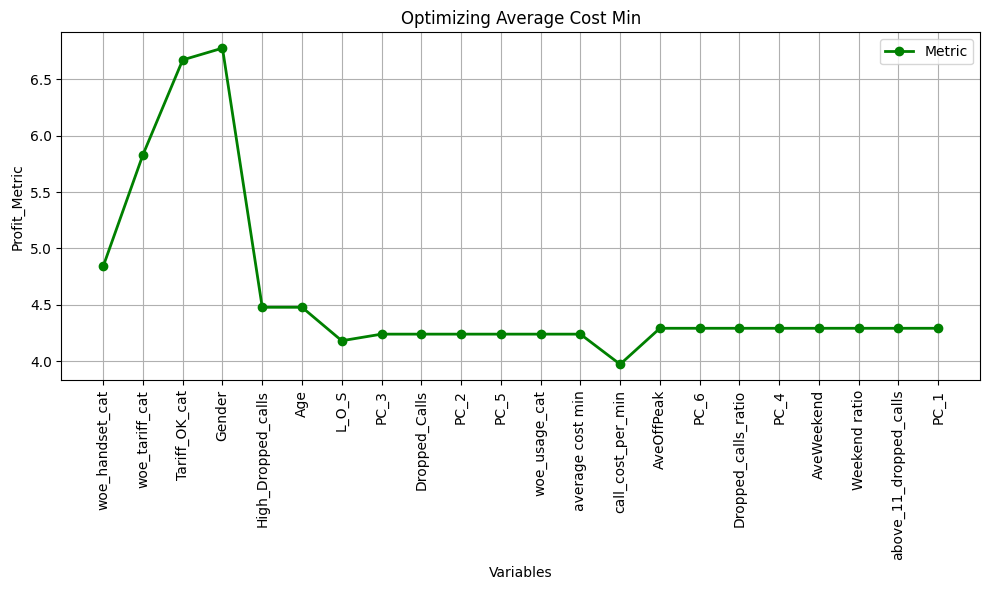

In [1549]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have lists auc_values_train and auc_values_test containing AUC values
# Assuming you also have a list current_variables containing the names of the variables

x = np.arange(len(current_variables))  # Creating x-axis ticks for each variable
#y_train = np.array(auc_values_train)    # AUC values for the training set
#y_test = np.array(auc_values_test)
profits = np.array(metric_prof)      # AUC values for the test set
#y_train = np.array(accuracy_values_train)    # AUC values for the training set
#y_test = np.array(accuracy_values_test)   

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plotting AUC values for training and test sets with adjusted line styles and widths
#plt.plot(x, y_train, marker='o', linestyle='-', linewidth=2, label='Training AUC', color='blue')
#plt.plot(x, y_test, marker='o', linestyle='-', linewidth=2, label='Test AUC', color='orange')
plt.plot(x, metric_prof, marker='o', linestyle='-', linewidth=2, label='Metric', color='green')

# Setting x-axis ticks and labels
plt.xticks(x, current_variables, rotation=90)

# Setting y-axis limits
#plt.ylim((0, 1))

# Adding labels and legend
plt.xlabel('Variables')
plt.ylabel('Profit_Metric')
plt.title('Optimizing Average Cost Min')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [1290]:
# Logistic 

In [1550]:
log_model = LogisticRegression(random_state=345, max_iter=1000, C=100)
log_model.fit(X_train_after_pca_smote[["woe_handset_cat","woe_tariff_cat","Tariff_OK_cat","Gender","High_Dropped_calls"]], y_train_l1_smote)
y_pred_probs = log_model.predict_proba(X_test_after_pca[["woe_handset_cat","woe_tariff_cat","Tariff_OK_cat","Gender","High_Dropped_calls"]])[:,1]
y_pred = log_model.predict(X_test_after_pca[["woe_handset_cat","woe_tariff_cat","Tariff_OK_cat","Gender","High_Dropped_calls"]])

In [1555]:
# y_pred[y_pred == 1].sum()

241

In [1556]:
# # Compute ROC curve
# fpr, tpr, thresholds = roc_curve(y_test_l1, y_pred_probs)

# # Calculate Youden's J statistic
# youden_j = tpr - fpr

# # Find the threshold corresponding to the maximum Youden's J statistic
# best_threshold = thresholds[np.argmax(youden_j)]

# # Make predictions using the best threshold
# best_predictions = (y_pred_probs >= best_threshold).astype(int)

In [1561]:
# best_threshold

0.49215388667584953

In [1559]:
# best_predictions[best_predictions == 1].sum()

242

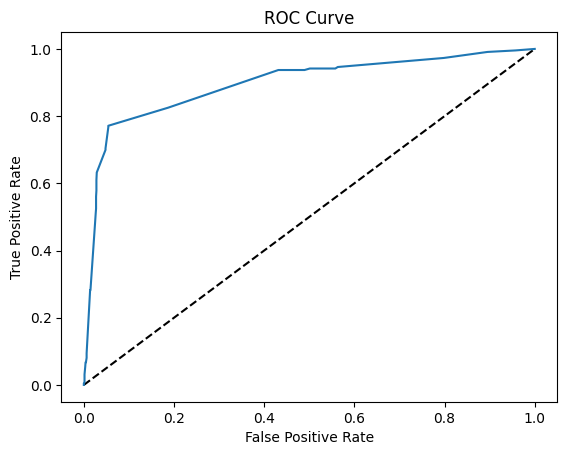

0.8955703138317672
[[1219   70]
 [  51  172]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1289
           1       0.71      0.77      0.74       223

    accuracy                           0.92      1512
   macro avg       0.84      0.86      0.85      1512
weighted avg       0.92      0.92      0.92      1512



In [1560]:
#  #Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test_l1, y_pred_probs)

# plt.plot([0, 1], [0, 1], 'k--')

# # Plot tpr against fpr
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# # Calculate roc_auc_score
# print(roc_auc_score(y_test_l1, y_pred_probs))

# # Calculate the confusion matrix
# print(confusion_matrix(y_test_l1, best_predictions))

# # Calculate the classification report
# print(classification_report(y_test_l1, best_predictions))

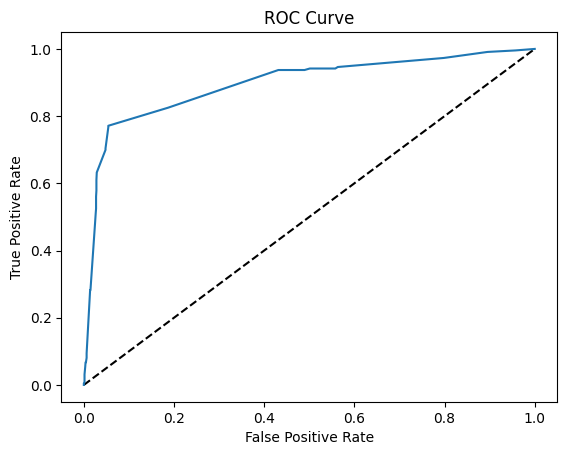

0.8955703138317672
[[1219   70]
 [  52  171]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1289
           1       0.71      0.77      0.74       223

    accuracy                           0.92      1512
   macro avg       0.83      0.86      0.84      1512
weighted avg       0.92      0.92      0.92      1512



In [1292]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_l1, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_test_l1, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test_l1, y_pred))

# Calculate the classification report
print(classification_report(y_test_l1, y_pred))

In [1293]:
print(profit_metric(y_pred_probs, X_test))

4.478785


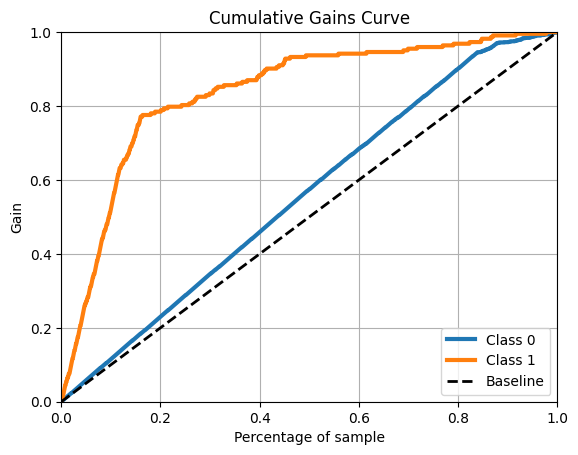

In [1294]:
# Import the scikitplot module
import scikitplot as skplt

# Plot the cumulative gains graph
skplt.metrics.plot_cumulative_gain(y_test_l1, log_model.predict_proba(X_test_after_pca[["woe_handset_cat","woe_tariff_cat","Tariff_OK_cat","Gender","High_Dropped_calls"]]))
plt.show()

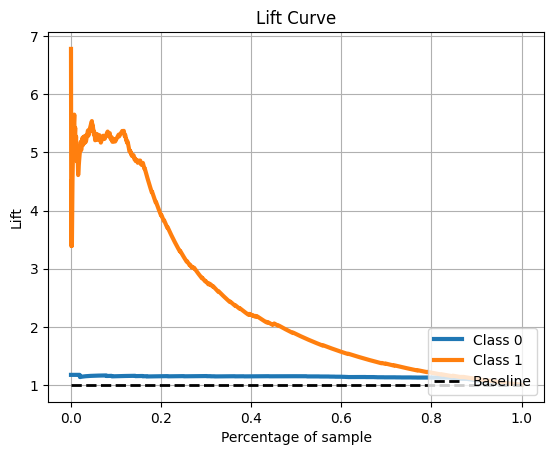

In [1295]:
import matplotlib.pyplot as plt

# Import the scikitplot module
import scikitplot as skplt

# Plot the lift curve
skplt.metrics.plot_lift_curve(y_test_l1, log_model.predict_proba(X_test_after_pca[["woe_handset_cat","woe_tariff_cat","Tariff_OK_cat","Gender","High_Dropped_calls"]]))
plt.show()

In [1296]:
# Optimum Logistic Threshold 

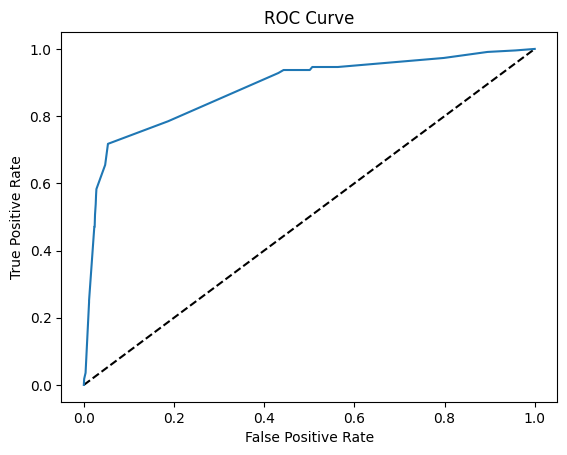

0.8827296858203425
[[1220   69]
 [  63  160]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1289
           1       0.70      0.72      0.71       223

    accuracy                           0.91      1512
   macro avg       0.82      0.83      0.83      1512
weighted avg       0.91      0.91      0.91      1512



In [1297]:
log_model_2 = LogisticRegression(random_state=345, max_iter=1000, C=100)
log_model_2.fit(X_train_after_pca_smote[["woe_handset_cat","woe_tariff_cat","Tariff_OK_cat","Gender"]], y_train_l1_smote)
y_pred_probs = log_model_2.predict_proba(X_test_after_pca[["woe_handset_cat","woe_tariff_cat","Tariff_OK_cat","Gender"]])[:,1]
y_pred = log_model_2.predict(X_test_after_pca[["woe_handset_cat","woe_tariff_cat","Tariff_OK_cat","Gender"]])

 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_l1, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_test_l1, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test_l1, y_pred))

# Calculate the classification report
print(classification_report(y_test_l1, y_pred))

In [1298]:
print(profit_metric(y_pred_probs, X_test))

6.774558


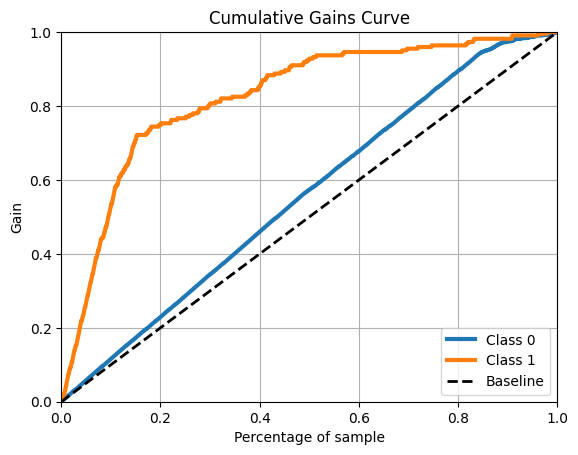

In [1299]:
skplt.metrics.plot_cumulative_gain(y_test_l1, log_model_2.predict_proba(X_test_after_pca[["woe_handset_cat","woe_tariff_cat","Tariff_OK_cat","Gender"]]))
plt.show()

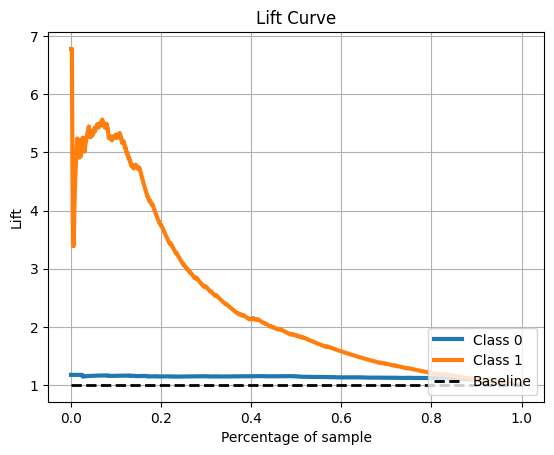

In [1300]:

# Plot the lift curve
skplt.metrics.plot_lift_curve(y_test_l1, log_model_2.predict_proba(X_test_after_pca[["woe_handset_cat","woe_tariff_cat","Tariff_OK_cat","Gender"]]))
plt.show()

In [1301]:
# Upload the professors test set

In [1302]:
half_test_data = pd.read_csv(r"C:\KU Leuven\Advanced Analytics\Assignment\data\test.csv")
pd.set_option("display.max_columns", None)

In [1303]:
 half_test_data.shape

(1682, 38)

In [1304]:
half_test_data.isna().sum()

Gender                    0
Age                       0
Connect_Date              0
L_O_S                     0
Dropped_Calls             0
tariff                    0
Handset                   0
Peak_calls_Sum            0
Peak_mins_Sum             0
OffPeak_calls_Sum         0
OffPeak_mins_Sum          0
Weekend_calls_Sum         0
Weekend_mins_Sum          0
International_mins_Sum    0
Nat_call_cost_Sum         0
AvePeak                   0
AveOffPeak                0
AveWeekend                0
National_calls            0
National mins             0
AveNational               0
All_calls_mins            0
Dropped_calls_ratio       1
Usage_Band                1
Mins_charge               0
call_cost_per_min         1
actual call cost          0
Total_call_cost           0
Total_Cost                0
Tariff_OK                 0
average cost min          0
Peak ratio                0
OffPeak ratio             0
Weekend ratio             0
Nat-InterNat Ratio        0
high Dropped calls  

In [1305]:
median_train_Dropped_calls_ratio = train["Dropped_calls_ratio"].median()
mode_train_Usage_Band = X_train["Usage_Band"].mode()
median_train_call_cost_per_min = train["call_cost_per_min"].median()


half_test_data['Dropped_calls_ratio'] = np.where(half_test_data['Dropped_calls_ratio'].isna(), train["Dropped_calls_ratio"].median(), half_test_data['Dropped_calls_ratio'])
half_test_data['Usage_Band'] = np.where(half_test_data['Usage_Band'].isna(), X_train["Usage_Band"].mode(), half_test_data['Usage_Band'])
half_test_data['call_cost_per_min'] = np.where(half_test_data['call_cost_per_min'].isna(), train["call_cost_per_min"].median(), half_test_data['call_cost_per_min'])

In [1306]:
half_test_data["Usage_Band"].isna().sum()

0

In [1307]:
half_test_data.shape

(1682, 38)

In [1308]:
half_test_data.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Usage_Band,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,id
0,F,20.0,23/05/96,55.582251,3.0,CAT 200,WC95,513.0,1075.667903,110.0,189.982227,8.0,5.017969,25.872662,10.766282,9.598648,0.128126,2.044552,609.0,1397.818565,2.414391,1382.461509,0.002272,MedHigh,120.133757,8.933287,9.409262,9.195247,167.242853,OK,0.116924,0.824189,0.173365,0.009823,0.020349,F,F,K751808
1,F,54.0,01/03/98,32.067010,0.0,Play 300,BS110,13.0,378.078657,93.0,551.817423,8.0,17.593417,138.267040,0.570547,33.547208,3.963993,5.503624,87.0,1009.005349,11.445797,1085.179552,0.001823,Med,-709.894563,11.931697,2.739423,56.143013,136.404621,OK,0.120457,0.415020,0.532898,0.022391,0.124480,F,F,K837351
2,F,28.0,11/10/98,26.621954,0.0,CAT 200,ASAD170,1000.0,2064.343139,90.0,152.731006,10.0,23.907633,492.202970,91.460036,2.945673,4.322230,2.370283,1020.0,2205.502075,2.415233,2695.044238,0.002011,High,1005.776446,9.560903,95.406158,248.197508,397.739114,OK,0.149435,0.960100,0.034434,0.006660,0.225763,F,F,K548114
3,F,26.0,12/08/98,27.652735,5.0,CAT 200,WC95,122.0,999.111887,126.0,358.760706,0.0,3.024655,174.998124,11.509839,11.984087,-1.064854,9.663168,241.0,1324.338426,5.814761,1524.022052,0.011887,MedHigh,124.587195,8.398145,14.464628,55.896596,196.789012,OK,0.137372,0.745483,0.263256,0.005870,0.108872,F,F,K736156
4,F,34.0,28/10/98,25.479355,0.0,CAT 100,WC95,164.0,742.647381,73.0,141.180280,11.0,47.034972,80.927142,27.402638,8.875573,4.853664,3.021928,281.0,794.535641,3.952980,887.649410,0.000796,Med,214.172528,12.766109,34.757126,62.593087,160.450386,OK,0.180704,0.771754,0.166995,0.056390,0.090896,F,F,K508080


In [1309]:
filtered_columns_test = half_test_data.select_dtypes(include=["int","float"]).columns

#filtered_columns_test = filtered_columns_test.drop('target')
filtered_columns_test

Index(['Age', 'L_O_S', 'Dropped_Calls', 'Peak_calls_Sum', 'Peak_mins_Sum',
       'OffPeak_calls_Sum', 'OffPeak_mins_Sum', 'Weekend_calls_Sum',
       'Weekend_mins_Sum', 'International_mins_Sum', 'Nat_call_cost_Sum',
       'AvePeak', 'AveOffPeak', 'AveWeekend', 'National_calls',
       'National mins', 'AveNational', 'All_calls_mins', 'Dropped_calls_ratio',
       'Mins_charge', 'call_cost_per_min', 'actual call cost',
       'Total_call_cost', 'Total_Cost', 'average cost min', 'Peak ratio',
       'OffPeak ratio', 'Weekend ratio', 'Nat-InterNat Ratio'],
      dtype='object')

In [1310]:
outlier_dict_test = robust_outlier_detection_test(half_test_data,filtered_columns_test)

In [1311]:
filtered_columns_trunct_test = list(filtered_columns_test)
#filtered_columns_trunct_test
filtered_columns_trunct_test = filtered_columns_trunct_test[11:14]  + [filtered_columns_trunct_test[16]] + [filtered_columns_trunct_test[24]] 

In [1312]:
filtered_columns_trunct_test

['AvePeak', 'AveOffPeak', 'AveWeekend', 'AveNational', 'average cost min']

In [1313]:
truncate_outliers_test(half_test_data,filtered_columns_trunct_test)

In [1314]:
outlier_dict_test_2 = robust_outlier_detection_test(half_test_data, filtered_columns_test)
outlier_dict_test_2

{'Age': 0,
 'L_O_S': 0,
 'Dropped_Calls': 237,
 'Peak_calls_Sum': 14,
 'Peak_mins_Sum': 0,
 'OffPeak_calls_Sum': 10,
 'OffPeak_mins_Sum': 0,
 'Weekend_calls_Sum': 30,
 'Weekend_mins_Sum': 0,
 'International_mins_Sum': 16,
 'Nat_call_cost_Sum': 56,
 'AvePeak': 0,
 'AveOffPeak': 0,
 'AveWeekend': 0,
 'National_calls': 13,
 'National mins': 2,
 'AveNational': 0,
 'All_calls_mins': 1,
 'Dropped_calls_ratio': 113,
 'Mins_charge': 45,
 'call_cost_per_min': 1,
 'actual call cost': 57,
 'Total_call_cost': 25,
 'Total_Cost': 8,
 'average cost min': 0,
 'Peak ratio': 0,
 'OffPeak ratio': 0,
 'Weekend ratio': 33,
 'Nat-InterNat Ratio': 1}

In [1315]:
   # Create a list of categories
handset_categories = ["Handset_safe", "Handset_neutral", "Handset_risky"]

# Create short_flights
handset_safe = "BS210|S80|ASAD170|WC95|CAS60"

# Create medium_flights
handset_neutral = "S50|BS110"

# Create long_flights
handset_risky = "SOP10|ASAD90|CAS30|SOP20"

# Create conditions for values in flight_categories to be created
conditions = [
    (half_test_data["Handset"].str.contains(handset_safe)),
    (half_test_data["Handset"].str.contains(handset_neutral)),
    (half_test_data["Handset"].str.contains(handset_risky))
]

# Apply the conditions list to the flight_categories
half_test_data["Handset_Category"] = np.select(conditions, 
                                        handset_categories)


handset_to_woe_dict = dict(zip(handset_cat_woe['Bin Values'], handset_cat_woe['WoE']))
half_test_data['woe_handset_cat'] = half_test_data['Handset_Category'].map(handset_to_woe_dict)

   # Create a list of categories
tariff_categories = ["tariff_play_300", "tariff_CAT", "tariff_play_100"]

# Create short_flights
tariff_less_risky = "Play 300"

tariff_neutral = "CAT 200|CAT 50|CAT 100"

# Create medium_flights
tariff_risky = "Play 100"

# Create long_flights
#handset_risky = "SOP10|ASAD90|CAS30|SOP20"

# Create conditions for values in flight_categories to be created
conditions = [
    (half_test_data["tariff"].str.contains(tariff_less_risky)),
    (half_test_data["tariff"].str.contains(tariff_neutral)),
    (half_test_data["tariff"].str.contains(tariff_risky))
]

# Apply the conditions list to the flight_categories
half_test_data["Tariff_category"] = np.select(conditions, 
                                        tariff_categories)

tariff_to_woe_dict = dict(zip(tariff_cat_woe['Bin Values'], tariff_cat_woe['WoE']))
half_test_data['woe_tariff_cat'] = half_test_data['Tariff_category'].map(tariff_to_woe_dict)


   # Create a list of categories
usage_categories = ["usage_low", "usage_med", "usage_high"]

# Create short_flights
usage_low = "Low"

usage_med = r"\bMed\b"

usage_high = "High"




# Create long_flights
#handset_risky = "SOP10|ASAD90|CAS30|SOP20"

# Create conditions for values in flight_categories to be created
conditions = [
    (half_test_data["Usage_Band"].str.contains(usage_low)),
    (half_test_data["Usage_Band"].str.contains(usage_med)),
    (half_test_data["Usage_Band"].str.contains(usage_high))
]

# Apply the conditions list to the flight_categories
half_test_data["Usage_category"] = np.select(conditions, 
                                        usage_categories)

usage_to_woe_dict = dict(zip(usage_cat_woe['Bin Values'], usage_cat_woe['WoE']))
half_test_data['woe_usage_cat'] = half_test_data['Usage_category'].map(usage_to_woe_dict)


In [1316]:
half_test_data.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Usage_Band,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,id,Handset_Category,woe_handset_cat,Tariff_category,woe_tariff_cat,Usage_category,woe_usage_cat
0,F,20.0,23/05/96,55.582251,3.0,CAT 200,WC95,513.0,1075.667903,110.0,189.982227,8.0,5.017969,25.872662,10.766282,9.598648,0.128126,2.044552,609.0,1397.818565,2.414391,1382.461509,0.002272,MedHigh,120.133757,8.933287,9.409262,9.195247,167.242853,OK,0.116924,0.824189,0.173365,0.009823,0.020349,F,F,K751808,Handset_safe,2.191954,tariff_CAT,0.034227,usage_high,0.021290
1,F,54.0,01/03/98,32.067010,0.0,Play 300,BS110,13.0,378.078657,93.0,551.817423,8.0,17.593417,138.267040,0.570547,15.075772,3.963993,5.503624,87.0,1009.005349,9.956815,1085.179552,0.001823,Med,-709.894563,11.931697,2.739423,56.143013,136.404621,OK,0.120457,0.415020,0.532898,0.022391,0.124480,F,F,K837351,Handset_neutral,0.087330,tariff_play_300,0.538037,usage_med,0.262926
2,F,28.0,11/10/98,26.621954,0.0,CAT 200,ASAD170,1000.0,2064.343139,90.0,152.731006,10.0,23.907633,492.202970,91.460036,2.945673,4.322230,2.370283,1020.0,2205.502075,2.415233,2695.044238,0.002011,High,1005.776446,9.560903,95.406158,248.197508,397.739114,OK,0.149435,0.960100,0.034434,0.006660,0.225763,F,F,K548114,Handset_safe,2.191954,tariff_CAT,0.034227,usage_high,0.021290
3,F,26.0,12/08/98,27.652735,5.0,CAT 200,WC95,122.0,999.111887,126.0,358.760706,0.0,3.024655,174.998124,11.509839,11.984087,-1.064854,9.663168,241.0,1324.338426,5.814761,1524.022052,0.011887,MedHigh,124.587195,8.398145,14.464628,55.896596,196.789012,OK,0.137372,0.745483,0.263256,0.005870,0.108872,F,F,K736156,Handset_safe,2.191954,tariff_CAT,0.034227,usage_high,0.021290
4,F,34.0,28/10/98,25.479355,0.0,CAT 100,WC95,164.0,742.647381,73.0,141.180280,11.0,47.034972,80.927142,27.402638,8.875573,4.853664,3.021928,281.0,794.535641,3.952980,887.649410,0.000796,Med,214.172528,12.766109,34.757126,62.593087,160.450386,OK,0.180704,0.771754,0.166995,0.056390,0.090896,F,F,K508080,Handset_safe,2.191954,tariff_CAT,0.034227,usage_med,0.262926


In [1317]:
# Binarize the High Dropped calls feature 


from sklearn.preprocessing import LabelEncoder
# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
half_test_data["High_Dropped_calls"] = enc.fit_transform(half_test_data["high Dropped calls"])

# Compare the two columns
#print(train[["High_Dropped_calls", "high Dropped calls"]].head())

half_test_data.drop("high Dropped calls", axis=1, inplace=True)

# The variables connect_month, connect_year, No Usage, Tariff_OK, and Gender are DROPPED from the training set

half_test_data.drop("No Usage", axis=1, inplace=True)

enc_2 = LabelEncoder()

# Apply the encoding to the "Accessible" column
half_test_data["Gender"] = enc_2.fit_transform(half_test_data["Gender"])

   # Create a list of categories
tariff_OK_categories = ["OK", "Other"]

# Create short_flights
okay = "OK"

other = "CAT|Play"
# Create long_flights
#handset_risky = "SOP10|ASAD90|CAS30|SOP20"

# Create conditions for values in flight_categories to be created
conditions = [
    (half_test_data["Tariff_OK"].str.contains(okay)),
    (half_test_data["Tariff_OK"].str.contains(other))
]

# Apply the conditions list to the flight_categories
half_test_data["Tariff_OK_cat"] = np.select(conditions, 
                                        tariff_OK_categories)


half_test_data["Tariff_OK_cat"] = np.where(half_test_data["Tariff_OK_cat"]=="OK", 1,0)

half_test_data.drop(["tariff","Handset","Usage_Band","Tariff_OK","Handset_Category","Tariff_category","Usage_category"],axis=1,inplace=True)

# Create salary labels
drop_calls_labels = ["0-11", "12-15"]

# Create the salary ranges list
drop_calls_ranges = [-0.1, 12, train["Dropped_Calls"].max()]

# Create salary_level
half_test_data["binned_drop_calls"] = pd.cut(test["Dropped_Calls"],
                                  bins=drop_calls_ranges,
                                  labels=drop_calls_labels)

half_test_data["above_11_dropped_calls"] = np.where(half_test_data["binned_drop_calls"]=="12-15",1,0)

half_test_data.drop("binned_drop_calls",axis=1,inplace=True)

In [1318]:
# Random Forest 

In [1319]:
half_test_data.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,id,woe_handset_cat,woe_tariff_cat,woe_usage_cat,High_Dropped_calls,Tariff_OK_cat,above_11_dropped_calls
0,0,20.0,23/05/96,55.582251,3.0,513.0,1075.667903,110.0,189.982227,8.0,5.017969,25.872662,10.766282,9.598648,0.128126,2.044552,609.0,1397.818565,2.414391,1382.461509,0.002272,120.133757,8.933287,9.409262,9.195247,167.242853,0.116924,0.824189,0.173365,0.009823,0.020349,K751808,2.191954,0.034227,0.021290,0,1,0
1,0,54.0,01/03/98,32.067010,0.0,13.0,378.078657,93.0,551.817423,8.0,17.593417,138.267040,0.570547,15.075772,3.963993,5.503624,87.0,1009.005349,9.956815,1085.179552,0.001823,-709.894563,11.931697,2.739423,56.143013,136.404621,0.120457,0.415020,0.532898,0.022391,0.124480,K837351,0.087330,0.538037,0.262926,0,1,0
2,0,28.0,11/10/98,26.621954,0.0,1000.0,2064.343139,90.0,152.731006,10.0,23.907633,492.202970,91.460036,2.945673,4.322230,2.370283,1020.0,2205.502075,2.415233,2695.044238,0.002011,1005.776446,9.560903,95.406158,248.197508,397.739114,0.149435,0.960100,0.034434,0.006660,0.225763,K548114,2.191954,0.034227,0.021290,0,1,0
3,0,26.0,12/08/98,27.652735,5.0,122.0,999.111887,126.0,358.760706,0.0,3.024655,174.998124,11.509839,11.984087,-1.064854,9.663168,241.0,1324.338426,5.814761,1524.022052,0.011887,124.587195,8.398145,14.464628,55.896596,196.789012,0.137372,0.745483,0.263256,0.005870,0.108872,K736156,2.191954,0.034227,0.021290,0,1,0
4,0,34.0,28/10/98,25.479355,0.0,164.0,742.647381,73.0,141.180280,11.0,47.034972,80.927142,27.402638,8.875573,4.853664,3.021928,281.0,794.535641,3.952980,887.649410,0.000796,214.172528,12.766109,34.757126,62.593087,160.450386,0.180704,0.771754,0.166995,0.056390,0.090896,K508080,2.191954,0.034227,0.262926,0,1,0


In [1320]:
half_test_data.drop("Connect_Date",axis=1, inplace=True)
half_test_data.iloc[:,1:30]

,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio
0,20.0,55.582251,3.0,513.0,1075.667903,110.0,189.982227,8.0,5.017969,25.872662,10.766282,9.598648,0.128126,2.044552,609.0,1397.818565,2.414391,1382.461509,0.002272,120.133757,8.933287,9.409262,9.195247,167.242853,0.116924,0.824189,0.173365,0.009823,0.020349
1,54.0,32.067010,0.0,13.0,378.078657,93.0,551.817423,8.0,17.593417,138.267040,0.570547,15.075772,3.963993,5.503624,87.0,1009.005349,9.956815,1085.179552,0.001823,-709.894563,11.931697,2.739423,56.143013,136.404621,0.120457,0.415020,0.532898,0.022391,0.124480
2,28.0,26.621954,0.0,1000.0,2064.343139,90.0,152.731006,10.0,23.907633,492.202970,91.460036,2.945673,4.322230,2.370283,1020.0,2205.502075,2.415233,2695.044238,0.002011,1005.776446,9.560903,95.406158,248.197508,397.739114,0.149435,0.960100,0.034434,0.006660,0.225763
3,26.0,27.652735,5.0,122.0,999.111887,126.0,358.760706,0.0,3.024655,174.998124,11.509839,11.984087,-1.064854,9.663168,241.0,1324.338426,5.814761,1524.022052,0.011887,124.587195,8.398145,14.464628,55.896596,196.789012,0.137372,0.745483,0.263256,0.005870,0.108872
4,34.0,25.479355,0.0,164.0,742.647381,73.0,141.180280,11.0,47.034972,80.927142,27.402638,8.875573,4.853664,3.021928,281.0,794.535641,3.952980,887.649410,0.000796,214.172528,12.766109,34.757126,62.593087,160.450386,0.180704,0.771754,0.166995,0.056390,0.090896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,32.0,40.097166,0.0,617.0,1412.608159,8.0,42.952890,45.0,105.774031,86.262452,33.370415,0.802079,2.353344,1.644753,629.0,1485.273922,2.787660,1733.743636,-0.001571,287.797054,9.588439,35.396282,65.132236,208.523608,0.122342,0.883990,0.012611,0.070297,0.035339
1678,19.0,22.594431,0.0,198.0,685.503276,-1.0,73.643988,2.0,28.751955,56.083237,27.474110,-2.663694,4.622180,9.746800,242.0,824.300173,3.645245,864.986450,-0.001214,215.328466,13.794174,30.518649,54.272952,147.689743,0.163502,0.890952,0.052157,0.041489,0.079988
1679,34.0,55.339646,0.0,546.0,1945.834456,21.0,278.414345,2.0,34.029118,188.224017,95.105987,8.078580,14.382699,11.799257,573.0,2346.442004,4.273388,2517.220981,0.001294,987.155472,9.031387,96.373049,157.148453,302.935896,0.127485,0.887100,0.106429,0.011459,0.098248
1680,21.0,42.830741,2.0,255.0,419.242872,76.0,196.742943,-1.0,18.472483,137.376495,-1.940712,-3.877556,3.948506,3.885902,290.0,634.323983,2.437764,654.481372,0.001789,-35.954556,11.898371,-0.223523,42.691470,159.088917,0.205830,0.698567,0.358159,0.017720,0.256554


In [1321]:

half_test_data.iloc[:,1:30] = scaler.transform(half_test_data.iloc[:,1:30])

In [1322]:
half_test_data.head()

,Gender,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,id,woe_handset_cat,woe_tariff_cat,woe_usage_cat,High_Dropped_calls,Tariff_OK_cat,above_11_dropped_calls
0,0,-0.884637,1.564962,0.097333,1.129951,0.730798,0.064484,-0.614505,-0.509392,-1.233979,-1.011639,-0.304601,1.110564,-1.142778,-0.603539,0.950829,0.602290,-0.621976,0.225469,-0.269899,0.111781,-0.562034,-0.348186,-1.066824,-0.230558,-1.058016,0.961637,-0.747373,-0.796932,-1.339268,K751808,2.191954,0.034227,0.021290,0,1,0
1,0,1.745658,-0.112749,-0.775697,-0.932880,-0.644437,-0.109720,1.181105,-0.509392,-0.883719,-0.222120,-0.664788,2.402786,-0.204678,0.348165,-1.035272,-0.107954,2.745614,-0.238486,-0.293113,-1.614996,0.866312,-0.583944,-0.292110,-0.602790,-0.975120,-0.860562,0.962322,-0.602033,-0.361698,K837351,0.087330,0.538037,0.262926,0,1,0
2,0,-0.265744,-0.501230,-0.775697,3.139148,2.679882,-0.140462,-0.799364,-0.386250,-0.707851,2.264116,2.546085,-0.459078,-0.117067,-0.513920,2.514598,2.077683,-0.621600,2.273959,-0.283397,1.954258,-0.263058,2.691533,2.877099,2.551643,-0.295201,1.566905,-1.408034,-0.845983,0.589136,K548114,2.191954,0.034227,0.021290,0,1,0
3,0,-0.420468,-0.427688,0.679354,-0.483183,0.579875,0.228442,0.223059,-1.001960,-1.289499,0.035898,-0.278334,1.673363,-1.434534,1.492593,-0.449334,0.468064,0.896243,0.446396,0.227011,0.121046,-0.816958,-0.169495,-0.296177,0.126079,-0.578239,0.611126,-0.319912,-0.858234,-0.508224,K736156,2.191954,0.034227,0.021290,0,1,0
4,0,0.198426,-0.582749,-0.775697,-0.309905,0.074278,-0.314667,-0.856685,-0.324679,-0.063692,-0.624907,0.283115,0.939968,0.012900,-0.334631,-0.297142,-0.499725,0.064983,-0.546763,-0.346189,0.307418,1.263799,0.547781,-0.185674,-0.312546,0.438472,0.728122,-0.777664,-0.074792,-0.676981,K508080,2.191954,0.034227,0.262926,0,1,0


In [1323]:
X_train_l1.head()

,Gender,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,High_Dropped_calls,Tariff_OK_cat,woe_handset_cat,woe_tariff_cat,woe_usage_cat,above_11_dropped_calls
1115,0,-0.884637,0.037053,2.425415,-0.194387,0.037910,-1.011485,-1.168729,-0.755676,-0.605009,-1.176352,0.430672,-0.264151,2.343323,0.732354,-0.601526,-0.434760,0.143954,-0.632794,1.026816,0.340553,1.720226,0.435462,-0.685446,-0.591900,0.068315,1.176452,-1.123229,-0.433652,-1.502880,0,1,2.191954,0.034227,0.262926,0
4207,0,1.281488,-1.382726,-0.775697,2.846226,2.607052,-0.314667,-0.951371,0.598886,-0.092519,2.799904,2.697246,-0.639170,-0.765060,-0.679289,2.545036,2.059412,-0.746408,2.381539,-0.387326,1.932879,-0.236254,2.703295,3.175522,2.775465,-0.267632,1.403616,-1.307317,-0.624349,0.900485,0,1,0.087330,0.034227,0.021290,0
202,0,-0.265744,1.680381,-0.484687,-0.380042,-0.643409,-1.062722,-1.557293,3.923719,2.118985,-0.307133,-0.684944,-0.546411,-1.174113,-0.734792,-0.502601,-1.030446,-0.708651,-0.948608,-0.273493,-2.834321,4.365559,-0.680774,-0.385792,-0.699338,0.979582,0.636542,-1.571779,2.909171,0.819740,0,1,2.191954,0.538037,0.262926,0
2074,0,-0.033659,0.358108,0.388343,2.297513,1.394635,-0.365904,-0.592582,-0.940389,-0.217856,1.544941,0.785446,-0.735424,-0.474958,2.339436,1.924855,1.059844,-0.849167,1.248730,-0.267834,0.794493,-0.394768,0.790434,1.398081,1.475315,-0.249119,1.107237,-1.010936,-0.558829,0.689933,0,1,2.191954,0.034227,0.021290,0
4857,0,-0.420468,1.528177,-0.775697,1.266098,1.031501,-0.632334,-1.226790,-1.001960,-1.373743,1.481113,-0.345301,-0.623338,-0.786310,-1.166063,0.870928,0.414106,-0.716787,0.682857,-0.387326,0.059077,-0.176400,-0.354303,0.818680,1.051499,0.027912,1.515526,-1.327180,-0.949263,1.230206,0,1,0.087330,0.034227,0.021290,0


In [1324]:
half_test_data.shape

(1682, 37)

In [1325]:
pc_test_half = pca.transform(half_test_data[['National mins', 'OffPeak_calls_Sum', 'OffPeak ratio', 'National_calls', 'Total_Cost', 'Peak_mins_Sum', 'All_calls_mins', 'Mins_charge', 'OffPeak_mins_Sum', 'Nat_call_cost_Sum', 'Peak ratio', 'Weekend_calls_Sum', 'Total_call_cost', 'actual call cost', 'AveNational', 'International_mins_Sum', 'AvePeak', 'Peak_calls_Sum', 'Nat-InterNat Ratio', 'Weekend_mins_Sum']])



In [1326]:
pc_test_half.shape

(1682, 20)

In [1327]:
pc_test_df_half = pd.DataFrame(pc_test_half)

In [1328]:
pca_X_test_half_6 = pc_test_df_half.iloc[:,0:6]

In [1329]:
X_test_half_after_pca = half_test_data.drop(['National mins', 'OffPeak_calls_Sum', 'OffPeak ratio', 'National_calls', 'Total_Cost', 'Peak_mins_Sum', 'All_calls_mins', 'Mins_charge', 'OffPeak_mins_Sum', 'Nat_call_cost_Sum', 'Peak ratio', 'Weekend_calls_Sum', 'Total_call_cost', 'actual call cost', 'AveNational', 'International_mins_Sum', 'AvePeak', 'Peak_calls_Sum', 'Nat-InterNat Ratio', 'Weekend_mins_Sum'],axis=1)

In [1330]:
X_test_half_after_pca.reset_index(drop=True,inplace=True)

In [1331]:
X_test_half_after_pca = pd.merge(X_test_half_after_pca, pca_X_test_half_6, left_index=True, right_index=True, how='outer')
X_test_half_after_pca.head()

,Gender,Age,L_O_S,Dropped_Calls,AveOffPeak,AveWeekend,Dropped_calls_ratio,call_cost_per_min,average cost min,Weekend ratio,id,woe_handset_cat,woe_tariff_cat,woe_usage_cat,High_Dropped_calls,Tariff_OK_cat,above_11_dropped_calls,0,1,2,3,4,5
0,0,-0.884637,1.564962,0.097333,-1.142778,-0.603539,-0.269899,-0.562034,-1.058016,-0.796932,K751808,2.191954,0.034227,0.021290,0,1,0,0.471801,-1.483168,-1.328587,-1.381729,-1.355441,-1.491701
1,0,1.745658,-0.112749,-0.775697,-0.204678,0.348165,-0.293113,0.866312,-0.975120,-0.602033,K837351,0.087330,0.538037,0.262926,0,1,0,-2.461756,0.698374,3.260903,-1.220911,-1.266149,-1.078236
2,0,-0.265744,-0.501230,-0.775697,-0.117067,-0.513920,-0.283397,-0.263058,-0.295201,-0.845983,K548114,2.191954,0.034227,0.021290,0,1,0,8.511379,-0.611142,-0.601286,-0.637819,1.114111,0.503411
3,0,-0.420468,-0.427688,0.679354,-1.434534,1.492593,0.227011,-0.816958,-0.578239,-0.858234,K736156,2.191954,0.034227,0.021290,0,1,0,0.157059,-0.671935,1.566643,-1.761784,-0.838043,-1.137614
4,0,0.198426,-0.582749,-0.775697,0.012900,-0.334631,-0.346189,1.263799,0.438472,-0.074792,K508080,2.191954,0.034227,0.262926,0,1,0,-0.263311,-1.757205,0.236678,-0.253655,-0.743885,0.301155


In [1332]:
X_test_half_after_pca.shape

(1682, 23)

In [1333]:
X_test_after_pca.shape

(1512, 22)

In [859]:
X_test_half_after_pca.head()

,Gender,Age,L_O_S,Dropped_Calls,AveOffPeak,AveWeekend,Dropped_calls_ratio,call_cost_per_min,average cost min,Weekend ratio,id,woe_handset_cat,woe_tariff_cat,woe_usage_cat,High_Dropped_calls,Tariff_OK_cat,above_11_dropped_calls,0,1,2,3,4,5
0,0,-0.884637,1.564962,0.097333,-1.142778,-0.603539,-0.269899,-0.562034,-1.058016,-0.796932,K751808,2.191954,0.034227,0.021290,0,1,0,0.471801,-1.483168,-1.328587,-1.381729,-1.355441,-1.491701
1,0,1.745658,-0.112749,-0.775697,-0.204678,0.348165,-0.293113,0.866312,-0.975120,-0.602033,K837351,0.087330,0.538037,0.262926,0,1,0,-2.461756,0.698374,3.260903,-1.220911,-1.266149,-1.078236
2,0,-0.265744,-0.501230,-0.775697,-0.117067,-0.513920,-0.283397,-0.263058,-0.295201,-0.845983,K548114,2.191954,0.034227,0.021290,0,1,0,8.511379,-0.611142,-0.601286,-0.637819,1.114111,0.503411
3,0,-0.420468,-0.427688,0.679354,-1.434534,1.492593,0.227011,-0.816958,-0.578239,-0.858234,K736156,2.191954,0.034227,0.021290,0,1,0,0.157059,-0.671935,1.566643,-1.761784,-0.838043,-1.137614
4,0,0.198426,-0.582749,-0.775697,0.012900,-0.334631,-0.346189,1.263799,0.438472,-0.074792,K508080,2.191954,0.034227,0.262926,0,1,0,-0.263311,-1.757205,0.236678,-0.253655,-0.743885,0.301155


In [1334]:
y_pred_probs = log_model.predict_proba(X_test_half_after_pca[["woe_handset_cat","woe_tariff_cat","Tariff_OK_cat","Gender","High_Dropped_calls"]])[:,1]
y_pred = log_model.predict(X_test_half_after_pca[["woe_handset_cat","woe_tariff_cat","Tariff_OK_cat","Gender","High_Dropped_calls"]])

In [1335]:
len(y_pred)

1682

In [1336]:
X_test_half_after_pca["PRED"] = y_pred

In [1337]:
X_test_half_after_pca.head()

,Gender,Age,L_O_S,Dropped_Calls,AveOffPeak,AveWeekend,Dropped_calls_ratio,call_cost_per_min,average cost min,Weekend ratio,id,woe_handset_cat,woe_tariff_cat,woe_usage_cat,High_Dropped_calls,Tariff_OK_cat,above_11_dropped_calls,0,1,2,3,4,5,PRED
0,0,-0.884637,1.564962,0.097333,-1.142778,-0.603539,-0.269899,-0.562034,-1.058016,-0.796932,K751808,2.191954,0.034227,0.021290,0,1,0,0.471801,-1.483168,-1.328587,-1.381729,-1.355441,-1.491701,0
1,0,1.745658,-0.112749,-0.775697,-0.204678,0.348165,-0.293113,0.866312,-0.975120,-0.602033,K837351,0.087330,0.538037,0.262926,0,1,0,-2.461756,0.698374,3.260903,-1.220911,-1.266149,-1.078236,0
2,0,-0.265744,-0.501230,-0.775697,-0.117067,-0.513920,-0.283397,-0.263058,-0.295201,-0.845983,K548114,2.191954,0.034227,0.021290,0,1,0,8.511379,-0.611142,-0.601286,-0.637819,1.114111,0.503411,0
3,0,-0.420468,-0.427688,0.679354,-1.434534,1.492593,0.227011,-0.816958,-0.578239,-0.858234,K736156,2.191954,0.034227,0.021290,0,1,0,0.157059,-0.671935,1.566643,-1.761784,-0.838043,-1.137614,0
4,0,0.198426,-0.582749,-0.775697,0.012900,-0.334631,-0.346189,1.263799,0.438472,-0.074792,K508080,2.191954,0.034227,0.262926,0,1,0,-0.263311,-1.757205,0.236678,-0.253655,-0.743885,0.301155,0


In [1338]:
X_test_half_after_pca.shape

(1682, 24)

In [1339]:
X_test_half_after_pca["PRED"].value_counts()

PRED
0    1409
1     273
Name: count, dtype: int64

In [1340]:
predictions_test_half = X_test_half_after_pca[["id","PRED"]]

In [1341]:
predictions_test_half.columns = ["ID","PRED"]

In [1342]:
predictions_test_half

,ID,PRED
0,K751808,0
1,K837351,0
2,K548114,0
3,K736156,0
4,K508080,0
...,...,...
1677,K588314,0
1678,K826807,0
1679,K982731,0
1680,K623037,0


In [1344]:
predictions_test_half.to_csv('predictions_2.csv', index=False)

In [ ]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_l1, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_test_l1, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test_l1, y_pred))

# Calculate the classification report
print(classification_report(y_test_l1, y_pred))

In [ ]:
# Optimize threshold of logistic - misclassification costs

In [ ]:
# Random Forests

In [ ]:


# Check Correlations - Drop Highly Correlated based on higher importance between the correlated
# Adapt the test set based on the training set 
# Feature selection using RFE 
# Check profit metric 
# Fit a logistic regression (evaluation, feature selection, RFE)
# Fit other methods (Check Ensembles chapter - Random Forests)
# Feature Importance Methods (Interpretability Chapter)



In [ ]:
train.shape

(3528, 39)

In [ ]:
# FEATURE TOOLS 

# ON THE CURRENT TRAINING SET

# ON THE INITIAL TRAINING SET WITHOUT OUTLIERS AND WITHOUT NA VALUES 

In [ ]:
train_feature = train.iloc[:,0:32]
train_feature

,Age,Connect_Date,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,id,target
1115,20.0,1997-12-22,34.166667,11.0,192.0,724.200001,5.0,78.300000,4.0,27.600000,2.424408,31.579499,3.771875,14.382699,6.900000,201.0,830.100001,4.129851,832.524409,0.027363,230.100001,13.724250,31.579500,32.306822,137.306822,0.164928,0.872425,0.094326,0.033249,0.002921,K301840,0
4207,48.0,1999-11-08,14.266667,0.0,929.0,2027.400000,73.0,122.100000,26.0,46.000000,568.476841,95.738942,2.182347,1.672603,1.769231,1028.0,2195.500000,2.135700,2763.976841,0.000000,995.500000,9.617171,95.738942,266.281994,416.281994,0.150610,0.923434,0.055614,0.020952,0.258928,K116920,0
202,28.0,1996-01-31,57.200000,1.0,147.0,378.600000,0.0,0.000000,80.0,125.400000,126.164805,0.000000,2.575510,0.000000,1.567500,227.0,504.000000,2.220264,630.164805,0.002203,-1296.000000,19.277381,0.000000,50.465922,128.405922,0.203766,0.751190,0.000000,0.248810,0.250327,K276340,0
2074,31.0,1997-09-08,38.666667,4.0,796.0,1412.400000,68.0,194.400000,1.0,41.500000,389.822673,41.622028,1.774372,2.858824,12.741109,865.0,1648.300000,1.905549,2038.122673,0.002312,448.300000,9.284414,41.622029,158.568831,308.568831,0.151399,0.856883,0.117940,0.025177,0.236500,K116850,0
4857,26.0,1996-04-04,55.066667,0.0,546.0,1228.200000,42.0,66.600001,0.0,0.000000,380.736197,9.614205,2.249451,1.585714,0.000000,588.0,1294.800001,2.202041,1675.536198,0.000000,94.800001,9.742817,9.236191,123.457050,273.457050,0.163206,0.948563,0.051437,0.000000,0.294050,K115360,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,22.0,1998-07-19,27.200000,1.0,221.0,424.800001,6.0,264.899999,3.0,69.600000,105.038982,16.877240,1.922172,14.382699,12.741109,230.0,759.300000,3.301304,864.338982,0.002174,159.300000,10.594627,16.877240,48.388935,153.388935,0.177464,0.559463,0.348874,0.091663,0.138337,K342410,0
4530,16.0,1998-09-17,25.200000,1.0,152.0,356.400000,115.0,286.800001,30.0,88.199999,6.040126,19.375842,2.344737,2.493913,2.940000,297.0,731.400000,2.462626,737.440126,0.001684,131.400000,14.745693,19.375841,21.791891,81.731891,0.110832,0.487285,0.392125,0.120591,0.008258,K260060,0
778,64.0,1997-10-18,36.333333,1.0,23.0,140.400000,15.0,167.400000,8.0,30.000000,106.476432,0.000000,6.104348,11.160000,3.750000,46.0,337.800000,7.343478,444.276432,0.010870,-262.200000,13.312611,0.000000,42.590573,102.530573,0.230781,0.415631,0.495560,0.088810,0.315206,K270710,0
917,17.0,1999-02-14,20.200000,0.0,575.0,898.800000,4.0,276.600000,5.0,17.000000,226.125729,0.000000,1.563130,14.382699,3.400000,584.0,1192.400000,2.041781,1418.525729,0.000000,-7.600000,8.768870,0.000000,67.837719,217.837719,0.153566,0.753774,0.231969,0.014257,0.189639,K181050,0


In [ ]:
import featuretools as ft

In [ ]:
es = ft.EntitySet(id="churn_data")


In [ ]:
es = es.add_dataframe(
    dataframe_name="churners",
    dataframe=train_feature,
    index="id",
    time_index="Connect_Date",
    
)

c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\woodwork\type_sys\utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\woodwork\type_sys\utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(


In [ ]:
es

Entityset: churn_data
  DataFrames:
    churners [Rows: 3528, Columns: 32]
  Relationships:
    No relationships

In [ ]:
features, feature_names = ft.dfs(entityset=es, target_dataframe_name="churners", 
                                 max_depth = 2)

features.head()

c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,Nat_call_cost_Sum,AvePeak,AveOffPeak,AveWeekend,National_calls,National mins,AveNational,All_calls_mins,Dropped_calls_ratio,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,target,DAY(Connect_Date),MONTH(Connect_Date),WEEKDAY(Connect_Date),YEAR(Connect_Date)
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
K189410,21.0,58.200000,3.0,345.0,1064.400001,140.0,540.599999,28.0,142.200000,341.560277,44.027802,3.085217,3.861429,5.078571,513.0,1747.200000,3.405848,2088.760277,0.002924,547.200000,8.046016,44.027802,146.495885,296.495885,0.141948,0.609203,0.309409,0.081387,0.195490,0,1,1,0,1996
K330590,28.0,58.200000,2.0,164.0,272.400001,100.0,176.400001,0.0,0.000000,106.395287,16.648086,1.660976,1.764000,0.000000,264.0,448.800002,1.700000,555.195289,0.003788,148.800002,11.069519,16.471444,48.390030,131.790030,0.237376,0.606952,0.393048,0.000000,0.237066,0,1,1,0,1996
K370120,28.0,58.200000,0.0,50.0,837.000000,109.0,296.400000,21.0,63.600000,144.034531,0.000000,15.075772,2.719266,3.028571,180.0,1197.000000,6.650000,1341.034531,0.000000,-3.000000,8.496241,0.000000,43.210359,193.210359,0.144076,0.699248,0.247619,0.053133,0.120330,0,1,1,0,1996
K188490,21.0,57.166667,0.0,171.0,1060.800001,160.0,296.100000,19.0,55.199999,335.738754,18.571704,6.203509,1.850625,2.905263,350.0,1412.100000,4.034571,1747.838754,0.000000,212.100000,8.756108,18.571705,119.293331,269.293331,0.154072,0.751222,0.209688,0.039091,0.237758,1,2,1,1,1996
K247860,25.0,57.166667,2.0,10.0,238.199999,6.0,155.400000,3.0,54.600000,31.123138,15.286224,15.075772,14.382699,12.741109,19.0,448.199999,9.956815,479.323137,0.052632,148.199999,10.314592,15.286225,24.623166,108.023166,0.225366,0.531459,0.346720,0.121821,0.069440,0,2,1,1,1996


In [ ]:
es_2 = an.auto_entityset(train_feature, accuracy=1, name="automated_train", time_index='Connect_Date')

print(es_2)

  0%|          | 0/31 [00:56<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
import autonormalize as an

In [ ]:
# Fit a Desicion tree for feature importance based on IV per feature 

In [ ]:
# PCA for dimensionality reduction 

In [ ]:
# t-SNE 

In [ ]:
# Feature selection using AUC
# Feature selection using profit metric 

In [ ]:
# Remove outliers on the test set based on the rules used in the training set
# Fit trasnform to standardize on the training set but only transform on the test set 

In [ ]:
# LOGISTIC

In [ ]:
# EVALUATION ? AUC AND PROFIT

In [ ]:
# ENSEMBLE 